In [1]:
pip install pyvis

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yahooquery

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, '테스트')

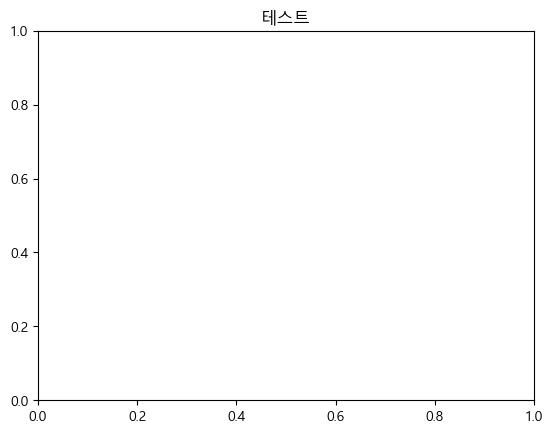

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import FinanceDataReader as fdr
from yahooquery import Ticker

from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
plt.style.use('default')
f_path = "C:/windows/Fonts/malgun.ttf"
ko_font = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
plt.title('테스트')

# 국내, 해외 종목 주가 수집 및 Sector, 경제지표 데이터 생성

### 코스피, 코스닥 종목 필터링

In [5]:
stock_list = fdr.StockListing('KRX') # 코스피, 코스닥, 코넥스 종목 모두 불러오기
stock_list = stock_list.loc[stock_list['Market'].isin(['KOSPI', 'KOSDAQ'])]

#stock_name_list = stock_list['Name'].tolist()
stock_name_list = stock_list.loc[~(stock_list['Name'].str.endswith(('우C','우B', '우', '홀딩스', '지주', '지주회사')) | stock_list['Name'].str.contains('스팩')), :] # 우선주, 지주사, 스팩주 제외

### 국내 주식 가격 가져오기

In [6]:
kr_sel = pd.DataFrame()
start_date = '2023-01-03'
end_date = '2023-08-30'

for ix, row in stock_name_list.iterrows():
    code, name = row['Code'], row['Name']
    print(code, name)
    # 개별 종목의 가격 가져오기(주최 측에서 제공되는 데이터의 날짜와 동일하게)
    df = fdr.DataReader(code, '2023-01-03', '2023-08-30')

    # 가격 데이터의 종가(Close)를 컬럼으로 추가
    # 컬럼명은 종목명을 지정
    kr_sel[name] = df['Close']

005930 삼성전자
373220 LG에너지솔루션
000660 SK하이닉스
207940 삼성바이오로직스
005380 현대차
051910 LG화학
006400 삼성SDI
000270 기아
035420 NAVER
003670 포스코퓨처엠
105560 KB금융
086520 에코프로
012330 현대모비스
068270 셀트리온
028260 삼성물산
035720 카카오
066570 LG전자
096770 SK이노베이션
032830 삼성생명
003550 LG
000810 삼성화재
033780 KT&G
047050 포스코인터내셔널
034730 SK
015760 한국전력
323410 카카오뱅크
017670 SK텔레콤
018260 삼성에스디에스
009150 삼성전기
352820 하이브
010130 고려아연
329180 HD현대중공업
024110 기업은행
034020 두산에너빌리티
030200 KT
010950 S-Oil
259960 크래프톤
003490 대한항공
009540 HD한국조선해양
011200 HMM
001570 금양
010140 삼성중공업
090430 아모레퍼시픽
051900 LG생활건강
086280 현대글로비스
326030 SK바이오팜
402340 SK스퀘어
005830 DB손해보험
042660 한화오션
011170 롯데케미칼
000100 유한양행
028050 삼성엔지니어링
011070 LG이노텍
042700 한미반도체
377300 카카오페이
012450 한화에어로스페이스
088980 맥쿼리인프라
009830 한화솔루션
302440 SK바이오사이언스
241560 두산밥캣
271560 오리온
005070 코스모신소재
361610 SK아이이테크놀로지
047810 한국항공우주
036570 엔씨소프트
307950 현대오토에버
267250 HD현대
161390 한국타이어앤테크놀로지
004020 현대제철
032640 LG유플러스
034220 LG디스플레이
097950 CJ제일제당
018880 한온시스템
000720 현대건설
028300 HLB
383220 F&F
128940 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


010120 LS ELECTRIC
088350 한화생명


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007070 GS리테일
052690 한전기술


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


282330 BGF리테일
272210 한화시스템


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008930 한미사이언스
030000 제일기획


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001040 CJ
000990 DB하이텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

112610 씨에스윈드
006110 삼아알미늄


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002790 아모레G
006740 영풍제지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


028670 팬오션
036460 한국가스공사


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


111770 영원무역
012750 에스원


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002380 KCC
023530 롯데쇼핑


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


139480 이마트
079550 LIG넥스원


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


328130 루닛
014680 한솔케미칼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


042670 HD현대인프라코어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009420 한올바이오파마
020150 롯데에너지머티리얼즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000250 삼천당제약
007660 이수페타시스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


357780 솔브레인
002710 TCC스틸


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


026960 동서
000880 한화


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


017800 현대엘리베이
000120 CJ대한통운


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004170 신세계
204320 HL만도


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005290 동진쎄미켐
393890 더블유씨피


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


440110 파두
011210 현대위아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


298050 효성첨단소재
047040 대우건설


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


121600 나노신소재
003620 KG모빌리티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


214370 케어젠
298040 효성중공업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


086900 메디톡스
065350 신성델타테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


051600 한전KPS
025900 동화기업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004000 롯데정밀화학
095340 ISC


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


248070 솔루엠
001440 대한전선


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007310 오뚜기


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


018670 SK가스
003230 삼양식품


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000150 두산
001740 SK네트웍스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


253450 스튜디오드래곤
005850 에스엘


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005420 코스모화학
006040 동원산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000080 하이트진로
192820 코스맥스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


372170 윤성에프앤씨
034230 파라다이스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


069620 대웅제약
137310 에스디바이오센서


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


298020 효성티앤씨
069960 현대백화점


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


108320 LX세미콘
078600 대주전자재료


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


120110 코오롱인더
365340 성일하이텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


185750 종근당


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


353200 대덕전자
005300 롯데칠성


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


073240 금호타이어
267270 HD현대건설기계


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004800 효성
006280 녹십자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


222800 심텍
003690 코리안리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


112040 위메이드
009240 한샘


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


336260 두산퓨얼셀
009520 포스코엠텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


375500 DL이앤씨
016790 카나리아바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


145720 덴티움
161890 한국콜마


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


006360 GS건설
122870 와이지엔터테인먼트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


140860 파크시스템스
140410 메지온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


048410 현대바이오
096530 씨젠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


383310 에코프로에이치엔
285130 SK케미칼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000240 한국앤컴퍼니


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


280360 롯데웰푸드
100090 SK오션플랜트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


039200 오스코텍
085660 차바이오텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001120 LX인터내셔널
225570 넥슨게임즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


457190 이수스페셜티케미컬
093370 후성


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003090 대웅
103140 풍산


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


089860 롯데렌탈
067630 HLB생명과학


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


195870 해성디에스
000670 영풍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


420770 기가비스
101490 에스앤에스텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


085370 루트로닉
298380 에이비엘바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


336370 솔루스첨단소재
114090 GKL


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009900 명신산업
014820 동원시스템즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


091120 이엠텍
348370 엔켐


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


281740 레이크머티리얼즈
376300 디어유


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


069260 TKG휴켐스
214320 이노션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


192650 드림텍
064550 바이오니아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


006650 대한유화


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


299030 하나기술
287410 제이시스메디칼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


300720 한일시멘트
067160 아프리카TV


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


010780 아이에스동서
000400 롯데손해보험


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000210 DL
036540 SFA반도체


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


336570 원텍
023590 다우기술


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


085620 미래에셋생명
012510 더존비즈온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001060 JW중외제약
395400 SK리츠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008730 율촌화학


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


456040 OCI
189300 인텔리안테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


348950 제이알글로벌리츠
089590 제주항공


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


082640 동양생명
002840 미원상사


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


006120 SK디스커버리
032350 롯데관광개발


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007340 DN오토모티브
004490 세방전지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


178920 PI첨단소재
181710 NHN


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


105630 한세실업
271940 일진하이솔루스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


418550 제이오
016380 KG스틸


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


310210 보로노이
003540 대신증권


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


020560 아시아나항공
365550 ESR켄달스퀘어리츠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001530 DI동일
002350 넥센타이어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019170 신풍제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


058610 에스피지
131970 두산테스나


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003850 보령
087010 펩트론


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


058970 엠로


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


330590 롯데리츠
099190 아이센스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


290650 엘앤씨바이오
192080 더블유게임즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


222080 씨아이에스
090460 비에이치


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


015750 성우하이텍
009450 경동나비엔


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


294870 HDC현대산업개발
039130 하나투어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


268280 미원에스씨
001680 대상


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


344820 KCC글라스
003240 태광산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


053800 안랩
052020 에스티큐브


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


025980 아난티
033290 코웰패션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


950210 프레스티지바이오파마
079160 CJ CGV


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


018290 브이티
161000 애경케미칼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


060280 큐렉소


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


950160 코오롱티슈진
064960 SNT모티브


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


257720 실리콘투
031430 신세계인터내셔날


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


082740 HSD엔진
210980 SK디앤디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


178320 서진시스템
025540 한국단자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


030190 NICE평가정보
358570 지아이이노베이션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001470 삼부토건
204270 제이앤티씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


049770 동원F&B
272450 진에어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


079810 디이엔티
030610 교보증권


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


078340 컴투스
095500 미래나노텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


018250 애경산업
194480 데브시스터즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


103590 일진전기
136510 스마트솔루션즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


033240 자화전자
005610 SPC삼립


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


114190 강원에너지
068400 SK렌터카


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


170900 동아에스티
293940 신한알파리츠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


083310 엘오티베큠
095660 네오위즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


032190 다우데이타
005880 대한해운


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000370 한화손해보험
017960 한국카본


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001720 신영증권
068240 다원시스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005180 빙그레
352480 씨앤씨인터내셔널


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


215600 신라젠
002240 고려제강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


381970 케이카
053610 프로텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


082270 젬백스
460860 동국제강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


057050 현대홈쇼핑
003530 한화투자증권


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


249420 일동제약
179900 유티아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003470 유안타증권
108860 셀바스AI


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


144510 지씨셀
182400 엔케이맥스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


077500 유니퀘스트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007390 네이처셀
039440 에스티아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


357120 코람코라이프인프라리츠
034310 NICE


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


119860 커넥트웨이브
237880 클리오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001390 KG케미칼
043150 바텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


034120 SBS
097520 엠씨넥스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


056080 유진로봇
151860 KG ETS


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


032500 케이엠더블유


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


284740 쿠쿠홈시스
403550 쏘카


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


020000 한섬
281820 케이씨텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


206640 바디텍메드
145990 삼양사


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


006730 서부T&D
119610 인터로조


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007690 국도화학


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


101160 월덱스
299900 위지윅스튜디오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


011930 신성이엔지
023160 태광


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


377740 바이오노트
014830 유니드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


228760 지노믹트리
241590 화승엔터프라이즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


091810 티웨이항공
036810 에프에스티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003000 부광약품
360070 탑머티리얼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


094170 동운아나텍
399720 가온칩스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


017810 풀무원
270520 지오릿에너지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


082920 비츠로셀
200880 서연이화


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


218410 RFHIC
064290 인텍플러스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


118990 모트렉스
425040 티이엠씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


033100 제룡전기
093320 케이아이엔엑스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


017940 E1
033270 유나이티드제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014620 성광벤드
323990 박셀바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


338220 뷰노
123890 한국자산신탁


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


015540 에코바이브
004690 삼천리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


010690 화신


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003520 영진약품
099430 바이오플러스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


039840 디오
004430 송원산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


093050 LF
009290 광동제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


286940 롯데정보통신
117730 티로보틱스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


047920 HLB제약
033640 네패스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


013890 지누스
183190 아세아시멘트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


448730 삼성FN리츠
453340 현대그린푸드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005690 파미셀
005090 SGC에너지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


335890 비올
200670 휴메딕스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003570 SNT다이내믹스
000680 LS네트웍스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054450 텔레칩스
001200 유진투자증권


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


089970 에이피티씨
439090 마녀공장


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000490 대동
011810 STX


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


050890 쏠리드
041960 코미팜


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


950130 엑세스바이오
007810 코리아써키트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


322510 제이엘케이
425420 티에프이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


306200 세아제강
108670 LX하우시스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


094800 맵스리얼티1
012630 HDC


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


025860 남해화학
054950 제이브이엠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


354320 알멕
053080 케이엔솔


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001820 삼화콘덴서
451800 한화리츠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002030 아세아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


394280 오픈엣지테크놀로지
003280 흥아해운


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


297890 HB솔루션
241710 코스메카코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


319400 현대무벡스
012030 DB


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


033500 동성화인텍
348340 뉴로메카


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


282880 코윈테크
074610 이엔플러스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


029960 코엔텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


216080 제테마
034950 한국기업평가


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


058430 포스코스틸리온
126560 현대퓨처넷


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


432320 KB스타리츠
060720 KH바텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003220 대원제약
214680 디알텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001340 백광산업
095700 제넥신


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


060150 인선이엔티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


038500 삼표시멘트
206650 유바이오로직스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


229640 LS전선아시아
340570 티앤엘


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


217270 넵튠
079370 제우스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002310 아세아제지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005950 이수화학
040300 YTN


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


314930 바이오다인
093230 이아이디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


016800 퍼시스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


396270 넥스트칩
243840 신흥에스이씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


042600 새로닉스
110990 디아이티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004700 조광피혁


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


228670 레이
094360 칩스앤미디어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


044490 태웅
013030 하이록코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


107600 새빗켐
008490 서흥


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


059090 미코


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


027410 BGF
104830 원익머트리얼즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


108230 톱텍
101360 에코앤드림


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


017390 서울가스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


025770 한국정보통신
003920 남양유업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


077360 덕산하이메탈
029530 신도리코


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


041830 인바디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


445680 큐리옥스바이오시스템즈
084650 랩지노믹스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


084010 대한제강
101730 위메이드맥스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000430 대원강업
088260 이리츠코크렙


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


389260 대명에너지
089980 상아프론테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


035890 서희건설
251970 펌텍코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


138580 비즈니스온
200710 에이디테크놀로지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001780 알루코


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


030520 한글과컴퓨터
378340 필에너지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005500 삼진제약
006390 한일현대시멘트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


298690 에어부산
357550 석경에이티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


254490 미래반도체
232140 와이아이케이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


034830 한국토지신탁


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


102940 코오롱생명과학
058820 CMG제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


025320 시노펙스
002960 한국쉘석유


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


100120 뷰웍스
018470 조일알미늄


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001790 대한제당


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002320 한진
035600 KG이니시스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005390 신성통상
136480 하림


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


013120 동원개발


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


297090 씨에스베어링
307750 국전약품


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003120 일성신약
073570 리튬포어스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007460 에이프로젠
115390 락앤락


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


108490 로보티즈
009680 모토닉


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


053210 스카이라이프
317330 덕산테코피아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


047310 파워로직스
304100 솔트룩스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


077970 STX엔진
102710 이엔에프테크놀로지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


126340 비나텍
089010 켐트로닉스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


417010 나노팀
204620 글로벌텍스프리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


205470 휴마시스
126720 수산인더스트리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


298830 슈어소프트테크
334970 프레스티지바이오로직스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001510 SK증권


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


101670 하이드로리튬
102460 이연제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


092220 KEC
217820 원익피앤이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


052400 코나아이
060590 씨티씨바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


109610 에스와이
138490 코오롱플라스틱


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


217330 싸이토젠
075580 세진중공업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


126700 하이비젼시스템
036620 감성코퍼레이션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


097230 HJ중공업
080160 모두투어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


322000 HD현대에너지솔루션
123860 아나패스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


950140 잉글우드랩
071320 지역난방공사


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


037560 LG헬로비전
095720 웅진씽크빅


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000020 동화약품
037270 YG PLUS


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


089030 테크윙
005160 동국산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003800 에이스침대
093640 케이알엠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


026890 스틱인베스트먼트
122900 아이마켓코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


285490 노바텍
007210 벽산


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


179290 엠아이텍
441270 파인엠텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005010 휴스틸
104700 한국철강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


117580 대성에너지
252990 샘씨엔에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002150 도화엔지니어링
230240 에치에프알


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008350 남선알미늄
061970 LB세미콘


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


226320 잇츠한불
033160 엠케이전자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


00104K CJ4우(전환)
365590 하이딥


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007570 일양약품


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


041190 우리기술투자
036030 케이티알파


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


220100 퓨쳐켐
265520 AP시스템


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001500 현대차증권


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


084110 휴온스글로벌
031330 에스에이엠티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


042000 카페24
099320 쎄트렉아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


462520 조선내화
298000 효성화학


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


090360 로보스타
100790 미래에셋벤처투자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


071970 STX중공업
023410 유진기업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


049950 미래컴퍼니


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


051360 토비스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


370090 퓨런티어
060370 LS마린솔루션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


041020 폴라리스오피스
382840 원준


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


045100 한양이엔지
092040 아미코젠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


122640 예스티
011000 진원생명과학


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


226950 올릭스
053030 바이넥스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


121800 비덴트
053690 한미글로벌


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


051500 CJ프레시웨이
143160 아이디스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


038540 상상인
003960 사조대림


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


034810 해성산업
016580 환인제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


272550 삼양패키징
199800 툴젠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


030960 양지사
001880 DL건설


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


290670 대보마그네틱
011760 현대코퍼레이션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


356860 티엘비
397030 에이프릴바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


293480 하나제약
114810 한솔아이원스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


086390 유니테스트
027360 아주IB투자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


048870 시너지이노베이션
330860 네패스아크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


073640 테라사이언스
083930 아바코


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


096040 이트론


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054210 이랜텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


268600 셀리버리
090710 휴림로봇


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002900 TYM


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


083650 비에이치아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


263720 디앤씨미디어
037710 광주신세계


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


115450 HLB테라퓨틱스
130660 한전산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


048530 인트론바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


213500 한솔제지
030210 다올투자증권


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009160 SIMPAC
006220 제주은행


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003060 에이프로젠바이오로직스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


078150 HB테크놀러지
051370 인터플렉스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


208370 셀바스헬스케어
036890 진성티이씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


246710 티앤알바이오팹
001520 동양


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


146320 비씨엔씨
036420 콘텐트리중앙


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


123040 엠에스오토텍
277880 티에스아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


131400 이브이첨단소재
271980 제일약품


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


088390 이녹스
389500 에스비비테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


256840 한국비엔씨
036200 유니셈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


018310 삼목에스폼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


027970 한국제지
032620 유비케어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


214430 아이쓰리시스템
002810 삼영무역


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


161580 필옵틱스
092790 넥스틸


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000050 경방
064260 다날


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


289220 자이언트스텝
126600 BGF에코머티리얼즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


318020 포인트모바일
143240 사람인


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004380 삼익THK
017890 한국알콜


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001460 BYC


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


234920 자이글
144960 뉴파워프라즈마


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


029460 케이씨
150840 인트로메딕


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


182360 큐브엔터
067080 대화제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


278650 HLB바이오스텝
032820 우리기술


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


110790 크리스에프앤씨
071840 롯데하이마트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


114840 아이패밀리에스씨
045390 대아티아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


078020 이베스트투자증권
092200 디아이씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


443250 레뷰코퍼레이션
001270 부국증권


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


900250 크리스탈신소재
122450 KX


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003070 코오롱글로벌
104460 디와이피엔에프


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


042370 비츠로테크
382800 지앤비에스 에코


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


083790 CG인바이츠
089600 나스미디어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


010100 한국무브넥스
091580 상신이디피


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


451220 아이엠티
102260 동성케미컬


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


092730 네오팜
334890 이지스밸류리츠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


131370 알서포트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004980 성신양회


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002020 코오롱
168360 펨트론


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


086890 이수앱지스
003160 디아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008060 대덕


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


063570 한국전자금융
025000 KPX케미칼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019680 대교
384470 코어라인소프트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005720 넥센


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001130 대한제분
460850 동국씨엠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


194700 노바렉스
078520 에이블씨엔씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


211270 AP위성
083450 GST


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000540 흥국화재


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


424960 스마트레이더시스템
418420 라온텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


080420 모다이노칩
452260 한화갤러리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


174900 앱클론
004360 세방


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


078350 한양디지텍
037070 파세코


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


057880 피에이치씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


036560 영풍정밀
234080 JW생명과학


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003200 일신방직


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005860 한일사료
035510 신세계 I&C


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


065510 휴비츠
042520 한스바이오메드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


036010 아비코전자
033340 좋은사람들


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


016590 신대양제지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


036800 나이스정보통신
011040 경동제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


402030 코난테크놀로지
125210 아모그린텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


079940 가비아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


057680 티사이언티픽
010600 웰바이오텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024060 흥구석유


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007160 사조산업
262260 에이프로


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


092070 디엔에프
294570 쿠콘


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001250 GS글로벌


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


043370 피에이치에이
293780 압타바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


015890 태경산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


027710 팜스토리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004710 한솔테크닉스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


377190 디앤디플랫폼리츠
046440 KG모빌리언스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


053300 한국정보인증
024850 HLB이노베이션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


225530 보광산업
010580 에스엠벡셀


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


190510 나무가


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


035150 백산
045970 코아시아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


192440 슈피겐코리아
039570 HDC랩스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001080 만호제강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


015590 KIB플러그에너지
009580 무림P&P


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


067280 멀티캠퍼스
317400 자이에스앤디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004250 NPC


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


419050 삼기이브이
389020 자람테크놀로지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


239890 피엔에이치테크
149950 아바텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


044450 KSS해운


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


086980 쇼박스
900290 GRT


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004090 한국석유
388720 유일로보틱스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


166480 코아스템켐온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


011500 한농화성
096240 크레버스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


105840 우진
171090 선익시스템


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


081000 일진다이아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


038290 마크로젠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


315640 딥노이드
389470 인벤티지랩


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


404990 신한서부티엔디리츠
214260 라파스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002100 경농


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


139990 아주스틸
450140 코오롱모빌리티그룹


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


222810 세토피아
078940 코드네이처


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004560 현대비앤지스틸


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


028100 동아지질
418470 밀리의서재


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


419530 SAMG엔터
214180 헥토이노베이션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


314130 지놈앤컴퍼니
339770 교촌에프앤비


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


043610 지니뮤직
002990 금호건설


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


138610 나이벡
226330 신테카바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


035080 그래디언트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


138690 엘아이에스
136540 윈스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014580 태경비케이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


206560 덱스터
321550 티움바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


175140 인포마크
417310 코람코더원리츠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024810 이화전기


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


172670 에이엘티
064240 홈캐스트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


048550 SM C&C
006060 화승인더


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


015230 대창단조


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


136490 선진
084680 이월드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


251370 와이엠티
011330 유니켐


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


072770 율호
235980 메드팩토


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


095570 AJ네트웍스
203650 드림시큐리티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


282720 금양그린파워
023760 한국캐피탈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


090350 노루페인트
094480 갤럭시아머니트리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019210 와이지-원


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


010820 퍼스텍
094820 일진파워


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


079430 현대리바트
032300 한국파마


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001360 삼성제약
067990 도이치모터스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


084990 헬릭스미스
079980 휴비스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


063170 서울옥션
290690 소룩스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


322310 오로스테크놀로지
347860 알체라


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002390 한독
060570 드림어스컴퍼니


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


067000 조이시티
160980 싸이맥스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


092130 이크레더블
012320 경동인베스트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


119830 아이텍
073490 이노와이어리스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


382900 범한퓨얼셀
122990 와이솔


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


388050 지투파워
020120 키다리스튜디오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


950170 JTC
002780 진흥기업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


388870 파로스아이바이오
100130 동국S&C


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003580 HLB글로벌
180400 DXVX


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


259630 엠플러스
013570 디와이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


137950 제이씨케미칼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


156100 엘앤케이바이오
273640 와이엠텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


044340 위닉스
348150 고바이오랩


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


377480 마음AI
003720 삼영


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


220260 켐트로스
173130 오파스넷


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024900 덕양산업
016610 DB금융투자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007860 서연


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


033530 세종공업
084730 팅크웨어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


023910 대한약품
082800 비보존 제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008260 NI스틸


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


250060 모비스
267320 나인테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


099440 스맥
274090 켄코아에어로스페이스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


128820 대성산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


093520 매커스
011280 태림포장


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005680 삼영전자
000390 삼화페인트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


164060 이루다


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


018000 유니슨
079960 동양이엔피


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


253590 네오셈
047560 이스트소프트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


068930 디지털대성


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014470 부방
104480 티케이케미칼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


214390 경보제약
090470 제이스텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014280 금강공업
148150 세경하이테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


096610 알에프세미
012610 경인양행


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


357230 에이치피오
282690 동아타이어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


089890 코세스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


194370 제이에스코퍼레이션
053580 웹케시


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


950220 네오이뮨텍
033920 무학


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


228850 레이언스
036190 금화피에스시


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


251630 브이원텍
039340 한국경제TV


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


006910 보성파워텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


100840 SNT에너지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


017370 우신시스템
195990 에이비프로바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


025950 동신건설
083420 그린케미칼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


011300 성안
011700 한신기계


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


264450 유비쿼스
419080 엔젯


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


013310 아진산업
092870 엑시콘


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


055490 테이팩스
109740 디에스케이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


039560 다산네트웍스
405100 큐알티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


036630 세종텔레콤
101530 해태제과식품


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


012860 모베이스전자
376190 LB루셈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


340930 유일에너테크
310200 애니플러스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


065450 빅텍
203400 에이비온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


092190 서울바이오시스
215360 우리산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


090850 현대이지웰
109070 컨버즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


046210 HLB파나진
290550 디케이티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


272110 케이엔제이
065560 녹원씨엔아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


149980 하이로닉
311320 지오엘리먼트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


078160 메디포스트
058850 KTcs


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000970 한국주철관


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


264850 이랜시스
206400 베노티앤알


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


102120 어보브반도체
014530 극동유화


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


048910 대원미디어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002210 동성제약
950190 미투젠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009730 코센
006620 동구바이오제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


070960 용평리조트
052260 현대바이오랜드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


317870 엔바이오니아
049720 고려신용정보


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001020 페이퍼코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


069460 대호에이엘
302430 이노메트리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


347890 엠투아이
086960 MDS테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054620 APS


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


270660 에브리봇
006490 인스코비


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


080220 제주반도체
236200 슈프리마


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


134380 미원화학
366030 공구우먼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


371950 풍원정밀
002170 삼양통상


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


036120 SCI평가정보
006890 태경케미컬


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


031440 신세계푸드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009410 태영건설
032860 더라미


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


356680 엑스게이트
104540 코렌텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


234340 헥토파이낸셜
007540 샘표


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008700 아남전자
040910 아이씨디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


211050 인카금융서비스
068290 삼성출판사


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


023600 삼보판지
330350 위더스제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


200470 에이팩트
038110 에코플라스틱


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


094280 효성ITX
096630 에스코넥


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


432430 와이랩
138080 오이솔루션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


159010 아스플로
160550 NEW


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


068790 DMS
023900 풍국주정


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


241820 피씨엘
012700 리드코프


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


210540 디와이파워
162300 신스틸


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054780 키이스트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


400760 NH올원리츠
216050 인크로스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


011690 와이투솔루션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


300080 플리토
004100 태양금속


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


214330 금호에이치티
000440 중앙에너비스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

389030 지니너스
129920 대성하이텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008040 사조동아원
061250 화일약품


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


241790 오션브릿지
010470 오리콤


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


041590 플래스크
067900 와이엔텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


362320 청담글로벌
261200 덴티스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


261780 차백신연구소
009270 신원


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


348080 큐라티스
317240 TS트릴리온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


115160 휴맥스
372910 한컴라이프케어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


357580 아모센스
017550 수산중공업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


365270 큐라클
256940 케이피에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


049180 셀루메드
021080 에이티넘인베스트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005960 동부건설
004080 신흥


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


105330 케이엔더블유
300120 라온피플


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003830 대한화섬


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


066700 테라젠이텍스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


033310 엠투엔
004970 신라교역


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


064820 케이프
026150 특수건설


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


337930 브랜드엑스코퍼레이션
294630 서남


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000860 강남제비스코


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


418250 시큐레터
025820 이구산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


066980 이엔코퍼레이션
171120 라이온켐텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


241840 에이스토리
007330 푸른저축은행


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


053050 지에스이
072870 메가스터디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


265560 영화테크
263600 덕우전자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


023800 인지컨트롤스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


248170 샘표식품
038390 레드캡투어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


311690 CJ 바이오사이언스
363250 진시스템


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


219130 타이거일렉
065660 안트로젠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


067290 JW신약
024090 디씨엠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


377450 리파인
353590 오토앤


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002700 신일전자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


382480 지아이텍
088800 에이스테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014940 오리엔탈정공
089470 HDC현대EP


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054050 농우바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


00279K 아모레G3우(전환)
267850 아시아나IDT


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


111710 남화산업
391710 코닉오토메이션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


099750 이지케어텍
263690 디알젬


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


430690 한싹
411080 샌즈랩


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


291230 엔피
061040 알에프텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


038880 아이에이
003650 미창석유


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


037460 삼지전자
054670 대한뉴팜


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


052420 오성첨단소재
124560 태웅로직스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


029480 광무
396300 세아메카닉스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


058630 엠게임


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


408920 메쎄이상
004890 동일산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


321370 센서뷰
126880 제이엔케이히터


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


377030 맥스트
005430 한국공항


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


333620 엔시스
086670 비엠티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


071200 인피니트헬스케어
000500 가온전선


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


078890 가온그룹
417790 트루엔


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


450520 인스웨이브시스템즈
012800 대창


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


058400 KNN
417500 제이아이테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014160 대영포장


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


032560 황금에스티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


267290 경동도시가스
140070 서플러스글로벌


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001750 한양증권
234100 폴라리스세원


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003100 선광


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004310 현대약품
373200 하인크코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


196490 디에이테크놀로지
215090 휴센텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


178780 일월지엠엘
207760 미스터블루


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


052710 아모텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


010040 한국내화


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


041930 동아화성
003460 유화증권


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009190 대양금속
120030 조선선재


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


047400 유니온머티리얼
465770 STX그린로지스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


355390 크라우드웍스
183490 엔지켐생명과학


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


120240 대정화금
950110 SBI핀테크솔루션즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


027050 코리아나
017900 광전자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


065680 우주일렉트로
023450 동남합성


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


063160 종근당바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019440 세아특수강
168490 한국패러랠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


051980 중앙첨단소재
037950 엘컴텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054930 유신
047820 초록뱀미디어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


218150 미래생명자원
264660 씨앤지하이테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


373170 엠아이큐브솔루션
368770 파이버프로


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


073560 우리손에프앤지
222040 코스맥스엔비티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


255440 야스
053280 예스24


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019550 SBI인베스트먼트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


036580 팜스코
082850 우리바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


140670 알에스오토메이션
023000 삼원강재


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


100700 세운메디칼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


013990 아가방컴퍼니


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


105550 트루윈
006370 대구백화점


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002200 한국수출포장


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007280 한국특강
352910 오비고


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


234690 녹십자웰빙
304360 에스바이오메딕스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


089850 유비벨록스
013580 계룡건설


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


408900 스튜디오미르
049520 유아이엘


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


251120 바이오에프디엔씨
269620 시스웍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


289080 SV인베스트먼트
034590 인천도시가스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


067370 선바이오
053700 삼보모터스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


253840 수젠텍
309930 오하임앤컴퍼니


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


041440 현대에버다임
040420 정상제이엘에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


353810 이지바이오
294140 레몬


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


060310 3S


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


199820 제일전기공업
046140 SBS콘텐츠허브


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


361570 알비더블유
348350 위드텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


035610 솔본


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


361390 제노코
007820 에스엠코어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


322180 티라유텍
317830 에스피시스템스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


332570 와이팜
067570 엔브이에이치코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


071670 에이테크솔루션
009070 KCTC


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


074430 아미노로직스
093190 빅솔론


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


290720 푸드나무
155650 와이엠씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


232680 라온테크
123690 한국화장품


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


305090 마이크로디지탈
066670 디스플레이텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


100590 머큐리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


293580 나우IB
004840 DRB동일


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


153710 옵티팜
037440 희림


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


217190 제너셈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


052330 코텍
106080 하이소닉


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


010170 대한광통신
087260 모바일어플라이언스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


234300 에스트래픽
274400 이노시뮬레이션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


214420 토니모리
053450 세코닉스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


106190 하이텍팜
122310 제노레이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005710 대원산업
159580 제로투세븐


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002600 조흥
288620 에스퓨얼셀


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


085670 뉴프렉스
407400 꿈비


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


018120 진로발효
376980 원티드랩


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


049080 기가레인
170030 현대공업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


263860 지니언스
308170 씨티알모빌리티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019590 엠벤처투자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


302550 리메드
160600 이큐셀


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


016740 두올
306620 네온테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


049960 쎌바이오텍
086820 바이오솔루션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


333430 일승
093920 서원인텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


078140 대봉엘에스
058860 KTis


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


108380 대양전기공업
068050 팬엔터테인먼트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


288980 모아데이타
094850 참좋은여행


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


046120 오르비텍
086710 선진뷰티사이언스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019010 베뉴지
016880 웅진


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


086040 바이오톡스텍
003350 한국화장품제조


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002460 화성산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


363260 모비데이즈
050110 캠시스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


104620 노랑풍선
020710 시공테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


950200 소마젠
417860 오브젠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


306040 에스제이그룹
095190 이엠코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


053260 금강철강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


412350 레이저쎌
051160 지어소프트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


264900 크라운제과
072020 중앙백신


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


060230 소니드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


035000 HS애드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


037370 EG


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


141000 비아트론
009300 삼아제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054040 한국컴퓨터


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


021320 KCC건설


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


241770 메카로
112290 와이씨켐


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


388790 라이콤
001540 안국약품


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


067830 세이브존I&C


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


434480 모니터랩
078130 국일제지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


347000 센코
403490 우듬지팜


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


350520 이지스레지던스리츠
066620 국보디자인


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


260930 씨티케이
308080 바이젠셀


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004720 팜젠사이언스
128660 피제이메탈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024880 케이피에프
065130 탑엔지니어링


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


263050 유틸렉스
027830 대성창투


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000520 삼일제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


033230 인성정보


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


246720 아스타
309960 LB인베스트먼트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


105740 디케이락
101930 인화정공


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


226440 한송네오텍
039860 나노엔텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


284620 카이노스메드
092460 한라IMS


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


017040 광명전기
340810 씨유박스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


225190 삼양옵틱스
204610 티쓰리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


065710 서호전기
009470 삼화전기


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


011150 CJ씨푸드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


256630 포인트엔지니어링
011320 유니크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002450 삼익악기
102370 케이옥션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


027580 상보
073010 케이에스피


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


078000 텔코웨어
438700 버넥트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


066790 씨씨에스
004830 덕성


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


033170 시그네틱스
244920 에이플러스에셋


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


417970 모델솔루션
065530 와이어블


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


217500 러셀
215100 로보로보


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


066590 우수AMS
271830 팸텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


239340 줌인터넷
009780 엠에스씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


066410 버킷스튜디오
045660 에이텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


025550 한국선재


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


377220 프롬바이오
290090 트윔


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


127980 화인써키트
376180 피코그램


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


236810 엔비티
352700 씨앤투스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008970 동양철관


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


226400 오스테오닉


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


288330 브릿지바이오테라퓨틱스
002800 신신제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008830 대동기어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


405000 플라즈맵
378800 샤페론


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


025560 미래산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


101140 인바이오젠
317690 퀀타매트릭스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


187870 디바이스이엔지
039290 인포뱅크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


056090 이노시스
130580 나이스디앤비


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


257370 명성티엔에스
002140 고려산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


097800 윈팩
260660 알리코제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


043650 국순당
012170 아센디오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


173940 에프엔씨엔터
092440 기신정기


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


205100 엑셈
151910 SBW생명과학


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


048430 유라테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


317770 엑스페릭스
069510 에스텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


170790 파이오링크
011370 서한


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


254120 자비스
042510 라온시큐어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


347770 핌스
038870 에코바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


327260 RF머트리얼즈
014200 광림


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003780 진양산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


010660 화천기계
006140 피제이전자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


123420 위메이드플레이
071280 로체시스템즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


044820 코스맥스비티아이
059210 메타바이오메드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


033830 티비씨
192250 케이사인


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


013360 일성건설


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004140 동방
012690 모나리자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


032850 비트컴퓨터
376930 노을


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


109860 동일금속


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


080000 에스엔유
009200 무림페이퍼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


053980 오상자이엘
276040 스코넥


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


122350 삼기


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


142210 유니트론텍
016090 대현


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


023810 인팩


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


011560 세보엠이씨
063440 SM Life Design


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


043260 성호전자
067390 아스트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


049480 오픈베이스
424980 마이크로투나노


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


417840 저스템
369370 블리츠웨이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


090410 덕신하우징
189980 흥국에프엔비


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


006580 대양제지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004920 씨아이테크
301300 바이브컴퍼니


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054920 한컴위드
081150 티플랙스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


263800 데이타솔루션
041920 메디아나


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024910 경창산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


322780 코퍼스코리아
200230 텔콘RF제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004060 SG세계물산
245620 EDGC


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


036640 HRS
000300 대유플러스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


355150 코스텍시스
051490 나라엠앤디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


096350 대창솔루션
066310 큐에스아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


069540 라이트론
123410 코리아에프티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


043910 자연과환경
094940 푸른기술


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


201490 미투온
004650 창해에탄올


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003610 방림


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


058730 다스코
031820 콤텍시스템


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


013870 지엠비코리아
189330 씨이랩


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


396690 미래에셋글로벌리츠
007590 동방아그로


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002360 SH에너지화학


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


321260 프로이천
024890 대원화성


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


263700 케어랩스
196300 애니젠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


115500 케이씨에스
033180 KH 필룩스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


448710 코츠테크놀로지
142280 녹십자엠에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


389140 포바이포
039240 경남스틸


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


095270 웨이브일렉트로
064850 에프앤가이드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


089790 제이티
163560 동일고무벨트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004770 써니전자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


010960 삼호개발
163730 핑거


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


186230 그린플러스
064800 젬백스링크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


111110 호전실업
013520 화승코퍼레이션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


059120 아진엑스텍
015710 코콤


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


158430 아톤
008110 대동전자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


017480 삼현철강
005800 신영와코루


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


277410 인산가
037330 인지디스플레


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004960 한신공영
004270 남성


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


036670 KCI
226340 본느


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


046390 삼화네트웍스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007980 태평양물산
238120 얼라인드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


150900 파수
004910 조광페인트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


241690 유니테크노
084180 수성샐바시온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


066360 체리부로
001260 남광토건


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008870 금비
101170 우림피티에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


115440 우리넷
241520 DSC인베스트먼트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


076080 웰크론한텍
258830 세종메디칼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


032540 TJ미디어
446070 유니드비티플러스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001560 제일연마
244460 올리패스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


258610 케일럼


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


052790 액토즈소프트
354200 엔젠바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


012790 신일제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005870 휴니드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


368600 아이씨에이치
065950 웰크론


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


083660 CSA 코스믹
128540 에코캡


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


049550 잉크테크
131030 옵투스제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009810 플레이그램
000910 유니온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002760 보락
307180 아이엘사이언스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


208140 정다운
367000 플래티어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


091590 남화토건
189690 포시에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


323230 엠에프엠코리아
085310 엔케이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


038680 에스넷


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


088910 동우팜투테이블
002720 국제약품


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


006090 사조오양
033320 제이씨현시스템


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


198940 한주라이트메탈
307930 컴퍼니케이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007110 일신석재
024740 한일단조


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024940 PN풍년
175250 아이큐어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


393210 토마토시스템
238090 앤디포스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


042110 에스씨디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024950 삼천리자전거
170920 엘티씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


075180 새론오토모티브
339950 아이비김영


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


203690 스피어파워
351330 이삭엔지니어링


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


018500 동원금속
001290 상상인증권


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


041910 에스텍파마
049430 코메론


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


250000 보라티알
304840 피플바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


227950 엔투텍
038070 서린바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


092300 현우산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014790 HL D&I


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000220 유유제약
187420 제노포커스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


109960 에이프로젠 H&G
225220 제놀루션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


023460 CNH
119650 KC코트렐


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


303530 이노뎁
026940 부국철강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004540 깨끗한나라


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


338100 NH프라임리츠
002920 유성기업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


242040 나무기술
014570 고려제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


336060 웨이버스
347740 피엔케이피부임상연구센타


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002230 피에스텍
317850 대모


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007370 진양제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


006340 대원전선
012600 청호ICT


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


010240 흥국
007680 대원


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


041460 한국전자인증
348030 모비릭스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


023960 에쓰씨엔지니어링


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


046970 우리로
041520 이라이콤


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


318000 KBG
021050 서원


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


285800 진영
006660 삼성공조


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


080580 오킨스전자
171010 램테크놀러지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


013720 CBI
263770 유에스티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


229000 젠큐릭스
098120 마이크로컨텍솔


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


265740 엔에프씨
082210 옵트론텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


357430 마스턴프리미어리츠
090080 평화산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


137080 나래나노텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


214610 미코바이오메드
002630 오리엔트바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


083500 에프엔에스테크
214270 FSN


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


101330 모베이스
017180 명문제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


053270 구영테크
097780 에코볼트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


119850 지엔씨에너지
033130 디지틀조선


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024800 유성티엔에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


239610 에이치엘사이언스
064480 브리지텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


124500 아이티센
053290 NE능률


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


222420 쎄노텍
060540 에스에이티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


101390 아이엠
000850 화천기공


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009320 대우부품
307870 비투엔


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


290740 액트로
000890 보해양조


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003010 혜인
017650 대림제지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000650 천일고속
200350 래몽래인


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


071090 하이스틸
099220 SDN


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


025750 한솔홈데코
052220 iMBC


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


060850 영림원소프트랩
004410 서울식품


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


134580 탑코미디어
002220 한일철강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


145210 다이나믹디자인
066900 디에이피


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


204020 그리티
041650 상신브레이크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


224110 에이텍모빌리티
008250 이건산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


352770 클리노믹스
067170 오텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


050960 수산아이앤티
900100 애머릿지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


088290 이원컴포텍
027740 마니커


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


323280 태성
092780 동양피스톤


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


038460 바이오스마트
102280 쌍방울


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


277070 린드먼아시아
039830 오로라


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


069640 한세엠케이
094970 제이엠티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


044060 조광ILI
378850 화승알앤에이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


155660 DSR
013700 까뮤이앤씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


191420 테고사이언스
406820 뷰티스킨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


147830 제룡산업
049800 우진플라임


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


038060 루멘스
025440 DH오토웨어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


440320 오픈놀
143210 핸즈코퍼레이션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


129260 인터지스
136410 아셈스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


065370 위세아이텍
047770 코데즈컴바인


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


148930 에이치와이티씨
238490 힘스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


168330 내츄럴엔도텍
314140 알피바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


335810 프리시젼바이오
377330 이지트로닉스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004450 삼화왕관
019490 하이트론


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


330730 스톤브릿지벤처스
429270 시지트로닉스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


357880 비트나인
318010 팜스빌


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014440 영보화학
001550 조비


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014990 인디에프
227610 아우딘퓨쳐스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


230980 에이트원


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


340360 다보링크
042040 케이피엠테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


094840 슈프리마에이치큐
068330 일신바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


067920 이글루
010640 진양폴리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


405920 나라셀라
001840 이화공영


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


011390 부산산업
069920 아이에스이커머스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


332290 누보
009180 한솔로지스틱스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


115180 큐리언트
219420 링크제니시스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


034940 조아제약
096690 에이루트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


185490 아이진
005750 대림B&Co


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


015260 에이엔피
127120 디엔에이링크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001620 케이비아이동국실업
032680 소프트센


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


052900 KX하이텍
059270 해성티피씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


247660 나노씨엠에스
082660 코스나인


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


311390 네오크레마
900310 컬러레이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


036090 위지트
006980 우성


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


312610 에이에프더블류
023350 한국종합기술


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014710 사조씨푸드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


047080 한빛소프트
056360 코위버


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


419120 산돌
115310 인포바인


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


044960 이글벳


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


012340 뉴인텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


097870 효성오앤비
359090 씨엔알리서치


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


022220 TKG애강
078590 휴림에이텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


146060 율촌
122690 서진오토모티브


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


001380 SG글로벌
069730 DSR제강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


196450 코아시아씨엠
123570 이엠넷


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003310 대주산업
053350 이니텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


004780 대륙제관
008420 문배철강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


276730 제주맥주
016250 SGC이테크건설


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


222110 팬젠
307280 원바이오젠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


357250 미래에셋맵스리츠
072990 에이치시티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


115610 이미지스
199730 바이오인프라


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


066130 하츠
263540 어스앤에어로스페이스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


033560 블루콤
053620 태양


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


021820 세원정공
256150 한독크린텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019990 에너토크
009770 삼정펄프


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


016600 큐캐피탈
075970 동국알앤에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007770 한일화학
007720 대명소노시즌


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


109080 옵티시스
088130 동아엘텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


290520 신도기연
038010 제일테크노스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019660 글로본
100660 서암기계공업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


043220 티에스넥스젠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


042500 링네트
291650 압타머사이언스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


052670 제일바이오
004590 한국가구


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


000040 KR모터스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


328380 솔트웨어
037350 성도이엔지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


032940 원익
012160 영흥


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


056700 신화인터텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


376290 씨유테크
049830 승일


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


057030 YBM넷
262840 아이퀘스트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


018700 바른손
217730 강스템바이오텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


286750 나노브릭
220180 핸디소프트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


237820 플레이디
037230 한국팩키지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


037030 파워넷
007530 와이엠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


142760 비엘
039420 케이엘넷


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


013810 스페코
270870 뉴트리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


273060 와이즈버즈
079970 투비소프트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


040350 큐로컴
099390 브레인즈컴퍼니


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


123700 SJM
103840 우양


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014130 한익스프레스
033200 모아텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


139670 키네마스터
109820 진매트릭스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005360 모나미
065650 메디프론


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


126640 화신정공
083550 케이엠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003560 IHQ
046310 백금T&A


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


123010 아이윈플러스
134790 시디즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


066910 손오공
255220 SG


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


052600 한네트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


100030 인지소프트
383930 디티앤씨알오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


351320 에스에이티이엔지
012200 계양전기


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019540 일지테크
062860 티엘아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


221840 하이즈항공
147760 피엠티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


034300 신세계건설
291810 핀텔


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


153490 우리이앤엘
290380 대유


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


033250 체시스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


003080 성보화학
260970 에스앤디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


040160 누리플렉스
052770 아이톡시


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


263920 휴엠앤씨
065570 삼영이엔씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


104200 NHN벅스
090370 메타랩스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


228340 동양파일
032790 엠젠솔루션


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


100220 비상교육


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


200780 비씨월드제약
004440 삼일씨엔에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


056730 CNT85
045520 크린앤사이언스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


060900 DGP


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


033540 파라텍
040610 SG&G


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


267790 배럴
039610 화성밸브


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


205500 액션스퀘어
090150 아이윈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


204840 지엘팜텍
031510 오스템


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


140520 대창스틸
263810 상신전자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


299170 더블유에스아이
089140 넥스턴바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


198440 고려시멘트
152550 한국ANKOR유전


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


073110 엘엠에스
038950 파인디지털


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024830 세원물산
091090 세원이앤씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


050860 아세아텍
299660 셀리드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019180 티에이치엔


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


014190 원익큐브


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


099520 ITX-AI
046940 우원개발


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


051630 진양화학
181340 이즈미디어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


031310 아이즈비전
064090 웨스트라이즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009460 한창제지
118000 에스메디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002410 범양건영
007610 선도전기


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


057540 옴니시스템
246960 이노테라피


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


069410 엔텔스
014970 삼륭물산


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


340440 세림B&G
038620 위즈코프


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


279600 미디어젠
169330 엠브레인


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


048770 TPC
080010 이상네트웍스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


080520 오디텍
065440 이루온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


177830 파버나인
035620 바른손이앤에이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


212560 네오오토
131100 티엔엔터테인먼트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


204630 스튜디오산타클로스
023770 플레이위드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


121850 코이즈
036180 지더블유바이텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


219550 디와이디
053590 한국테크놀로지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


197140 디지캡
208640 썸에이지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054540 삼영엠텍
036170 클라우드에어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


313760 윌링스
010280 쌍용정보통신


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


052460 아이크래프트
032980 바이온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


020760 일진디스플
246690 TS인베스트먼트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


085910 네오티스
008370 원풍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


289010 아이스크림에듀
076610 해성옵틱스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


331520 밸로프
195500 마니커에프앤지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


191410 육일씨엔에쓰
011230 삼화전자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


298060 에스씨엠생명과학
110020 전진바이오팜


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009620 삼보산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


419540 비스토스
036690 코맥스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


053160 프리엠스
139050 시티랩스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


318410 비비씨
039010 현대에이치티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


193250 와이제이엠게임즈
153460 네이블


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


221980 케이디켐
226360 KH 건설


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


006570 대림통상


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


021650 한국큐빅
001070 대한방직


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


023150 MH에탄올
087600 픽셀플러스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


290120 대유에이피
037760 쎄니트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


101240 씨큐브
215790 이노인스트루먼트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


042940 상지카일룸
045060 오공


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


006050 국영지앤엠
210120 빅텐츠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


089150 케이씨티
011420 갤럭시아에스엠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


032580 피델릭스
049630 재영솔루텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


021040 대호특수강
145270 케이탑리츠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


064520 테크엘
368970 오에스피


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024840 KBI메탈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


043340 에쎈테크
303030 지니틱스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


222980 한국맥널티
127710 아시아경제


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005820 원림
012280 영화금속


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


297570 알로이스
005670 푸드웰


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


051380 피씨디렉트
054300 팬스타엔터프라이즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024120 KB오토시스
232830 시큐센


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


352940 인바이오
084870 TBH글로벌


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


114630 폴라리스우노
133750 메가엠디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


187270 신화콘텍
320000 윈텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


356890 싸이버원
189860 서전기전


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


138070 신진에스엠
129890 앱코


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


131220 대한과학
238200 비피도


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


032960 동일기연
016100 리더스코스메틱


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


332370 아이디피
131090 시큐브


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


032750 삼진
214870 뉴지랩파마


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


155900 바다로19호
051390 YW


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


021880 메이슨캐피탈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


208710 바이오로그디바이스
198080 엔피디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


065170 비엘팜텍
192410 휴림네트웍스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


079170 한창산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002290 삼일기업공사
054090 삼진엘앤디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


053950 경남제약
050120 ES큐브


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


37550L DL이앤씨2우(전환)
192390 윈하이텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


317120 라닉스
263020 디케이앤디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


131760 파인텍
072130 유엔젤


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


017000 신원종합개발


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


187220 디티앤씨
001000 신라섬유


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


065060 지엔코
141020 디에스앤엘


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


119500 포메탈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


115480 씨유메디칼
006920 모헨즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


019770 서연탑메탈
000760 이화산업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


222160 바이옵트로
089530 에이티세미콘


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


020180 대신정보통신
025880 케이씨피드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


093240 형지엘리트
187660 에이디엠코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


417180 핑거스토리
083470 이엠앤아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


017510 세명전기


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


049120 파인디앤씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005320 국동
303360 프로테옴텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


133820 화인베스틸
900340 윙입푸드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


065500 오리엔트정공
101400 엔시트론


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


016920 카스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


252500 세화피앤씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


353190 휴럼
036000 예림당


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


044480 블레이드 Ent
130500 GH신소재


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


018680 서울제약
331380 포커스에이치엔에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


024070 WISCOM
001810 무림SP


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


060380 동양에스텍
039980 리노스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


217620 디딤이앤에프
043090 엑서지21


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


143540 영우디에스피
067010 이씨에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002070 비비안


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


114450 그린생명과학
085810 알티캐스트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


037400 우리엔터프라이즈
203450 유니온커뮤니티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


052860 아이앤씨
001140 국보


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


223250 드림씨아이에스
092600 앤씨앤


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


187790 나노
101000 상상인인더스트리


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


058110 멕아이씨에스
075130 플랜티넷


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


052300 씨티프라퍼티
035460 기산텔레콤


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002680 한탑
012620 원일특강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


104040 대성파인텍
372800 아이티아이즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


035290 골드앤에스
095910 에스에너지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


067730 로지시스
347700 라이프시맨틱스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


148250 알엔투테크놀로지
091970 나노캠텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


123750 알톤스포츠
036480 대성미생물


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


084670 동양고속
002420 세기상사


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


045510 정원엔시스
039310 세중


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008470 부스타
080720 한국유니온제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005030 부산주공


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


043590 웰킵스하이텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


045300 성우테크론
013000 세우글로벌


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


900300 오가닉티코스메틱
000950 전방


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


296640 이노룰스
123840 한일진공


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


424760 벨로크
184230 SGA솔루션즈


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


258790 소프트캠프
001420 태원물산


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


380540 옵티코어
290270 휴네시온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


026040 제이에스티나
080530 코디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002690 동일제강
208350 지란지교시큐리티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


005110 한창
080470 성창오토텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


089230 THE E&M
010400 우진아이엔에스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


049470 SGA
224060 더코디


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


059100 아이컴포넌트
093380 풍강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


225590 패션플랫폼
237750 피앤씨테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


204210 모두투어리츠
048470 대동스틸


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


344860 이노진
045340 토탈소프트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


030350 드래곤플라이
018620 우진비앤지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


130740 티피씨글로벌
033050 제이엠아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


016670 디모아
215480 토박스코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


043710 서울리거
038530 케이바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


310870 디와이씨
014100 메디앙스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


032080 아즈텍WB
113810 디젠스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


072950 빛샘전자
094860 네오리진


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


011090 에넥스
066430 와이오엠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


030720 동원수산
086060 진바이오텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


079000 와토스코리아
318160 셀바이오휴먼텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


190650 코리아에셋투자증권
019570 리더스 기술투자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


154040 다산솔루에타
159910 스킨앤스킨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


044780 에이치케이
154030 아시아종묘


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


044380 주연테크
060240 룽투코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


032800 판타지오
014910 성문전자


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


035200 프럼파스트
017250 인터엠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


131180 딜리
038340 MIT


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009140 경인전자
065150 DSEN


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


331920 셀레믹스
900070 글로벌에스엠


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


081580 성우전자
008290 원풍물산


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


060260 뉴보텍
063760 이엘피


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


317530 캐리소프트
008600 윌비스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


043100 솔고바이오
058530 파나케이아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


098660 에스티오
208340 파멥신


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002820 SUN&L
333050 모코엠시스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


308100 까스텔바작
084440 유비온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


007120 미래아이앤지
001210 금호전기


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


365900 브이씨
071460 위니아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


050760 에스폴리텍
025870 신라에스지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


079650 서산
099410 동방선기


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


111870 KH 전자
048830 엔피케이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


053060 세동


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


015020 이스타코
079190 케스피온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002870 신풍
137940 넥스트아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


060480 국일신동
138360 협진


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054940 엑사이엔씨
225430 케이엠제약


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


148780 비플라이소프트
071850 캐스텍코리아


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


073190 듀오백
003680 한성기업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


006380 카프로


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


103230 에스앤더블류
361670 삼영에스앤씨


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


900280 골든센츄리
032280 삼일


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


091340 S&K폴리텍
215380 우정바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


179530 애드바이오텍
290660 네오펙트


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


020400 대동금속
065770 CS


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


083640 인콘


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


068940 셀피글로벌
115530 씨엔플러스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054410 케이피티유
025890 한국주강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


002880 대유에이텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


900260 로스웰
900120 씨케이에이치


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


027040 서울전자통신
043200 파루


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


079950 인베니아
177350 베셀


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


196700 웹스
148140 비디아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


161570 THE MIDONG
219750 지티지웰니스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


106240 파인테크닉스
025620 제이준코스메틱


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


069330 유아이디
115570 스타플렉스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


088790 진도
001770 SHD


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


010420 한솔PNS
335870 윙스풋


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


134060 이퓨쳐
065420 에스아이리소스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


250930 예선테크
275630 에스에스알


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


058450 엔터파트너즈
299910 베스파


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054220 비츠로시스
070590 한솔인티큐브


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


223310 커머스마이너
377460 위니아에이드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


208860 엔지스테크널러지
043360 디지아이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


114120 크루셜텍
072520 제넨바이오


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


123330 제닉
026910 광진실업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


009310 참엔지니어링
073540 에프알텍


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


011080 형지I&C
039740 한국정보공학


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


227100 에이치앤비디자인
023790 동일철강


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


062970 피피아이
091440 텔레필드


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054630 에이디칩스
214310 에스엘에너지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


054180 메디콕스


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


067770 세진티에스
101680 한국정밀기계


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


900270 헝셩그룹
096870 엘디티


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


065690 파커스
070300 엑스큐어


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


321820 와이더플래닛
033790 스카이문스테크놀로지


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


030790 비케이탑스
078860 아이오케이


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


069140 누리플랜
044180 KD


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


071950 코아스
046070 코다코


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


008500 일정실업


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


140910 에이리츠
106520 노블엠앤비


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


217480 에스디생명공학
174880 장원테크


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


058220 아리온
121890 에스디시스템
069110 코스온


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\2934279478.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel[name] = df['Close']


In [7]:
kr_sel['Date'] = kr_sel.index
kr_sel.reset_index(drop = True, inplace = True)
kr_sel['Date'] = kr_sel['Date'].astype(str)

col1 = kr_sel.columns[-1:].to_list()
col2 = kr_sel.columns[:-1].to_list()
new_col = col1 + col2
kr_sel = kr_sel[new_col]
kr_sel

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\3565712720.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kr_sel['Date'] = kr_sel.index


,Date,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,현대차,LG화학,삼성SDI,기아,NAVER,...,코아스,코다코,일정실업,에이리츠,노블엠앤비,에스디생명공학,장원테크,아리온,에스디시스템,코스온
0,2023-01-03,55400,440500,75600,803000,159000,601000,605000,62400,178500,...,700,1000,16350,3990,2505,1255,747,275,739,2630
1,2023-01-04,57800,443000,81000,794000,160500,601000,603000,62000,182500,...,706,997,16200,4035,2415,1245,721,275,739,2630
2,2023-01-05,58200,433500,81400,808000,159000,581000,583000,61100,186000,...,710,1010,16200,4085,2210,1235,754,275,739,2630
3,2023-01-06,59000,444000,83100,808000,159500,594000,586000,61500,185000,...,710,1050,15950,4085,2195,1160,737,275,739,2630
4,2023-01-09,60700,464000,86000,812000,164000,624000,600000,64100,196500,...,722,1070,16000,4100,2220,1320,790,275,739,2630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2023-08-24,68200,535000,120900,763000,186400,563000,594000,78800,229000,...,655,522,12900,3745,411,349,530,275,739,2630
160,2023-08-25,67100,546000,116500,757000,186200,560000,595000,78100,211000,...,652,521,12900,3650,411,349,530,275,739,2630
161,2023-08-28,66800,553000,115900,750000,185400,563000,599000,78300,213500,...,661,407,12900,3700,411,349,530,275,739,2630
162,2023-08-29,66800,552000,118600,753000,186700,560000,596000,80200,218000,...,672,432,12900,3715,411,349,530,275,739,2630


In [8]:
# 국내, 해외, 경제지표 날짜 맞추기 위함
Date = pd.date_range(start="2023-01-03", end="2023-08-30").astype(str)
D = pd.DataFrame()

D['Date'] = Date

In [9]:
kr_price = pd.merge(D, kr_sel, how='left', on='Date')
kr_price = kr_price.fillna(method = 'pad') #결측치 바로 이전 행값으로 채우기
kr_price

,Date,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,현대차,LG화학,삼성SDI,기아,NAVER,...,코아스,코다코,일정실업,에이리츠,노블엠앤비,에스디생명공학,장원테크,아리온,에스디시스템,코스온
0,2023-01-03,55400.0,440500.0,75600.0,803000.0,159000.0,601000.0,605000.0,62400.0,178500.0,...,700.0,1000.0,16350.0,3990.0,2505.0,1255.0,747.0,275.0,739.0,2630.0
1,2023-01-04,57800.0,443000.0,81000.0,794000.0,160500.0,601000.0,603000.0,62000.0,182500.0,...,706.0,997.0,16200.0,4035.0,2415.0,1245.0,721.0,275.0,739.0,2630.0
2,2023-01-05,58200.0,433500.0,81400.0,808000.0,159000.0,581000.0,583000.0,61100.0,186000.0,...,710.0,1010.0,16200.0,4085.0,2210.0,1235.0,754.0,275.0,739.0,2630.0
3,2023-01-06,59000.0,444000.0,83100.0,808000.0,159500.0,594000.0,586000.0,61500.0,185000.0,...,710.0,1050.0,15950.0,4085.0,2195.0,1160.0,737.0,275.0,739.0,2630.0
4,2023-01-07,59000.0,444000.0,83100.0,808000.0,159500.0,594000.0,586000.0,61500.0,185000.0,...,710.0,1050.0,15950.0,4085.0,2195.0,1160.0,737.0,275.0,739.0,2630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023-08-26,67100.0,546000.0,116500.0,757000.0,186200.0,560000.0,595000.0,78100.0,211000.0,...,652.0,521.0,12900.0,3650.0,411.0,349.0,530.0,275.0,739.0,2630.0
236,2023-08-27,67100.0,546000.0,116500.0,757000.0,186200.0,560000.0,595000.0,78100.0,211000.0,...,652.0,521.0,12900.0,3650.0,411.0,349.0,530.0,275.0,739.0,2630.0
237,2023-08-28,66800.0,553000.0,115900.0,750000.0,185400.0,563000.0,599000.0,78300.0,213500.0,...,661.0,407.0,12900.0,3700.0,411.0,349.0,530.0,275.0,739.0,2630.0
238,2023-08-29,66800.0,552000.0,118600.0,753000.0,186700.0,560000.0,596000.0,80200.0,218000.0,...,672.0,432.0,12900.0,3715.0,411.0,349.0,530.0,275.0,739.0,2630.0


### 해외 주식 가격 및 Sector 분류

##### yahoo finance, GICS 체계 활용해서 분류된 raw 데이터 및 제공되는 데이터 활용

In [10]:
# Data loak
# korean_mk = pd.read_csv("./korean.csv",encoding='cp949') #	출처: http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020201
# korean_st_kosdaq=pd.read_csv("./korean_sector_1.csv",encoding='cp949') #	출처: http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020201
# korean_st_kospi=pd.read_csv("./korean_sector_2.csv",encoding='cp949') #	 출처: http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020201

korean_mk = pd.read_csv("C:/Users/Administrator/Desktop/비어플_NH/data2/korean.csv",encoding='cp949') #	출처: http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020201
korean_st_kosdaq=pd.read_csv("C:/Users/Administrator/Desktop/비어플_NH/data2/korean_sector_1.csv",encoding='cp949') #	출처: http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020201
korean_st_kospi=pd.read_csv("C:/Users/Administrator/Desktop/비어플_NH/data2/korean_sector_2.csv",encoding='cp949') #	 출처: http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020201

In [11]:
korean_st =  pd.concat([korean_st_kosdaq, korean_st_kospi], axis=0, ignore_index=True)
korean_st_mk = pd.merge(korean_mk,korean_st[["종목코드",'업종명']],on='종목코드',how='left')
korean_st_mk = korean_st_mk.dropna(subset=['종목명'])

In [12]:
conditions = [
    (korean_st_mk['업종명'] == '기계·장비'),
    (korean_st_mk['업종명'] == '서비스업'),
    (korean_st_mk['업종명'] == '기타금융'),
    (korean_st_mk['업종명'] == '금융'),
    (korean_st_mk['업종명'] == '반도체'),
    (korean_st_mk['업종명'] == '통신장비'),
    (korean_st_mk['업종명'] == '유통업'),
    (korean_st_mk['업종명'] == '화학'),
    (korean_st_mk['업종명'] == '섬유의복'),
    (korean_st_mk['업종명'] == '운송장비·부품'),
    (korean_st_mk['업종명'] == '기타서비스'),
    (korean_st_mk['업종명'] == '방송서비스'),
    (korean_st_mk['업종명'] == '운수창고업'),
    (korean_st_mk['업종명'] == '음식료품'),
    (korean_st_mk['업종명'] == '유통'),
    (korean_st_mk['업종명'] == '제약'),
    (korean_st_mk['업종명'] == '건설'),
    (korean_st_mk['업종명'] == '비금속광물'),
    (korean_st_mk['업종명'] == '증권'),
    (korean_st_mk['업종명'] == '보험'),
    (korean_st_mk['업종명'] == '전기전자'),
    (korean_st_mk['업종명'] == '전기·가스·수도'),
    (korean_st_mk['업종명'] == '일반전기전자'),
    (korean_st_mk['업종명'] == '건설업'),
    (korean_st_mk['업종명'] == '철강금속'),
    (korean_st_mk['업종명'] == '출판·매체복제'),
    (korean_st_mk['업종명'] == '섬유·의류'),
    (korean_st_mk['업종명'] == '기계'),
    (korean_st_mk['업종명'] == '운수장비'),
    (korean_st_mk['업종명'] == '광업'),
    (korean_st_mk['업종명'] == '의료·정밀기기'),
    (korean_st_mk['업종명'] == '의약품'),
    (korean_st_mk['업종명'] == '오락·문화'),
    (korean_st_mk['업종명'] == '금속'),
    (korean_st_mk['업종명'] == '소프트웨어'),
    (korean_st_mk['업종명'] == 'IT부품'),
    (korean_st_mk['업종명'] == '통신업'),
    (korean_st_mk['업종명'] == '기타제조업'),
    (korean_st_mk['업종명'] == '디지털컨텐츠'),
    (korean_st_mk['업종명'] == '기타제조'),
    (korean_st_mk['업종명'] == '비금속'),
    (korean_st_mk['업종명'] == '운송'),
    (korean_st_mk['업종명'] == '전기가스업'),
    (korean_st_mk['업종명'] == '종이목재'),
    (korean_st_mk['업종명'] == '인터넷'),
    (korean_st_mk['업종명'] == '정보기기'),
    (korean_st_mk['업종명'] == '음식료·담배'),
    (korean_st_mk['업종명'] == '종이·목재'),
    (korean_st_mk['업종명'] == '은행'),
    (korean_st_mk['업종명'] == '통신서비스'),
    (korean_st_mk['업종명'] == '농업, 임업 및 어업'),
    (korean_st_mk['업종명'] == '컴퓨터서비스'),
    (korean_st_mk['업종명'] == '의료정밀'),
    (korean_st_mk['업종명'] == '숙박·음식'),
    (korean_st_mk['업종명'] == np.nan)
]

choices = ['산업재','산업재','금융','금융','정보기술','정보기술','자유소비재' ,'소재','자유소비재','산업재','산업재','커뮤니케이션서비스','산업재','필수소비재','자유소비재','헬스케어','산업재','소재','금융','금융','정보기술' ,'유틸리티','정보기술','산업재' ,'소재','커뮤니케이션서비스','자유소비재', '산업재', '산업재', '소재', '헬스케어', '헬스케어', '자유소비재', '소재', '정보기술' ,'정보기술','커뮤니케이션서비스','산업재','커뮤니케이션서비스' ,'산업재','소재','산업재', '유틸리티', '소재', '정보기술', '정보기술','필수소비재' , '소재','금융', '커뮤니케이션서비스', '필수소비재', '정보기술', '헬스케어','자유소비재',np.nan]




In [13]:
# sector 열 생성
korean_st_mk['sector'] = np.select(conditions, choices, default="")

In [14]:
kr = korean_st_mk

In [15]:
# Data Load, 주최 측에서 제공되는 데이터
# NASDAQ_DT_FC_STK_QUT=pd.read_csv("C:/Users/Administrator/Desktop/비어플_NH/data2/NASDAQ_DT_FC_STK_QUT.csv")
# NASDAQ_FC_STK_IEM_IFO=pd.read_csv("C:/Users/Administrator/Desktop/비어플_NH/data2/NASDAQ_FC_STK_IEM_IFO.csv",encoding='cp949') 

NASDAQ_DT_FC_STK_QUT=pd.read_csv("C:/Users/Administrator/Desktop/비어플_NH/data2/NASDAQ_DT_FC_STK_QUT.csv")
NASDAQ_FC_STK_IEM_IFO=pd.read_csv("C:/Users/Administrator/Desktop/비어플_NH/data2/NASDAQ_FC_STK_IEM_IFO.csv",encoding='cp949') 

In [16]:
def get_stock_sector(ticker):
    url = "https://finance.yahoo.com/quote/{}/profile?p={}".format(ticker, ticker)
    html = requests.get(url).text
    soup = BeautifulSoup(html, "html.parser")

    sector = soup.select('span[class = "Fw(600)"]')[0].text
    industry = soup.select('span[class = "Fw(600)"]')[1].text
    return [sector, industry]

In [17]:
iem = list(NASDAQ_FC_STK_IEM_IFO['tck_iem_cd'])
iem = [i.strip() for i in iem]

In [18]:
def is_valid_stock_symbol(symbol):
    # 주식 코드의 유효성을 검사하는 함수
    if not isinstance(symbol, str) or len(symbol) < 1:
        return False
    if not symbol.isalpha() or not symbol.isalnum():
        return False
    return True


In [19]:
valid_symbols_list = [symbol for symbol in iem if is_valid_stock_symbol(symbol)]

In [20]:
from yahooquery import Ticker

sector_data = {}

for symbol in valid_symbols_list:
    ticker = Ticker(symbol)
    try:
        summary_data = ticker.get_modules("summaryProfile")
        sector = summary_data[symbol].get("sector", "N/A")
    except (KeyError, TypeError):
        # KeyError 또는 TypeError가 발생하면 "N/A"로 설정
        sector = "N/A"
    sector_data[symbol] = sector

overseas_sector = pd.DataFrame(list(sector_data.items()), columns=["Symbol", "Sector"])
overseas_sector.set_index("Symbol", inplace=True)

In [21]:
overseas_sector = overseas_sector.reset_index()
overseas_sector.rename(columns={'index': 'b', 'a': 'a'}, inplace=True)
overseas_sector.rename(columns={'tck_iem_cd':'Sector','Symbol': 'tck_iem_cd'}, inplace=True)

In [22]:
overseas_sector.rename(columns={'Symbol': 'tck_iem_cd'}, inplace=True)


df = pd.merge(NASDAQ_DT_FC_STK_QUT,NASDAQ_FC_STK_IEM_IFO,on="tck_iem_cd",how="left")
overseas_sector = pd.merge(df,overseas_sector,on="tck_iem_cd",how="left")

ov = overseas_sector

In [23]:
# 날짜 형식 다른 데이터랑 맞추기 위해 processing
ov['trd_dt'] = ov['trd_dt'].astype(str)
ov['trd_dt'] = pd.to_datetime(ov['trd_dt']).astype(str)

ov_sel = ov.loc[:,['trd_dt','tck_iem_cd','gts_iem_end_pr']]
ov_sel.columns = ['Date','종목명','Close']

ov_sel = pd.pivot_table(ov_sel, index = 'Date',columns = '종목명',values = 'Close')

ov_sel['Date'] = ov_sel.index
ov_sel.reset_index(drop = True, inplace = True)

col1 = ov_sel.columns[-1:].to_list()
col2 = ov_sel.columns[:-1].to_list()
new_col = col1 + col2
ov_sel = ov_sel[new_col]

In [24]:
ov_price = pd.merge(D, ov_sel, how='left', on='Date')
ov_price = ov_price.fillna(method = 'pad') #결측치 바로 이전 행값으로 채우기
ov_price

,Date,AACG,AADI,AAL,AAOI,AAON,AAPL,ABCB,ABCL,ABCM,...,ZM,ZNTL,ZS,ZTEK,ZUMZ,ZVRA,ZVSA,ZYME,ZYNE,ZYXI
0,2023-01-03,1.2600,12.31,12.74,1.88,49.8867,125.07,46.30,9.49,15.61,...,66.66,20.65,110.19,1.5499,22.010,4.53,1.7300,7.54,0.5491,13.88
1,2023-01-04,1.2700,12.67,13.59,1.92,47.7800,126.36,46.49,9.37,17.00,...,67.65,21.04,111.59,1.5321,22.575,4.73,1.5501,7.67,0.5582,14.11
2,2023-01-05,1.3210,12.52,13.99,1.88,47.0000,125.02,46.01,9.65,16.78,...,65.62,21.27,104.39,1.5000,22.370,4.48,1.6200,8.00,0.5400,14.14
3,2023-01-06,1.4123,12.49,14.18,1.86,49.4600,129.62,47.47,9.51,15.92,...,69.51,21.21,103.96,1.4800,23.310,4.57,1.6100,7.65,0.5420,15.65
4,2023-01-07,1.4123,12.49,14.18,1.86,49.4600,129.62,47.47,9.51,15.92,...,69.51,21.21,103.96,1.4800,23.310,4.57,1.6100,7.65,0.5420,15.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023-08-26,1.2300,7.13,14.58,12.99,60.7000,178.61,39.44,5.51,23.36,...,67.70,25.59,142.76,1.4100,18.050,4.97,0.1486,7.70,1.3250,7.70
236,2023-08-27,1.2300,7.13,14.58,12.99,60.7000,178.61,39.44,5.51,23.36,...,67.70,25.59,142.76,1.4100,18.050,4.97,0.1486,7.70,1.3250,7.70
237,2023-08-28,1.2100,6.80,14.73,12.97,60.7800,180.19,39.97,5.50,22.35,...,67.57,25.62,141.34,1.3999,17.660,5.11,0.1490,7.49,1.3200,7.66
238,2023-08-29,1.2400,6.71,14.90,14.10,62.7600,184.12,40.26,5.66,22.67,...,68.81,25.59,144.39,1.4000,18.280,5.31,0.1426,7.53,1.3200,7.71


# Sector 분류 데이터 생성

In [25]:
kr_sec = kr.loc[:,['종목명','sector']]
ov_sec = ov.loc[:,['tck_iem_cd','Sector']]
ov_sec.drop_duplicates(ignore_index = True, inplace=True)
ov_sec.columns = ['종목명','sector_en']

In [26]:
sec = {'Consumer_cyclical': '자유소비재',
                          'Basic Materials': '소재',
                          'Consumer Defensive': '필수소비재',
                          'Technology': '정보기술',
                          'Communication Services': '커뮤니케이션서비스',
                          'Financial Services': '금융',
                          'Utilities': '유틸리티',
                          'Industrials': '산업재',
                          'Energy': '에너지',
                          'Healthcare': '헬스케어'}

ov_sec['sector'] = ov_sec['sector_en'].map(sec)

In [27]:
kr_sec['sector'].value_counts()

sector
산업재          630
정보기술         619
소재           417
금융           262
헬스케어         254
자유소비재        242
             128
커뮤니케이션서비스     96
필수소비재         93
유틸리티          12
Name: count, dtype: int64

In [28]:
ov_sec['sector'].value_counts()

sector
헬스케어         953
정보기술         469
금융           364
산업재          246
커뮤니케이션서비스    161
필수소비재        102
소재            52
에너지           40
유틸리티          26
Name: count, dtype: int64

**공통되는 상위 6개 산업 선정 : 소재, 정보기술, 커뮤니케이션서비스, 금융, 산업재, 헬스케어**

# 경제지표 종합 데이터 생성

**미국 주식을 볼 때 대표적으로 사용되는 경제지표 4가지 수집**
- bei : 10-Year Breakeven Inflation Rate
- interest : 10년 - 2년 금리차(10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity)
- crude : 원유 가격(Crude Oil Prices: West Texas Intermediate)
- bond : 하이일드 채권 스프레드(ICE BofA US High Yield Index Option-Adjusted Spread)

In [29]:
# Fred 에서 수집한 4가지 경제지표 데이터 load
# bei = pd.read_csv('./BEI.csv')
# interest = pd.read_csv('./interest.csv')
# crude = pd.read_csv('./crude.csv')
# bond = pd.read_csv('./bond.csv')

bei = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/data/BEI.csv')
interest = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/data/interest.csv')
crude = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/data/crude.csv')
bond = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/data/bond.csv')

In [33]:
bei.columns = ['Date', 'bei']
interest.columns = ['Date', 'interest']
crude.columns = ['Date', 'crude']
bond.columns = ['Date', 'bond']

In [34]:
eco = pd.merge(D, bei, how='left', on='Date')
eco = pd.merge(eco, interest, how='left', on = 'Date')
eco = pd.merge(eco, crude, how='left', on = 'Date')
eco = pd.merge(eco, bond, how='left', on = 'Date')

eco.replace('.', np.NaN, inplace = True)
eco = eco.astype({'bei': float})
eco = eco.astype({'interest': float})
eco = eco.astype({'crude': float})
eco = eco.astype({'bond': float})

eco = eco.fillna(method = 'pad') #결측치 바로 이전 행값으로 채우기
eco

,Date,bei,interest,crude,bond
0,2023-01-03,2.26,-0.61,76.87,4.70
1,2023-01-04,2.22,-0.67,72.82,4.62
2,2023-01-05,2.22,-0.74,73.61,4.58
3,2023-01-06,2.21,-0.69,73.77,4.47
4,2023-01-07,2.21,-0.69,73.77,4.47
...,...,...,...,...,...
235,2023-08-26,2.33,-0.78,80.47,3.90
236,2023-08-27,2.33,-0.78,80.47,3.90
237,2023-08-28,2.30,-0.78,80.65,3.86
238,2023-08-29,2.29,-0.75,81.14,3.87


# 누적 수익률 데이터 생성

In [35]:
kr = kr_price.set_index('Date')
ov = ov_price.set_index('Date')

In [36]:
kr_per = kr.pct_change()
ov_per = ov.pct_change()

kr_cum = (1+kr_per).cumprod()-1
ov_cum = (1+ov_per).cumprod()-1

In [37]:
#월말 기준 누적 수익률
kr_mon = kr_cum.loc[['2023-01-31','2023-02-28','2023-03-31','2023-04-30','2023-05-31','2023-06-30','2023-07-31','2023-08-30'],:].T
ov_mon = ov_cum.loc[['2023-01-31','2023-02-28','2023-03-31','2023-04-30','2023-05-31','2023-06-30','2023-07-31','2023-08-30'],:].T

In [38]:
kr_mon['종목'] = kr_mon.index
ov_mon['종목'] = ov_mon.index

kr_mon.reset_index(drop = True, inplace = True)
ov_mon.reset_index(drop = True, inplace = True)

kr_mon.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','종목']
ov_mon.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','종목']
kr_mon = kr_mon[['종목','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug']]
ov_mon = ov_mon[['종목','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug']]

(-0.5, 0.5)

C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


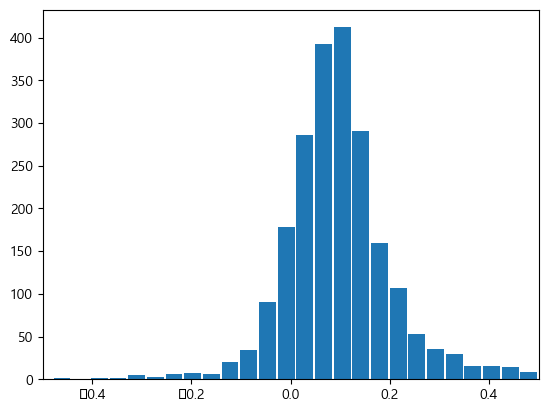

In [39]:
import matplotlib.pyplot as plt
plt.hist(kr_mon['Jan'], histtype ='bar', rwidth = .9, bins = 100)
plt.xlim([-0.5,0.5])

(-0.5, 0.5)

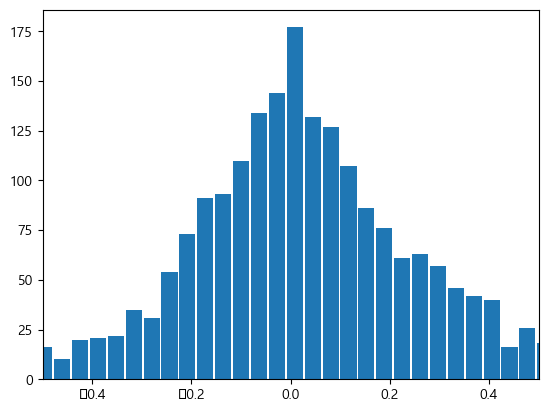

In [40]:
plt.hist(kr_mon['Aug'], histtype ='bar', rwidth = .9, bins = 300)
plt.xlim([-0.5,0.5])

**1월 1일 기준 누적 수익률 0.2 이상은 ‘High’, -0.2<<0.2 는 ‘Middle’, -0.2 이하는 ‘Low’ 로 구분지어 각 색 분류 하여 시각화에 사용**

In [41]:
kr_mon['Jan_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon['Jan']]
kr_mon['Feb_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon['Mar']]
kr_mon['Mar_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon['Jan']]
kr_mon['Apr_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon['Apr']]
kr_mon['May_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon['May']]
kr_mon['Jun_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon['Jun']]
kr_mon['Jul_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon['Jul']]
kr_mon['Aug_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon['Aug']]

ov_mon['Jan_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon['Jan']]
ov_mon['Feb_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon['Mar']]
ov_mon['Mar_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon['Jan']]
ov_mon['Apr_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon['Apr']]
ov_mon['May_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon['May']]
ov_mon['Jun_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon['Jun']]
ov_mon['Jul_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon['Jul']]
ov_mon['Aug_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon['Aug']]

# 시가총액 Sector 별 상위 30 종목 데이터 생성

**선정한 6개 Sector 별로 시가총액 각 상위 30 종목 추출하여 데이터 생성**

In [42]:
#시가총액 Sector 별 상위 30 종목 추출, 국내
krx = fdr.StockListing('krx-marcap')

krx['markap'] = krx.index
krx = krx.loc[:,['Name','markap']]
krx.columns = ['종목명','시가총액순위']
kr_mer = pd.merge(krx, kr_sec, how = 'left', on = '종목명')

# 중요 Sector 6개 선정
kr_sec_180 =  kr_mer.sort_values(by='시가총액순위', ascending = True).groupby('sector').head(40)
kr_sec_180 = kr_sec_180.loc[:,['종목명','sector']]
kr_sec_180 = kr_sec_180[kr_sec_180['sector'].isin(['산업재','정보기술','금융','헬스케어','소재','커뮤니케이션서비스'])]

# 가격데이터와 Sector 데이터에 동시에 존재하는 종목 추출
col_kr = kr.columns.to_list()
kr_list = kr_sec_180['종목명'].to_list()
col_kr_list_1 = [x for x in kr_list if x in col_kr]
kr_sec_180 = kr_sec_180[kr_sec_180['종목명'].isin(col_kr_list_1)]

kr_sec_180 = kr_sec_180.groupby('sector').head(30)
col_kr_list = kr_sec_180['종목명'].to_list()
#col_kr_list = [x for x in kr_list if x in col_kr]
kr_price_180 = kr[col_kr_list]

#시가총액 Sector 별 상위 30 종목 추출, 해외(NASDAQ)
nasd = fdr.StockListing('NASDAQ')

nasd['markap'] = nasd.index
nasd = nasd.loc[:,['Symbol','markap']]
nasd.columns = ['종목명','시가총액순위']
ov_mer = pd.merge(nasd, ov_sec, how = 'left', on = '종목명')

# Sector 없는 종목 삭제
ov_mer.dropna(axis = 0, inplace = True)

# 중요 Sector 6개 선정
ov_sec_180 =  ov_mer.sort_values(by='시가총액순위', ascending = True).groupby('sector').head(40)
ov_sec_180 = ov_sec_180.loc[:,['종목명','sector']]
ov_sec_180 = ov_sec_180[ov_sec_180['sector'].isin(['산업재','정보기술','금융','헬스케어','소재','커뮤니케이션서비스'])]

# 가격데이터와 Sector 데이터에 동시에 존재하는 종목 추출
col_ov = ov.columns.to_list()
ov_list = ov_sec_180['종목명'].to_list()
col_ov_list_1 = [x for x in ov_list if x in col_ov]
ov_sec_180 = ov_sec_180[ov_sec_180['종목명'].isin(col_ov_list_1)]

ov_sec_180 = ov_sec_180.groupby('sector').head(30)
col_ov_list = ov_sec_180['종목명'].to_list()
#col_kr_list = [x for x in kr_list if x in col_kr]
ov_price_180 = ov[col_ov_list]

100%|██████████| 4128/4128 [00:06<00:00, 612.19it/s] 


In [43]:
kr_per_180 = kr_price_180.pct_change()
ov_per_180 = ov_price_180.pct_change()

kr_cum_180 = (1+kr_per_180).cumprod()-1
ov_cum_180 = (1+ov_per_180).cumprod()-1

#월말 기준 누적 수익률
kr_mon_180 = kr_cum_180.loc[['2023-01-31','2023-02-28','2023-03-31','2023-04-30','2023-05-31','2023-06-30','2023-07-31','2023-08-30'],:].T
ov_mon_180 = ov_cum_180.loc[['2023-01-31','2023-02-28','2023-03-31','2023-04-30','2023-05-31','2023-06-30','2023-07-31','2023-08-30'],:].T

kr_mon_180['종목'] = kr_mon_180.index
ov_mon_180['종목'] = ov_mon_180.index

kr_mon_180.reset_index(drop = True, inplace = True)
ov_mon_180.reset_index(drop = True, inplace = True)

kr_mon_180.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','종목']
ov_mon_180.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','종목']
kr_mon_180 = kr_mon_180[['종목','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug']]
ov_mon_180 = ov_mon_180[['종목','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug']]

kr_mon_180['Jan_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon_180['Jan']]
kr_mon_180['Feb_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon_180['Mar']]
kr_mon_180['Mar_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon_180['Jan']]
kr_mon_180['Apr_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon_180['Apr']]
kr_mon_180['May_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon_180['May']]
kr_mon_180['Jun_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon_180['Jun']]
kr_mon_180['Jul_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon_180['Jul']]
kr_mon_180['Aug_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in kr_mon_180['Aug']]

ov_mon_180['Jan_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon_180['Jan']]
ov_mon_180['Feb_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon_180['Mar']]
ov_mon_180['Mar_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon_180['Jan']]
ov_mon_180['Apr_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon_180['Apr']]
ov_mon_180['May_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon_180['May']]
ov_mon_180['Jun_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon_180['Jun']]
ov_mon_180['Jul_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon_180['Jul']]
ov_mon_180['Aug_earning'] = ['High' if i > 0.2 else 'middle' if i > -0.2 else 'Low' for i in ov_mon_180['Aug']]

In [44]:
# 편의 위함
kr_earn = kr_mon_180
ov_earn = ov_mon_180

In [45]:
# kr_mon.to_csv('kr_earning.csv', encoding='UTF-8-sig')
# ov_mon.to_csv('ov_earning.csv', encoding='UTF-8-sig')

# kr_sec.to_csv('kr_sec.csv', encoding='UTF-8-sig')
# ov_sec.to_csv('ov_sec.csv', encoding='UTF-8-sig')

# ov_price.to_csv('ov_price.csv', encoding='UTF-8-sig')
# kr_price.to_csv('kr_price.csv', encoding='UTF-8-sig')

# kr_mon_180.to_csv('kr_earning_180.csv', encoding='UTF-8-sig')
# ov_mon_180.to_csv('ov_earning_180.csv', encoding='UTF-8-sig')

# kr_sec_180.to_csv('kr_sec_180.csv', encoding='UTF-8-sig')
# ov_sec_180.to_csv('ov_sec_180.csv', encoding='UTF-8-sig')

# ov_price_180.to_csv('ov_price_180.csv', encoding='UTF-8-sig')
# kr_price_180.to_csv('kr_price_180.csv', encoding='UTF-8-sig')

# eco.to_csv('economics.csv', encoding='UTF-8-sig')

# 국내, 해외 통합하여 전 Sector 네트워크 시각화

In [46]:
kr_sec = kr_sec_180
ov_sec = ov_sec_180
kr_price = kr_price_180
ov_price = ov_price_180

In [47]:
# Sector별 종목명 추출
#국내
col_kr = kr_price.columns.to_list()

소재_kr = kr_sec[kr_sec['sector']=='소재']['종목명'].to_list()
col_소재_kr = [x for x in 소재_kr if x in col_kr]
kr_price_소재 = kr_price[col_소재_kr]

정보기술_kr = kr_sec[kr_sec['sector']=='정보기술']['종목명'].to_list()
col_정보_kr = [x for x in 정보기술_kr if x in col_kr]
kr_price_정보 = kr_price[col_정보_kr]

커뮤니케이션서비스_kr = kr_sec[kr_sec['sector']=='커뮤니케이션서비스']['종목명'].to_list()
col_커뮤_kr = [x for x in 커뮤니케이션서비스_kr if x in col_kr]
kr_price_커뮤 = kr_price[col_커뮤_kr]


금융_kr = kr_sec[kr_sec['sector']=='금융']['종목명'].to_list()
col_금융_kr = [x for x in 금융_kr if x in col_kr]
kr_price_금융 = kr_price[col_금융_kr]


산업재_kr = kr_sec[kr_sec['sector']=='산업재']['종목명'].to_list()
col_산업_kr = [x for x in 산업재_kr if x in col_kr]
kr_price_산업 = kr_price[col_산업_kr]


헬스케어_kr = kr_sec[kr_sec['sector']=='헬스케어']['종목명'].to_list()
col_헬스_kr = [x for x in 헬스케어_kr if x in col_kr]
kr_price_헬스 = kr_price[col_헬스_kr]


#해외
col_ov = ov_price.columns.to_list()

소재_ov = ov_sec[ov_sec['sector']=='소재']['종목명'].to_list()
col_소재_ov = [x for x in 소재_ov if x in col_ov]
ov_price_소재 = ov_price[col_소재_ov]

정보기술_ov = ov_sec[ov_sec['sector']=='정보기술']['종목명'].to_list()
col_정보_ov = [x for x in 정보기술_ov if x in col_ov]
ov_price_정보 = ov_price[col_정보_ov]

커뮤니케이션서비스_ov = ov_sec[ov_sec['sector']=='커뮤니케이션서비스']['종목명'].to_list()
col_커뮤_ov = [x for x in 커뮤니케이션서비스_ov if x in col_ov]
ov_price_커뮤 = ov_price[col_커뮤_ov]


금융_ov = ov_sec[ov_sec['sector']=='금융']['종목명'].to_list()
col_금융_ov = [x for x in 금융_ov if x in col_ov]
ov_price_금융 = ov_price[col_금융_ov]


산업재_ov = ov_sec[ov_sec['sector']=='산업재']['종목명'].to_list()
col_산업_ov = [x for x in 산업재_ov if x in col_ov]
ov_price_산업 = ov_price[col_산업_ov]


헬스케어_ov = ov_sec[ov_sec['sector']=='헬스케어']['종목명'].to_list()
col_헬스_ov = [x for x in 헬스케어_ov if x in col_ov]
ov_price_헬스 = ov_price[col_헬스_ov]

In [48]:
stock = pd.merge(kr_price, ov_price, how = 'left', left_index=True, right_index=True)

# 네트워크 생성 함수

- 단순히 주가의 상관계수로 종목 간 엣지를 생성하면 모든 종목이 비슷하게 움직이거나 쓸데없는 종목이 중요 종목으로 선정되는 문제 발생

- 일일 주가 변동률을 통해 correalation matrix 생성 후, 이를 edge로 만들어 Sector간 관계 확보

- 임계값 +-0.4 이하의 엣지는 제거

In [49]:
def generate_network(df):
    #상관행렬 생성
    stock_per = df.pct_change()
    stock_per = stock_per.iloc[1:,:]
    stock_cor = stock_per.dropna(axis = 1).corr(method = 'pearson')

    # convert matrix to list of edges and rename the columns
    edges = stock_cor.stack().reset_index()
    edges.columns = ["종목_1", "종목_2", "correlation"]

    # remove self correlations
    edges = edges.loc[edges["종목_1"] != edges["종목_2"]].copy()

    # 임계값(+-0.4) 이하 제거
    threshold = 0.4

    # 기본 무방향 그래프 생성
    Gx = nx.from_pandas_edgelist(edges, "종목_1", "종목_2", edge_attr=["correlation"])

    # list to store edges to remove
    remove = []
    # loop through edges in Gx and find correlations which are below the threshold
    for 종목_1, 종목_2 in Gx.edges():
        corr = Gx[종목_1][종목_2]["correlation"]
        # add to remove node list if abs(corr) < threshold
        if abs(corr) < threshold:
            remove.append((종목_1, 종목_2))

    # remove edges contained in the remove list
    Gx.remove_edges_from(remove)
    print(str(len(remove)) + " edges removed")
    return Gx

In [50]:
Gx = generate_network(stock)

61743 edges removed


In [51]:
# 국내인지 해외인지 속성 부여하기
korea = kr_price.columns.to_list()
nasdaq = ov_price.columns.to_list()

Gx.add_nodes_from(korea, shape = 'star')
Gx.add_nodes_from(nasdaq, shape = 'dot')

#노드 사이즈 지정
degree_dict = dict(nx.degree(Gx))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx.add_node(stock_list[i], size = nsize[i]*1.1)

for n, d in Gx.nodes(data=True):
    if d['shape'] =='star':
        Gx.add_node(n, size = d['size']*1.1)
    else:
        Gx.add_node(n, size = d['size']*0.2)

In [52]:
Gx.add_nodes_from(col_소재_kr, group = 1)
Gx.add_nodes_from(col_정보_kr, group = 2)
Gx.add_nodes_from(col_커뮤_kr, group = 3)
Gx.add_nodes_from(col_금융_kr, group = 4)
Gx.add_nodes_from(col_산업_kr, group = 5)
Gx.add_nodes_from(col_헬스_kr, group = 6)

Gx.add_nodes_from(col_소재_ov, group = 1)
Gx.add_nodes_from(col_정보_ov, group = 2)
Gx.add_nodes_from(col_커뮤_ov, group = 3)
Gx.add_nodes_from(col_금융_ov, group = 4)
Gx.add_nodes_from(col_산업_ov, group = 5)
Gx.add_nodes_from(col_헬스_ov, group = 6)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector.html')

All_Sector.html


- 국내 해외가 구분되어 그려짐
- 국내의 경우 산업끼리 꽤나 구분지어지며 네트워크 형성
- 해외의 경우 구분은 되나 산업간 관계 또한 국내보다 훨씬 밀접함을 확인


# 경제지표 포함 후 전 종목 시각화

In [53]:
eco.set_index(keys = 'Date', inplace = True)

In [54]:
stock = pd.merge(kr_price, ov_price, how = 'left', left_index=True, right_index=True)
stock_eco = pd.merge(stock, eco, how = 'left', left_index=True, right_index=True)

In [55]:
Gx_eco = generate_network(stock_eco)

63138 edges removed


In [56]:
# 국내인지 해외인지 속성 부여하기
korea = kr_price.columns.to_list()
nasdaq = ov_price.columns.to_list()
eco_col = eco.columns.to_list()

Gx_eco.add_nodes_from(korea, shape = 'star')
Gx_eco.add_nodes_from(nasdaq, shape = 'dot')
Gx_eco.add_nodes_from(eco_col, shape = 'square')


#노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_eco))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_eco.add_node(stock_list[i], size = nsize[i]*1.1)

for n, d in Gx_eco.nodes(data=True):
    if d['shape'] =='star':
        Gx_eco.add_node(n, size = d['size']*1.1)
    elif d['shape'] == 'dot':
        Gx_eco.add_node(n, size = d['size']*0.2)
    else:
        Gx_eco.add_node(n, size = 30)

In [57]:
Gx_eco.add_nodes_from(col_소재_kr, group = 1)
Gx_eco.add_nodes_from(col_정보_kr, group = 2)
Gx_eco.add_nodes_from(col_커뮤_kr, group = 3)
Gx_eco.add_nodes_from(col_금융_kr, group = 4)
Gx_eco.add_nodes_from(col_산업_kr, group = 5)
Gx_eco.add_nodes_from(col_헬스_kr, group = 6)

Gx_eco.add_nodes_from(col_소재_ov, group = 1)
Gx_eco.add_nodes_from(col_정보_ov, group = 2)
Gx_eco.add_nodes_from(col_커뮤_ov, group = 3)
Gx_eco.add_nodes_from(col_금융_ov, group = 4)
Gx_eco.add_nodes_from(col_산업_ov, group = 5)
Gx_eco.add_nodes_from(col_헬스_ov, group = 6)

Gx_eco.add_nodes_from(eco_col, group = 7)


net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_eco)
net.show('All_Sector_Economics.html')

All_Sector_Economics.html


- 경제지표 넣어서 시각화 한 결과 큰 관계를 보기 어려움
- 선행, 후행 관계를 추가적으로 알아보면 좋을 듯

# 국내, 해외 종목 구분하여 전 Sector 포함 후 중요 종목 추출

**국내, 해외 종목이 구분되어짐을 확인 했으므로 구분하여 분석 진행**

**중요 종목 선정 방법은 아래 5가지**

- Degree Centrality 연결 중심성 : 이웃이 얼마나 많은가
- Closeness Centrality 근접 중심성 : 다른 노드들과 얼마나 가까운가
- Betweenness Centrality 매개 중심성: 얼마나 bridge 역할을 하는지의 정도
- Eigenvector centrality: 얼마나 central한 node들과 연결되어 있는가
- PageRank : 중요한 노드들은 또다른 중요한 노드로부터 많은 유입 링크를 가진다는 가정

In [58]:
Gx_kr = generate_network(kr_price)
Gx_ov = generate_network(ov_price)

15273 edges removed
14431 edges removed


## 중요도 별 상위 종목 추출 함수

**각 중요도 상위 10개 종목 추출**

**각 중요도에서 3번 이상 선정된 종목 추출**

In [59]:
def generate_top(Gx):
    # degree
    degree_dict = nx.degree_centrality(Gx)
    degree = pd.DataFrame.from_dict(degree_dict, orient = 'index', columns = ['centrality'])
    degree.reset_index(inplace=True)
    degree.columns = ['종목명','centrality']

    degree = pd.merge(degree, kr_sec, how = 'left', on = '종목명')

    degree_10 = degree.sort_values(by='centrality', ascending = False).head(10)
    degree_10['centrality'] = 'Degree'

    # closeness
    close_dict = nx.closeness_centrality(Gx)
    close = pd.DataFrame.from_dict(close_dict, orient = 'index', columns = ['centrality'])
    close.reset_index(inplace=True)
    close.columns = ['종목명','centrality']

    close = pd.merge(close, kr_sec, how = 'left', on = '종목명')

    close_10 = close.sort_values(by='centrality', ascending = False).head(10)
    close_10['centrality'] = 'close'

    # beetness
    beet_dict = nx.betweenness_centrality(Gx, normalized=True, endpoints=False, weight = 'weight')
    beet = pd.DataFrame.from_dict(beet_dict, orient = 'index', columns = ['centrality'])
    beet.reset_index(inplace=True)
    beet.columns = ['종목명','centrality']

    beet = pd.merge(beet, kr_sec, how = 'left', on = '종목명')

    beet_10 = beet.sort_values(by='centrality', ascending = False).head(10)
    beet_10['centrality'] = 'beet'

    # eigenness
    eigen_dict = nx.eigenvector_centrality(Gx, weight = 'weight', max_iter=5000)
    eigen = pd.DataFrame.from_dict(eigen_dict, orient = 'index', columns = ['centrality'])
    eigen.reset_index(inplace=True)
    eigen.columns = ['종목명','centrality']

    eigen = pd.merge(eigen, kr_sec, how = 'left', on = '종목명')

    eigen_10 = eigen.sort_values(by='centrality', ascending = False).head(10)
    eigen_10['centrality'] = 'eigen'

    # pagerankness
    pagerank_dict = nx.pagerank(Gx, alpha = .9, max_iter = 1000, weight = 'weight')
    pagerank = pd.DataFrame.from_dict(pagerank_dict, orient = 'index', columns = ['centrality'])
    pagerank.reset_index(inplace=True)
    pagerank.columns = ['종목명','centrality']

    pagerank = pd.merge(pagerank, kr_sec, how = 'left', on = '종목명')

    pagerank_10 = pagerank.sort_values(by='centrality', ascending = False).head(10)
    pagerank_10['centrality'] = 'pagerank'


    #중요도 데이터 Merge
    centrality_10 = pd.merge(degree_10, close_10, how='outer', on = ['종목명','centrality', 'sector'])
    centrality_10 = pd.merge(centrality_10, beet_10, how='outer', on = ['종목명','centrality', 'sector'])
    centrality_10 = pd.merge(centrality_10, eigen_10, how='outer', on = ['종목명','centrality', 'sector'])
    centrality_10 = pd.merge(centrality_10, pagerank_10, how='outer', on = ['종목명','centrality', 'sector'])

    condition = centrality_10['종목명'].value_counts() >= 3
    value_num = centrality_10['종목명'].value_counts()

    top_stocks = value_num[condition].index.to_list()

    return top_stocks

In [60]:
top_stocks_kr = generate_top(Gx_kr)
top_stocks_ov = generate_top(Gx_ov)

print(f'국내 중요 종목 : {top_stocks_kr}\n\n해외 중요 종목 : {top_stocks_ov}')

국내 중요 종목 : ['미래에셋증권', '삼성전자', '신풍제약', '삼성증권', '카카오', '카카오뱅크', 'NAVER', '녹십자']

해외 중요 종목 : ['SEIC', 'TROW', 'LECO', 'MIDD', 'UFPI', 'CG', 'NXPI', 'TXN', 'POOL', 'ADSK', 'AAPL']


**위와 같은 종목으로 포트폴리오를 구성가능. 이는 전체 종목을 대표하거나 안정성을 보장**

# 주요 종목 활용하여 시각화

In [61]:
# 국내인지 해외인지 속성 부여하기
korea = kr_price.columns.to_list()
nasdaq = ov_price.columns.to_list()

Gx_kr.add_nodes_from(korea, shape = 'dot')
Gx_ov.add_nodes_from(nasdaq, shape = 'dot')

Gx_kr.add_nodes_from(top_stocks_kr, shape = 'star')
Gx_ov.add_nodes_from(top_stocks_ov, shape = 'star')

# 노드 사이즈 지정
# 국내
degree_dict = dict(nx.degree(Gx_kr))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr.add_node(stock_list[i], size = nsize[i]*1.1)

# 해외
degree_dict = dict(nx.degree(Gx_ov))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov.add_node(stock_list[i], size = nsize[i]*0.2)


In [62]:
Gx_kr.add_nodes_from(col_소재_kr, group = 1)
Gx_kr.add_nodes_from(col_정보_kr, group = 2)
Gx_kr.add_nodes_from(col_커뮤_kr, group = 3)
Gx_kr.add_nodes_from(col_금융_kr, group = 4)
Gx_kr.add_nodes_from(col_산업_kr, group = 5)
Gx_kr.add_nodes_from(col_헬스_kr, group = 6)

Gx_kr.add_nodes_from(top_stocks_kr, size = 30)

Gx_ov.add_nodes_from(col_소재_ov, group = 1)
Gx_ov.add_nodes_from(col_정보_ov, group = 2)
Gx_ov.add_nodes_from(col_커뮤_ov, group = 3)
Gx_ov.add_nodes_from(col_금융_ov, group = 4)
Gx_ov.add_nodes_from(col_산업_ov, group = 5)
Gx_ov.add_nodes_from(col_헬스_ov, group = 6)

Gx_ov.add_nodes_from(top_stocks_ov, size = 30)

# 국내 종목 시각화

In [63]:
net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr)
net.show('All_Sector_Importance_kr.html')

All_Sector_Importance_kr.html


# 해외 종목 시각화

In [64]:
net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov)
net.show('All_Sector_Importance_ov.html')

All_Sector_Importance_ov.html


# 산업별 평균 중요도 산출 후 누적 수익률과 비교

- 각 중요도가 누적 수익률과 직접적인 연관이 있는가를 확인

## 국내

In [65]:
kr_price_Jan = kr_price.loc['2023-01-03':'2023-01-31',:]
kr_price_Feb = kr_price.loc['2023-02-01':'2023-02-28',:]
kr_price_Mar = kr_price.loc['2023-03-01':'2023-03-31',:]
kr_price_Apr = kr_price.loc['2023-04-01':'2023-04-30',:]
kr_price_May = kr_price.loc['2023-05-01':'2023-05-31',:]
kr_price_Jun = kr_price.loc['2023-06-01':'2023-06-30',:]
kr_price_Jul = kr_price.loc['2023-07-01':'2023-07-31',:]
kr_price_Aug = kr_price.loc['2023-08-01':'2023-08-30',:]

## 월 별 네트워크 생성

In [66]:
Gx_Jan = generate_network(kr_price_Jan)
Gx_Feb = generate_network(kr_price_Feb)
Gx_Mar = generate_network(kr_price_Mar)
Gx_Apr = generate_network(kr_price_Apr)
Gx_May = generate_network(kr_price_May)
Gx_Jun = generate_network(kr_price_Jun)
Gx_Jul = generate_network(kr_price_Jul)
Gx_Aug = generate_network(kr_price_Aug)

12782 edges removed
12324 edges removed
12647 edges removed
13479 edges removed
13523 edges removed
13636 edges removed
11558 edges removed
13047 edges removed


## degree 월 별 중요도 데이터 생성

In [67]:
# 1월
degree_dict_Jan = nx.degree_centrality(Gx_Jan)
degree_df_Jan = pd.DataFrame.from_dict(degree_dict_Jan, orient = 'index', columns = ['centrality'])
degree_df_Jan.reset_index(inplace=True)
degree_df_Jan.columns = ['종목명','centrality']

degree_Jan = pd.merge(degree_df_Jan, kr_sec, how = 'left', on = '종목명')

degree_Jan_mean = degree_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Jan_mean.reset_index(inplace=True)
degree_Jan_mean.columns = ['sector','centrality']
degree_Jan_mean['Month'] = 1

# 2월
degree_dict_Feb = nx.degree_centrality(Gx_Feb)
degree_df_Feb = pd.DataFrame.from_dict(degree_dict_Feb, orient = 'index', columns = ['centrality'])
degree_df_Feb.reset_index(inplace=True)
degree_df_Feb.columns = ['종목명','centrality']

degree_Feb = pd.merge(degree_df_Feb, kr_sec, how = 'left', on = '종목명')

degree_Feb_mean = degree_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Feb_mean.reset_index(inplace=True)
degree_Feb_mean.columns = ['sector','centrality']
degree_Feb_mean['Month'] = 2

# 3월
degree_dict_Mar = nx.degree_centrality(Gx_Mar)
degree_df_Mar = pd.DataFrame.from_dict(degree_dict_Mar, orient = 'index', columns = ['centrality'])
degree_df_Mar.reset_index(inplace=True)
degree_df_Mar.columns = ['종목명','centrality']

degree_Mar = pd.merge(degree_df_Mar, kr_sec, how = 'left', on = '종목명')

degree_Mar_mean = degree_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Mar_mean.reset_index(inplace=True)
degree_Mar_mean.columns = ['sector','centrality']
degree_Mar_mean['Month'] = 3

# 4월
degree_dict_Apr = nx.degree_centrality(Gx_Apr)
degree_df_Apr = pd.DataFrame.from_dict(degree_dict_Apr, orient = 'index', columns = ['centrality'])
degree_df_Apr.reset_index(inplace=True)
degree_df_Apr.columns = ['종목명','centrality']

degree_Apr = pd.merge(degree_df_Apr, kr_sec, how = 'left', on = '종목명')

degree_Apr_mean = degree_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Apr_mean.reset_index(inplace=True)
degree_Apr_mean.columns = ['sector','centrality']
degree_Apr_mean['Month'] = 4

# 5월
degree_dict_May = nx.degree_centrality(Gx_May)
degree_df_May = pd.DataFrame.from_dict(degree_dict_May, orient = 'index', columns = ['centrality'])
degree_df_May.reset_index(inplace=True)
degree_df_May.columns = ['종목명','centrality']

degree_May = pd.merge(degree_df_May, kr_sec, how = 'left', on = '종목명')

degree_May_mean = degree_May.loc[:,['sector','centrality']].groupby('sector').mean()
degree_May_mean.reset_index(inplace=True)
degree_May_mean.columns = ['sector','centrality']
degree_May_mean['Month'] = 5

# 6월
degree_dict_Jun = nx.degree_centrality(Gx_Jun)
degree_df_Jun = pd.DataFrame.from_dict(degree_dict_Jun, orient = 'index', columns = ['centrality'])
degree_df_Jun.reset_index(inplace=True)
degree_df_Jun.columns = ['종목명','centrality']

degree_Jun = pd.merge(degree_df_Jun, kr_sec, how = 'left', on = '종목명')

degree_Jun_mean = degree_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Jun_mean.reset_index(inplace=True)
degree_Jun_mean.columns = ['sector','centrality']
degree_Jun_mean['Month'] = 6

# 7월
degree_dict_Jul = nx.degree_centrality(Gx_Jul)
degree_df_Jul = pd.DataFrame.from_dict(degree_dict_Jul, orient = 'index', columns = ['centrality'])
degree_df_Jul.reset_index(inplace=True)
degree_df_Jul.columns = ['종목명','centrality']

degree_Jul = pd.merge(degree_df_Jul, kr_sec, how = 'left', on = '종목명')

degree_Jul_mean = degree_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Jul_mean.reset_index(inplace=True)
degree_Jul_mean.columns = ['sector','centrality']
degree_Jul_mean['Month'] = 7

# 8월
degree_dict_Aug = nx.degree_centrality(Gx_Aug)
degree_df_Aug = pd.DataFrame.from_dict(degree_dict_Aug, orient = 'index', columns = ['centrality'])
degree_df_Aug.reset_index(inplace=True)
degree_df_Aug.columns = ['종목명','centrality']

degree_Aug = pd.merge(degree_df_Aug, kr_sec, how = 'left', on = '종목명')

degree_Aug_mean = degree_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Aug_mean.reset_index(inplace=True)
degree_Aug_mean.columns = ['sector','centrality']
degree_Aug_mean['Month'] = 8

In [68]:
degree_mean = pd.merge(degree_Jan_mean, degree_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_May_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

## closeness 월 별 중요도 데이터 생성

In [69]:
# 1월
close_dict_Jan = nx.closeness_centrality(Gx_Jan)
close_df_Jan = pd.DataFrame.from_dict(close_dict_Jan, orient = 'index', columns = ['centrality'])
close_df_Jan.reset_index(inplace=True)
close_df_Jan.columns = ['종목명','centrality']

close_Jan = pd.merge(close_df_Jan, kr_sec, how = 'left', on = '종목명')

close_Jan_mean = close_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
close_Jan_mean.reset_index(inplace=True)
close_Jan_mean.columns = ['sector','centrality']
close_Jan_mean['Month'] = 1

# 2월
close_dict_Feb = nx.closeness_centrality(Gx_Feb)
close_df_Feb = pd.DataFrame.from_dict(close_dict_Feb, orient = 'index', columns = ['centrality'])
close_df_Feb.reset_index(inplace=True)
close_df_Feb.columns = ['종목명','centrality']

close_Feb = pd.merge(close_df_Feb, kr_sec, how = 'left', on = '종목명')

close_Feb_mean = close_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
close_Feb_mean.reset_index(inplace=True)
close_Feb_mean.columns = ['sector','centrality']
close_Feb_mean['Month'] = 2

# 3월
close_dict_Mar = nx.closeness_centrality(Gx_Mar)
close_df_Mar = pd.DataFrame.from_dict(close_dict_Mar, orient = 'index', columns = ['centrality'])
close_df_Mar.reset_index(inplace=True)
close_df_Mar.columns = ['종목명','centrality']

close_Mar = pd.merge(close_df_Mar, kr_sec, how = 'left', on = '종목명')

close_Mar_mean = close_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
close_Mar_mean.reset_index(inplace=True)
close_Mar_mean.columns = ['sector','centrality']
close_Mar_mean['Month'] = 3

# 4월
close_dict_Apr = nx.closeness_centrality(Gx_Apr)
close_df_Apr = pd.DataFrame.from_dict(close_dict_Apr, orient = 'index', columns = ['centrality'])
close_df_Apr.reset_index(inplace=True)
close_df_Apr.columns = ['종목명','centrality']

close_Apr = pd.merge(close_df_Apr, kr_sec, how = 'left', on = '종목명')

close_Apr_mean = close_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
close_Apr_mean.reset_index(inplace=True)
close_Apr_mean.columns = ['sector','centrality']
close_Apr_mean['Month'] = 4

# 5월
close_dict_May = nx.closeness_centrality(Gx_May)
close_df_May = pd.DataFrame.from_dict(close_dict_May, orient = 'index', columns = ['centrality'])
close_df_May.reset_index(inplace=True)
close_df_May.columns = ['종목명','centrality']

close_May = pd.merge(close_df_May, kr_sec, how = 'left', on = '종목명')

close_May_mean = close_May.loc[:,['sector','centrality']].groupby('sector').mean()
close_May_mean.reset_index(inplace=True)
close_May_mean.columns = ['sector','centrality']
close_May_mean['Month'] = 5

# 6월
close_dict_Jun = nx.closeness_centrality(Gx_Jun)
close_df_Jun = pd.DataFrame.from_dict(close_dict_Jun, orient = 'index', columns = ['centrality'])
close_df_Jun.reset_index(inplace=True)
close_df_Jun.columns = ['종목명','centrality']

close_Jun = pd.merge(close_df_Jun, kr_sec, how = 'left', on = '종목명')

close_Jun_mean = close_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
close_Jun_mean.reset_index(inplace=True)
close_Jun_mean.columns = ['sector','centrality']
close_Jun_mean['Month'] = 6

# 7월
close_dict_Jul = nx.closeness_centrality(Gx_Jul)
close_df_Jul = pd.DataFrame.from_dict(close_dict_Jul, orient = 'index', columns = ['centrality'])
close_df_Jul.reset_index(inplace=True)
close_df_Jul.columns = ['종목명','centrality']

close_Jul = pd.merge(close_df_Jul, kr_sec, how = 'left', on = '종목명')

close_Jul_mean = close_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
close_Jul_mean.reset_index(inplace=True)
close_Jul_mean.columns = ['sector','centrality']
close_Jul_mean['Month'] = 7

# 8월
close_dict_Aug = nx.closeness_centrality(Gx_Aug)
close_df_Aug = pd.DataFrame.from_dict(close_dict_Aug, orient = 'index', columns = ['centrality'])
close_df_Aug.reset_index(inplace=True)
close_df_Aug.columns = ['종목명','centrality']

close_Aug = pd.merge(close_df_Aug, kr_sec, how = 'left', on = '종목명')

close_Aug_mean = close_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
close_Aug_mean.reset_index(inplace=True)
close_Aug_mean.columns = ['sector','centrality']
close_Aug_mean['Month'] = 8

In [70]:
close_mean = pd.merge(close_Jan_mean, close_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_May_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

## beetweennese 월 별 중요도 데이터 생성

In [71]:
# 1월
beet_dict_Jan = nx.betweenness_centrality(Gx_Jan, normalized=True, endpoints=False, weight = 'weight')
beet_df_Jan = pd.DataFrame.from_dict(beet_dict_Jan, orient = 'index', columns = ['centrality'])
beet_df_Jan.reset_index(inplace=True)
beet_df_Jan.columns = ['종목명','centrality']

beet_Jan = pd.merge(beet_df_Jan, kr_sec, how = 'left', on = '종목명')

beet_Jan_mean = beet_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Jan_mean.reset_index(inplace=True)
beet_Jan_mean.columns = ['sector','centrality']
beet_Jan_mean['Month'] = 1

# 2월
beet_dict_Feb = nx.betweenness_centrality(Gx_Feb, normalized=True, endpoints=False, weight = 'weight')
beet_df_Feb = pd.DataFrame.from_dict(beet_dict_Feb, orient = 'index', columns = ['centrality'])
beet_df_Feb.reset_index(inplace=True)
beet_df_Feb.columns = ['종목명','centrality']

beet_Feb = pd.merge(beet_df_Feb, kr_sec, how = 'left', on = '종목명')

beet_Feb_mean = beet_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Feb_mean.reset_index(inplace=True)
beet_Feb_mean.columns = ['sector','centrality']
beet_Feb_mean['Month'] = 2

# 3월
beet_dict_Mar = nx.betweenness_centrality(Gx_Mar, normalized=True, endpoints=False, weight = 'weight')
beet_df_Mar = pd.DataFrame.from_dict(beet_dict_Mar, orient = 'index', columns = ['centrality'])
beet_df_Mar.reset_index(inplace=True)
beet_df_Mar.columns = ['종목명','centrality']

beet_Mar = pd.merge(beet_df_Mar, kr_sec, how = 'left', on = '종목명')

beet_Mar_mean = beet_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Mar_mean.reset_index(inplace=True)
beet_Mar_mean.columns = ['sector','centrality']
beet_Mar_mean['Month'] = 3

# 4월
beet_dict_Apr = nx.betweenness_centrality(Gx_Apr, normalized=True, endpoints=False, weight = 'weight')
beet_df_Apr = pd.DataFrame.from_dict(beet_dict_Apr, orient = 'index', columns = ['centrality'])
beet_df_Apr.reset_index(inplace=True)
beet_df_Apr.columns = ['종목명','centrality']

beet_Apr = pd.merge(beet_df_Apr, kr_sec, how = 'left', on = '종목명')

beet_Apr_mean = beet_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Apr_mean.reset_index(inplace=True)
beet_Apr_mean.columns = ['sector','centrality']
beet_Apr_mean['Month'] = 4

# 5월
beet_dict_May = nx.betweenness_centrality(Gx_May, normalized=True, endpoints=False, weight = 'weight')
beet_df_May = pd.DataFrame.from_dict(beet_dict_May, orient = 'index', columns = ['centrality'])
beet_df_May.reset_index(inplace=True)
beet_df_May.columns = ['종목명','centrality']

beet_May = pd.merge(beet_df_May, kr_sec, how = 'left', on = '종목명')

beet_May_mean = beet_May.loc[:,['sector','centrality']].groupby('sector').mean()
beet_May_mean.reset_index(inplace=True)
beet_May_mean.columns = ['sector','centrality']
beet_May_mean['Month'] = 5

# 6월
beet_dict_Jun = nx.betweenness_centrality(Gx_Jun, normalized=True, endpoints=False, weight = 'weight')
beet_df_Jun = pd.DataFrame.from_dict(beet_dict_Jun, orient = 'index', columns = ['centrality'])
beet_df_Jun.reset_index(inplace=True)
beet_df_Jun.columns = ['종목명','centrality']

beet_Jun = pd.merge(beet_df_Jun, kr_sec, how = 'left', on = '종목명')

beet_Jun_mean = beet_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Jun_mean.reset_index(inplace=True)
beet_Jun_mean.columns = ['sector','centrality']
beet_Jun_mean['Month'] = 6

# 7월
beet_dict_Jul = nx.betweenness_centrality(Gx_Jul, normalized=True, endpoints=False, weight = 'weight')
beet_df_Jul = pd.DataFrame.from_dict(beet_dict_Jul, orient = 'index', columns = ['centrality'])
beet_df_Jul.reset_index(inplace=True)
beet_df_Jul.columns = ['종목명','centrality']

beet_Jul = pd.merge(beet_df_Jul, kr_sec, how = 'left', on = '종목명')

beet_Jul_mean = beet_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Jul_mean.reset_index(inplace=True)
beet_Jul_mean.columns = ['sector','centrality']
beet_Jul_mean['Month'] = 7

# 8월
beet_dict_Aug = nx.betweenness_centrality(Gx_Aug, normalized=True, endpoints=False, weight = 'weight')
beet_df_Aug = pd.DataFrame.from_dict(beet_dict_Aug, orient = 'index', columns = ['centrality'])
beet_df_Aug.reset_index(inplace=True)
beet_df_Aug.columns = ['종목명','centrality']

beet_Aug = pd.merge(beet_df_Aug, kr_sec, how = 'left', on = '종목명')

beet_Aug_mean = beet_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Aug_mean.reset_index(inplace=True)
beet_Aug_mean.columns = ['sector','centrality']
beet_Aug_mean['Month'] = 8

In [72]:
beet_mean = pd.merge(beet_Jan_mean, beet_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_May_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

## eigenvector 월 별 중요도 데이터 생성

In [73]:
# 1월
eigen_dict_Jan = nx.eigenvector_centrality(Gx_Jan, weight = 'weight')
eigen_df_Jan = pd.DataFrame.from_dict(eigen_dict_Jan, orient = 'index', columns = ['centrality'])
eigen_df_Jan.reset_index(inplace=True)
eigen_df_Jan.columns = ['종목명','centrality']

eigen_Jan = pd.merge(eigen_df_Jan, kr_sec, how = 'left', on = '종목명')

eigen_Jan_mean = eigen_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Jan_mean.reset_index(inplace=True)
eigen_Jan_mean.columns = ['sector','centrality']
eigen_Jan_mean['Month'] = 1

# 2월
eigen_dict_Feb = nx.eigenvector_centrality(Gx_Feb, weight = 'weight')
eigen_df_Feb = pd.DataFrame.from_dict(eigen_dict_Feb, orient = 'index', columns = ['centrality'])
eigen_df_Feb.reset_index(inplace=True)
eigen_df_Feb.columns = ['종목명','centrality']

eigen_Feb = pd.merge(eigen_df_Feb, kr_sec, how = 'left', on = '종목명')

eigen_Feb_mean = eigen_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Feb_mean.reset_index(inplace=True)
eigen_Feb_mean.columns = ['sector','centrality']
eigen_Feb_mean['Month'] = 2

# 3월
eigen_dict_Mar = nx.eigenvector_centrality(Gx_Mar, weight = 'weight')
eigen_df_Mar = pd.DataFrame.from_dict(eigen_dict_Mar, orient = 'index', columns = ['centrality'])
eigen_df_Mar.reset_index(inplace=True)
eigen_df_Mar.columns = ['종목명','centrality']

eigen_Mar = pd.merge(eigen_df_Mar, kr_sec, how = 'left', on = '종목명')

eigen_Mar_mean = eigen_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Mar_mean.reset_index(inplace=True)
eigen_Mar_mean.columns = ['sector','centrality']
eigen_Mar_mean['Month'] = 3

# 4월
eigen_dict_Apr = nx.eigenvector_centrality(Gx_Apr, weight = 'weight')
eigen_df_Apr = pd.DataFrame.from_dict(eigen_dict_Apr, orient = 'index', columns = ['centrality'])
eigen_df_Apr.reset_index(inplace=True)
eigen_df_Apr.columns = ['종목명','centrality']

eigen_Apr = pd.merge(eigen_df_Apr, kr_sec, how = 'left', on = '종목명')

eigen_Apr_mean = eigen_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Apr_mean.reset_index(inplace=True)
eigen_Apr_mean.columns = ['sector','centrality']
eigen_Apr_mean['Month'] = 4

# 5월
eigen_dict_May = nx.eigenvector_centrality(Gx_May, weight = 'weight')
eigen_df_May = pd.DataFrame.from_dict(eigen_dict_May, orient = 'index', columns = ['centrality'])
eigen_df_May.reset_index(inplace=True)
eigen_df_May.columns = ['종목명','centrality']

eigen_May = pd.merge(eigen_df_May, kr_sec, how = 'left', on = '종목명')

eigen_May_mean = eigen_May.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_May_mean.reset_index(inplace=True)
eigen_May_mean.columns = ['sector','centrality']
eigen_May_mean['Month'] = 5

# 6월
eigen_dict_Jun = nx.eigenvector_centrality(Gx_Jun, weight = 'weight')
eigen_df_Jun = pd.DataFrame.from_dict(eigen_dict_Jun, orient = 'index', columns = ['centrality'])
eigen_df_Jun.reset_index(inplace=True)
eigen_df_Jun.columns = ['종목명','centrality']

eigen_Jun = pd.merge(eigen_df_Jun, kr_sec, how = 'left', on = '종목명')

eigen_Jun_mean = eigen_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Jun_mean.reset_index(inplace=True)
eigen_Jun_mean.columns = ['sector','centrality']
eigen_Jun_mean['Month'] = 6

# 7월
eigen_dict_Jul = nx.eigenvector_centrality(Gx_Jul, weight = 'weight')
eigen_df_Jul = pd.DataFrame.from_dict(eigen_dict_Jul, orient = 'index', columns = ['centrality'])
eigen_df_Jul.reset_index(inplace=True)
eigen_df_Jul.columns = ['종목명','centrality']

eigen_Jul = pd.merge(eigen_df_Jul, kr_sec, how = 'left', on = '종목명')

eigen_Jul_mean = eigen_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Jul_mean.reset_index(inplace=True)
eigen_Jul_mean.columns = ['sector','centrality']
eigen_Jul_mean['Month'] = 7

# 8월
eigen_dict_Aug = nx.eigenvector_centrality(Gx_Aug, weight = 'weight')
eigen_df_Aug = pd.DataFrame.from_dict(eigen_dict_Aug, orient = 'index', columns = ['centrality'])
eigen_df_Aug.reset_index(inplace=True)
eigen_df_Aug.columns = ['종목명','centrality']

eigen_Aug = pd.merge(eigen_df_Aug, kr_sec, how = 'left', on = '종목명')

eigen_Aug_mean = eigen_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Aug_mean.reset_index(inplace=True)
eigen_Aug_mean.columns = ['sector','centrality']
eigen_Aug_mean['Month'] = 8

In [74]:
eigen_mean = pd.merge(eigen_Jan_mean, eigen_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_May_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

## pagerank 월 별 중요도 데이터 생성

In [75]:
# 1월
pagerank_dict_Jan = nx.pagerank(Gx_Jan, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Jan = pd.DataFrame.from_dict(pagerank_dict_Jan, orient = 'index', columns = ['centrality'])
pagerank_df_Jan.reset_index(inplace=True)
pagerank_df_Jan.columns = ['종목명','centrality']

pagerank_Jan = pd.merge(pagerank_df_Jan, kr_sec, how = 'left', on = '종목명')

pagerank_Jan_mean = pagerank_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Jan_mean.reset_index(inplace=True)
pagerank_Jan_mean.columns = ['sector','centrality']
pagerank_Jan_mean['Month'] = 1

# 2월
pagerank_dict_Feb = nx.pagerank(Gx_Feb, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Feb = pd.DataFrame.from_dict(pagerank_dict_Feb, orient = 'index', columns = ['centrality'])
pagerank_df_Feb.reset_index(inplace=True)
pagerank_df_Feb.columns = ['종목명','centrality']

pagerank_Feb = pd.merge(pagerank_df_Feb, kr_sec, how = 'left', on = '종목명')

pagerank_Feb_mean = pagerank_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Feb_mean.reset_index(inplace=True)
pagerank_Feb_mean.columns = ['sector','centrality']
pagerank_Feb_mean['Month'] = 2

# 3월
pagerank_dict_Mar = nx.pagerank(Gx_Mar, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Mar = pd.DataFrame.from_dict(pagerank_dict_Mar, orient = 'index', columns = ['centrality'])
pagerank_df_Mar.reset_index(inplace=True)
pagerank_df_Mar.columns = ['종목명','centrality']

pagerank_Mar = pd.merge(pagerank_df_Mar, kr_sec, how = 'left', on = '종목명')

pagerank_Mar_mean = pagerank_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Mar_mean.reset_index(inplace=True)
pagerank_Mar_mean.columns = ['sector','centrality']
pagerank_Mar_mean['Month'] = 3

# 4월
pagerank_dict_Apr = nx.pagerank(Gx_Apr, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Apr = pd.DataFrame.from_dict(pagerank_dict_Apr, orient = 'index', columns = ['centrality'])
pagerank_df_Apr.reset_index(inplace=True)
pagerank_df_Apr.columns = ['종목명','centrality']

pagerank_Apr = pd.merge(pagerank_df_Apr, kr_sec, how = 'left', on = '종목명')

pagerank_Apr_mean = pagerank_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Apr_mean.reset_index(inplace=True)
pagerank_Apr_mean.columns = ['sector','centrality']
pagerank_Apr_mean['Month'] = 4

# 5월
pagerank_dict_May = nx.pagerank(Gx_May, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_May = pd.DataFrame.from_dict(pagerank_dict_May, orient = 'index', columns = ['centrality'])
pagerank_df_May.reset_index(inplace=True)
pagerank_df_May.columns = ['종목명','centrality']

pagerank_May = pd.merge(pagerank_df_May, kr_sec, how = 'left', on = '종목명')

pagerank_May_mean = pagerank_May.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_May_mean.reset_index(inplace=True)
pagerank_May_mean.columns = ['sector','centrality']
pagerank_May_mean['Month'] = 5

# 6월
pagerank_dict_Jun = nx.pagerank(Gx_Jun, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Jun = pd.DataFrame.from_dict(pagerank_dict_Jun, orient = 'index', columns = ['centrality'])
pagerank_df_Jun.reset_index(inplace=True)
pagerank_df_Jun.columns = ['종목명','centrality']

pagerank_Jun = pd.merge(pagerank_df_Jun, kr_sec, how = 'left', on = '종목명')

pagerank_Jun_mean = pagerank_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Jun_mean.reset_index(inplace=True)
pagerank_Jun_mean.columns = ['sector','centrality']
pagerank_Jun_mean['Month'] = 6

# 7월
pagerank_dict_Jul = nx.pagerank(Gx_Jul, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Jul = pd.DataFrame.from_dict(pagerank_dict_Jul, orient = 'index', columns = ['centrality'])
pagerank_df_Jul.reset_index(inplace=True)
pagerank_df_Jul.columns = ['종목명','centrality']

pagerank_Jul = pd.merge(pagerank_df_Jul, kr_sec, how = 'left', on = '종목명')

pagerank_Jul_mean = pagerank_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Jul_mean.reset_index(inplace=True)
pagerank_Jul_mean.columns = ['sector','centrality']
pagerank_Jul_mean['Month'] = 7

# 8월
pagerank_dict_Aug = nx.pagerank(Gx_Aug, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Aug = pd.DataFrame.from_dict(pagerank_dict_Aug, orient = 'index', columns = ['centrality'])
pagerank_df_Aug.reset_index(inplace=True)
pagerank_df_Aug.columns = ['종목명','centrality']

pagerank_Aug = pd.merge(pagerank_df_Aug, kr_sec, how = 'left', on = '종목명')

pagerank_Aug_mean = pagerank_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Aug_mean.reset_index(inplace=True)
pagerank_Aug_mean.columns = ['sector','centrality']
pagerank_Aug_mean['Month'] = 8

In [76]:
pagerank_mean = pd.merge(pagerank_Jan_mean, pagerank_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_May_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

## 월 별 누적수익률 데이터 생성

In [77]:
kr_sec.columns = ['종목','sector']

# 1월
earn_Jan = kr_earn.loc[:,['종목','Jan']]
earn_Jan.columns = ['종목','earn']
rate_Jan = pd.merge(earn_Jan, kr_sec, how = 'left', on = '종목')

rate_Jan_mean = rate_Jan.loc[:,['sector','earn']].groupby('sector').mean()
rate_Jan_mean.reset_index(inplace = True)
rate_Jan_mean['Month'] = 1

# 2월
earn_Feb = kr_earn.loc[:,['종목','Feb']]
earn_Feb.columns = ['종목','earn']
rate_Feb = pd.merge(earn_Feb, kr_sec, how = 'left', on = '종목')

rate_Feb_mean = rate_Feb.loc[:,['sector','earn']].groupby('sector').mean()
rate_Feb_mean.reset_index(inplace = True)
rate_Feb_mean['Month'] = 2

# 3월
earn_Mar = kr_earn.loc[:,['종목','Mar']]
earn_Mar.columns = ['종목','earn']
rate_Mar = pd.merge(earn_Mar, kr_sec, how = 'left', on = '종목')

rate_Mar_mean = rate_Mar.loc[:,['sector','earn']].groupby('sector').mean()
rate_Mar_mean.reset_index(inplace = True)
rate_Mar_mean['Month'] = 3

# 4월
earn_Apr = kr_earn.loc[:,['종목','Apr']]
earn_Apr.columns = ['종목','earn']
rate_Apr = pd.merge(earn_Apr, kr_sec, how = 'left', on = '종목')

rate_Apr_mean = rate_Apr.loc[:,['sector','earn']].groupby('sector').mean()
rate_Apr_mean.reset_index(inplace = True)
rate_Apr_mean['Month'] = 4

# 5월
earn_May = kr_earn.loc[:,['종목','May']]
earn_May.columns = ['종목','earn']
rate_May = pd.merge(earn_May, kr_sec, how = 'left', on = '종목')

rate_May_mean = rate_May.loc[:,['sector','earn']].groupby('sector').mean()
rate_May_mean.reset_index(inplace = True)
rate_May_mean['Month'] = 5

# 6월
earn_Jun = kr_earn.loc[:,['종목','Jun']]
earn_Jun.columns = ['종목','earn']
rate_Jun = pd.merge(earn_Jun, kr_sec, how = 'left', on = '종목')

rate_Jun_mean = rate_Jun.loc[:,['sector','earn']].groupby('sector').mean()
rate_Jun_mean.reset_index(inplace = True)
rate_Jun_mean['Month'] = 6

# 7월
earn_Jul = kr_earn.loc[:,['종목','Jul']]
earn_Jul.columns = ['종목','earn']
rate_Jul = pd.merge(earn_Jul, kr_sec, how = 'left', on = '종목')

rate_Jul_mean = rate_Jul.loc[:,['sector','earn']].groupby('sector').mean()
rate_Jul_mean.reset_index(inplace = True)
rate_Jul_mean['Month'] = 7

# 8월
earn_Aug = kr_earn.loc[:,['종목','Aug']]
earn_Aug.columns = ['종목','earn']
rate_Aug = pd.merge(earn_Aug, kr_sec, how = 'left', on = '종목')

rate_Aug_mean = rate_Aug.loc[:,['sector','earn']].groupby('sector').mean()
rate_Aug_mean.reset_index(inplace = True)
rate_Aug_mean['Month'] = 8

In [78]:
rate_mean = pd.merge(rate_Jan_mean, rate_Feb_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Mar_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Apr_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_May_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Jun_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Jul_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Aug_mean, how = 'outer', on = ['sector','Month','earn'])

### 누적수익률, Degree Sector 월별 시각화

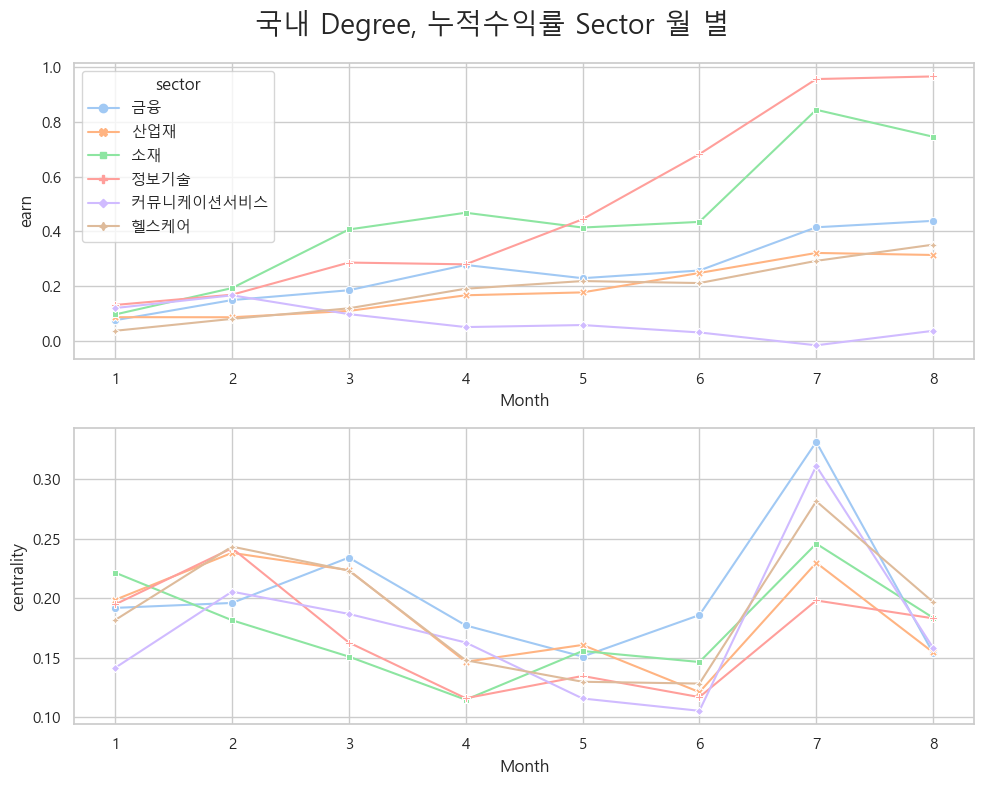

In [79]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('국내 Degree, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=degree_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

### 누적수익률, Closenese Sector 월별 시각화

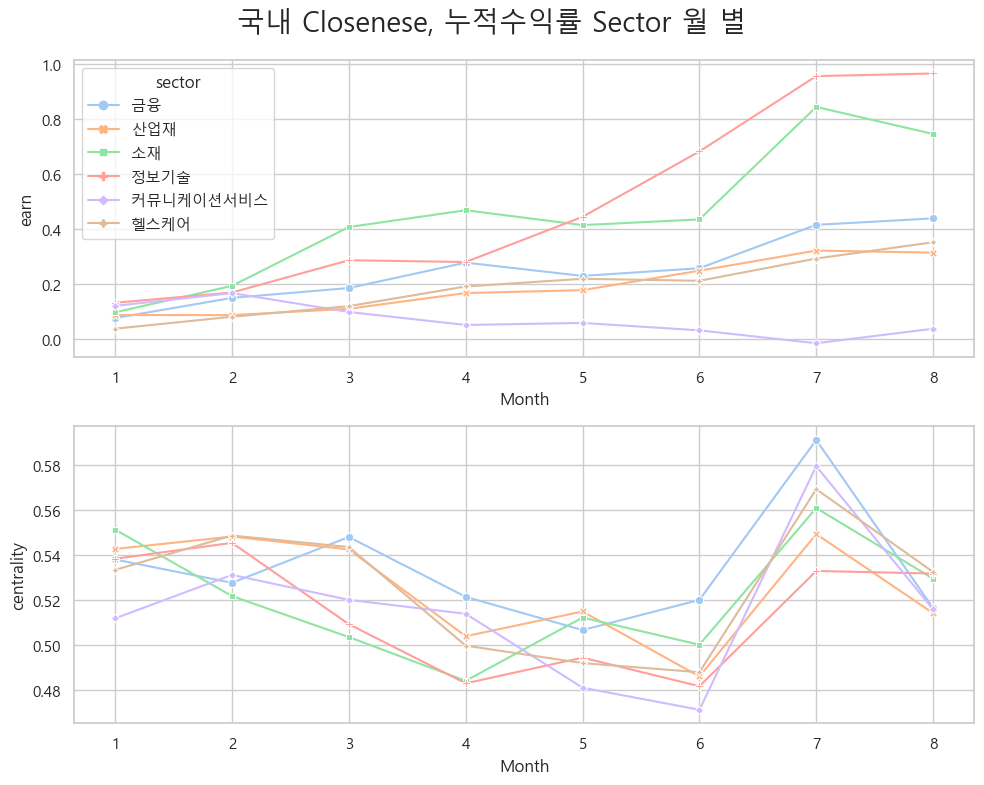

In [80]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('국내 Closenese, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=close_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

### 누적수익률, Beetweennese Sector 월별 시각화

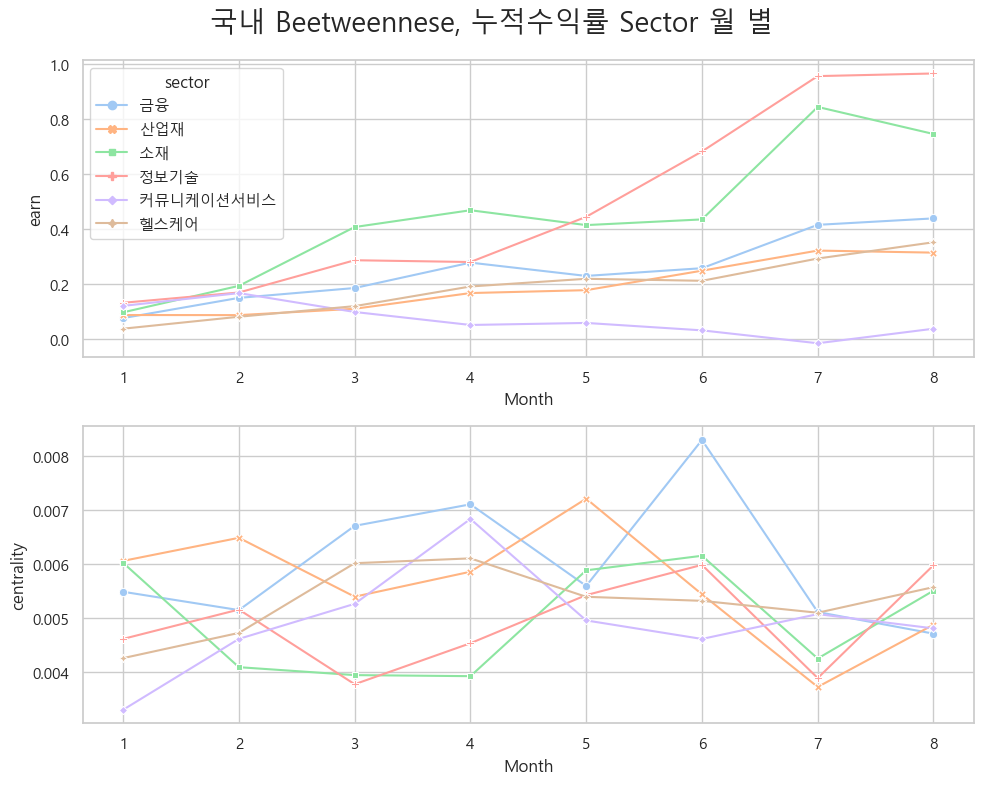

In [81]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('국내 Beetweennese, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=beet_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

### 누적수익률, Eigenvector Sector 월별 시각화

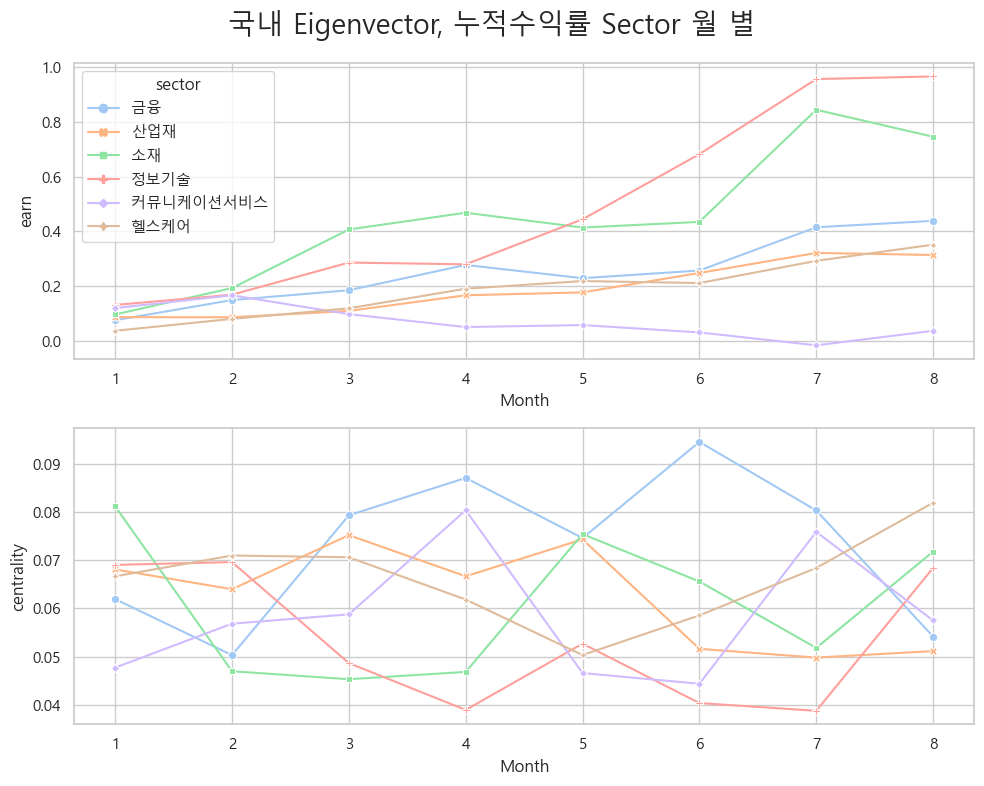

In [82]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('국내 Eigenvector, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=eigen_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

### 누적수익률, Pagerank Sector 월별 시각화

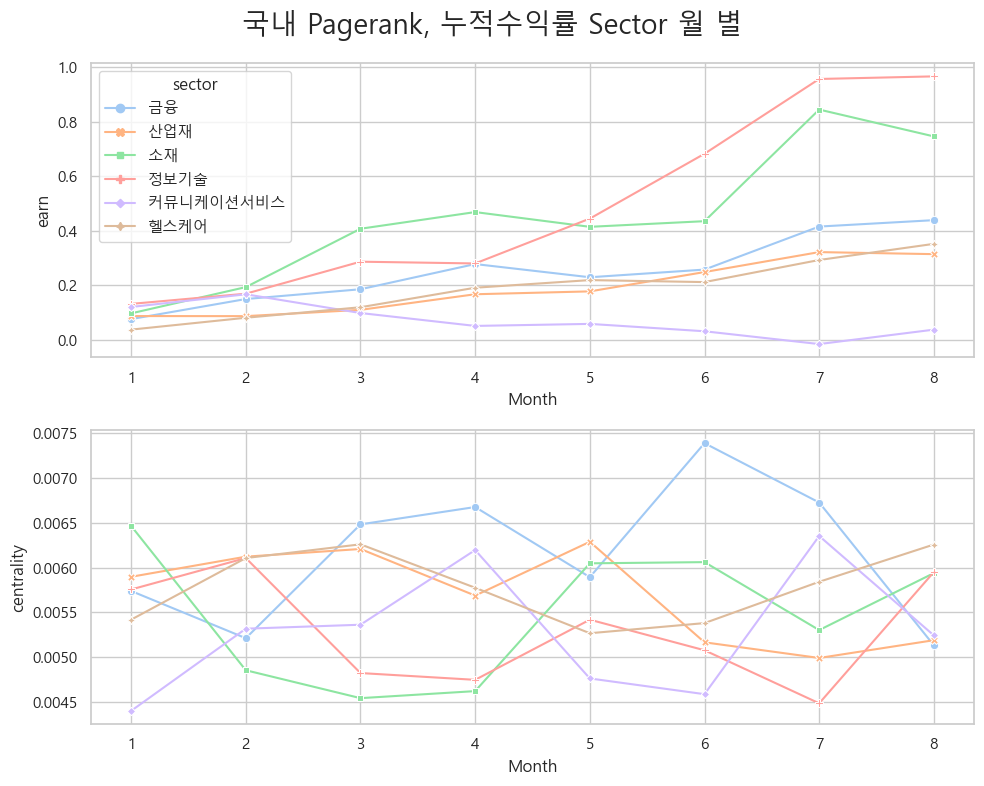

In [83]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('국내 Pagerank, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=pagerank_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

## 해외

In [84]:
ov_price_Jan = ov_price.loc['2023-01-03':'2023-01-31',:]
ov_price_Feb = ov_price.loc['2023-02-01':'2023-02-28',:]
ov_price_Mar = ov_price.loc['2023-03-01':'2023-03-31',:]
ov_price_Apr = ov_price.loc['2023-04-01':'2023-04-30',:]
ov_price_May = ov_price.loc['2023-05-01':'2023-05-31',:]
ov_price_Jun = ov_price.loc['2023-06-01':'2023-06-30',:]
ov_price_Jul = ov_price.loc['2023-07-01':'2023-07-31',:]
ov_price_Aug = ov_price.loc['2023-08-01':'2023-08-30',:]

## 네트워크 생성

In [85]:
Gx_Jan = generate_network(ov_price_Jan)
Gx_Feb = generate_network(ov_price_Feb)
Gx_Mar = generate_network(ov_price_Mar)
Gx_Apr = generate_network(ov_price_Apr)
Gx_May = generate_network(ov_price_May)
Gx_Jun = generate_network(ov_price_Jun)
Gx_Jul = generate_network(ov_price_Jul)
Gx_Aug = generate_network(ov_price_Aug)

10363 edges removed
10625 edges removed
8575 edges removed
11112 edges removed
12321 edges removed
12564 edges removed
13446 edges removed
12212 edges removed


## degree 월 별 중요도 데이터 생성

In [86]:
# 1월
degree_dict_Jan = nx.degree_centrality(Gx_Jan)
degree_df_Jan = pd.DataFrame.from_dict(degree_dict_Jan, orient = 'index', columns = ['centrality'])
degree_df_Jan.reset_index(inplace=True)
degree_df_Jan.columns = ['종목명','centrality']

degree_Jan = pd.merge(degree_df_Jan, ov_sec, how = 'left', on = '종목명')

degree_Jan_mean = degree_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Jan_mean.reset_index(inplace=True)
degree_Jan_mean.columns = ['sector','centrality']
degree_Jan_mean['Month'] = 1

# 2월
degree_dict_Feb = nx.degree_centrality(Gx_Feb)
degree_df_Feb = pd.DataFrame.from_dict(degree_dict_Feb, orient = 'index', columns = ['centrality'])
degree_df_Feb.reset_index(inplace=True)
degree_df_Feb.columns = ['종목명','centrality']

degree_Feb = pd.merge(degree_df_Feb, ov_sec, how = 'left', on = '종목명')

degree_Feb_mean = degree_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Feb_mean.reset_index(inplace=True)
degree_Feb_mean.columns = ['sector','centrality']
degree_Feb_mean['Month'] = 2

# 3월
degree_dict_Mar = nx.degree_centrality(Gx_Mar)
degree_df_Mar = pd.DataFrame.from_dict(degree_dict_Mar, orient = 'index', columns = ['centrality'])
degree_df_Mar.reset_index(inplace=True)
degree_df_Mar.columns = ['종목명','centrality']

degree_Mar = pd.merge(degree_df_Mar, ov_sec, how = 'left', on = '종목명')

degree_Mar_mean = degree_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Mar_mean.reset_index(inplace=True)
degree_Mar_mean.columns = ['sector','centrality']
degree_Mar_mean['Month'] = 3

# 4월
degree_dict_Apr = nx.degree_centrality(Gx_Apr)
degree_df_Apr = pd.DataFrame.from_dict(degree_dict_Apr, orient = 'index', columns = ['centrality'])
degree_df_Apr.reset_index(inplace=True)
degree_df_Apr.columns = ['종목명','centrality']

degree_Apr = pd.merge(degree_df_Apr, ov_sec, how = 'left', on = '종목명')

degree_Apr_mean = degree_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Apr_mean.reset_index(inplace=True)
degree_Apr_mean.columns = ['sector','centrality']
degree_Apr_mean['Month'] = 4

# 5월
degree_dict_May = nx.degree_centrality(Gx_May)
degree_df_May = pd.DataFrame.from_dict(degree_dict_May, orient = 'index', columns = ['centrality'])
degree_df_May.reset_index(inplace=True)
degree_df_May.columns = ['종목명','centrality']

degree_May = pd.merge(degree_df_May, ov_sec, how = 'left', on = '종목명')

degree_May_mean = degree_May.loc[:,['sector','centrality']].groupby('sector').mean()
degree_May_mean.reset_index(inplace=True)
degree_May_mean.columns = ['sector','centrality']
degree_May_mean['Month'] = 5

# 6월
degree_dict_Jun = nx.degree_centrality(Gx_Jun)
degree_df_Jun = pd.DataFrame.from_dict(degree_dict_Jun, orient = 'index', columns = ['centrality'])
degree_df_Jun.reset_index(inplace=True)
degree_df_Jun.columns = ['종목명','centrality']

degree_Jun = pd.merge(degree_df_Jun, ov_sec, how = 'left', on = '종목명')

degree_Jun_mean = degree_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Jun_mean.reset_index(inplace=True)
degree_Jun_mean.columns = ['sector','centrality']
degree_Jun_mean['Month'] = 6

# 7월
degree_dict_Jul = nx.degree_centrality(Gx_Jul)
degree_df_Jul = pd.DataFrame.from_dict(degree_dict_Jul, orient = 'index', columns = ['centrality'])
degree_df_Jul.reset_index(inplace=True)
degree_df_Jul.columns = ['종목명','centrality']

degree_Jul = pd.merge(degree_df_Jul, ov_sec, how = 'left', on = '종목명')

degree_Jul_mean = degree_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Jul_mean.reset_index(inplace=True)
degree_Jul_mean.columns = ['sector','centrality']
degree_Jul_mean['Month'] = 7

# 8월
degree_dict_Aug = nx.degree_centrality(Gx_Aug)
degree_df_Aug = pd.DataFrame.from_dict(degree_dict_Aug, orient = 'index', columns = ['centrality'])
degree_df_Aug.reset_index(inplace=True)
degree_df_Aug.columns = ['종목명','centrality']

degree_Aug = pd.merge(degree_df_Aug, ov_sec, how = 'left', on = '종목명')

degree_Aug_mean = degree_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
degree_Aug_mean.reset_index(inplace=True)
degree_Aug_mean.columns = ['sector','centrality']
degree_Aug_mean['Month'] = 8

In [87]:
degree_mean = pd.merge(degree_Jan_mean, degree_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_May_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
degree_mean = pd.merge(degree_mean, degree_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

## closeness 월 별 중요도 데이터 생성

In [88]:
# 1월
close_dict_Jan = nx.closeness_centrality(Gx_Jan)
close_df_Jan = pd.DataFrame.from_dict(close_dict_Jan, orient = 'index', columns = ['centrality'])
close_df_Jan.reset_index(inplace=True)
close_df_Jan.columns = ['종목명','centrality']

close_Jan = pd.merge(close_df_Jan, ov_sec, how = 'left', on = '종목명')

close_Jan_mean = close_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
close_Jan_mean.reset_index(inplace=True)
close_Jan_mean.columns = ['sector','centrality']
close_Jan_mean['Month'] = 1

# 2월
close_dict_Feb = nx.closeness_centrality(Gx_Feb)
close_df_Feb = pd.DataFrame.from_dict(close_dict_Feb, orient = 'index', columns = ['centrality'])
close_df_Feb.reset_index(inplace=True)
close_df_Feb.columns = ['종목명','centrality']

close_Feb = pd.merge(close_df_Feb, ov_sec, how = 'left', on = '종목명')

close_Feb_mean = close_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
close_Feb_mean.reset_index(inplace=True)
close_Feb_mean.columns = ['sector','centrality']
close_Feb_mean['Month'] = 2

# 3월
close_dict_Mar = nx.closeness_centrality(Gx_Mar)
close_df_Mar = pd.DataFrame.from_dict(close_dict_Mar, orient = 'index', columns = ['centrality'])
close_df_Mar.reset_index(inplace=True)
close_df_Mar.columns = ['종목명','centrality']

close_Mar = pd.merge(close_df_Mar, ov_sec, how = 'left', on = '종목명')

close_Mar_mean = close_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
close_Mar_mean.reset_index(inplace=True)
close_Mar_mean.columns = ['sector','centrality']
close_Mar_mean['Month'] = 3

# 4월
close_dict_Apr = nx.closeness_centrality(Gx_Apr)
close_df_Apr = pd.DataFrame.from_dict(close_dict_Apr, orient = 'index', columns = ['centrality'])
close_df_Apr.reset_index(inplace=True)
close_df_Apr.columns = ['종목명','centrality']

close_Apr = pd.merge(close_df_Apr, ov_sec, how = 'left', on = '종목명')

close_Apr_mean = close_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
close_Apr_mean.reset_index(inplace=True)
close_Apr_mean.columns = ['sector','centrality']
close_Apr_mean['Month'] = 4

# 5월
close_dict_May = nx.closeness_centrality(Gx_May)
close_df_May = pd.DataFrame.from_dict(close_dict_May, orient = 'index', columns = ['centrality'])
close_df_May.reset_index(inplace=True)
close_df_May.columns = ['종목명','centrality']

close_May = pd.merge(close_df_May, ov_sec, how = 'left', on = '종목명')

close_May_mean = close_May.loc[:,['sector','centrality']].groupby('sector').mean()
close_May_mean.reset_index(inplace=True)
close_May_mean.columns = ['sector','centrality']
close_May_mean['Month'] = 5

# 6월
close_dict_Jun = nx.closeness_centrality(Gx_Jun)
close_df_Jun = pd.DataFrame.from_dict(close_dict_Jun, orient = 'index', columns = ['centrality'])
close_df_Jun.reset_index(inplace=True)
close_df_Jun.columns = ['종목명','centrality']

close_Jun = pd.merge(close_df_Jun, ov_sec, how = 'left', on = '종목명')

close_Jun_mean = close_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
close_Jun_mean.reset_index(inplace=True)
close_Jun_mean.columns = ['sector','centrality']
close_Jun_mean['Month'] = 6

# 7월
close_dict_Jul = nx.closeness_centrality(Gx_Jul)
close_df_Jul = pd.DataFrame.from_dict(close_dict_Jul, orient = 'index', columns = ['centrality'])
close_df_Jul.reset_index(inplace=True)
close_df_Jul.columns = ['종목명','centrality']

close_Jul = pd.merge(close_df_Jul, ov_sec, how = 'left', on = '종목명')

close_Jul_mean = close_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
close_Jul_mean.reset_index(inplace=True)
close_Jul_mean.columns = ['sector','centrality']
close_Jul_mean['Month'] = 7

# 8월
close_dict_Aug = nx.closeness_centrality(Gx_Aug)
close_df_Aug = pd.DataFrame.from_dict(close_dict_Aug, orient = 'index', columns = ['centrality'])
close_df_Aug.reset_index(inplace=True)
close_df_Aug.columns = ['종목명','centrality']

close_Aug = pd.merge(close_df_Aug, ov_sec, how = 'left', on = '종목명')

close_Aug_mean = close_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
close_Aug_mean.reset_index(inplace=True)
close_Aug_mean.columns = ['sector','centrality']
close_Aug_mean['Month'] = 8

In [89]:
close_mean = pd.merge(close_Jan_mean, close_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_May_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
close_mean = pd.merge(close_mean, close_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

## beetweennese 월 별 중요도 데이터 생성

In [90]:
# 1월
beet_dict_Jan = nx.betweenness_centrality(Gx_Jan, normalized=True, endpoints=False, weight = 'weight')
beet_df_Jan = pd.DataFrame.from_dict(beet_dict_Jan, orient = 'index', columns = ['centrality'])
beet_df_Jan.reset_index(inplace=True)
beet_df_Jan.columns = ['종목명','centrality']

beet_Jan = pd.merge(beet_df_Jan, ov_sec, how = 'left', on = '종목명')

beet_Jan_mean = beet_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Jan_mean.reset_index(inplace=True)
beet_Jan_mean.columns = ['sector','centrality']
beet_Jan_mean['Month'] = 1

# 2월
beet_dict_Feb = nx.betweenness_centrality(Gx_Feb, normalized=True, endpoints=False, weight = 'weight')
beet_df_Feb = pd.DataFrame.from_dict(beet_dict_Feb, orient = 'index', columns = ['centrality'])
beet_df_Feb.reset_index(inplace=True)
beet_df_Feb.columns = ['종목명','centrality']

beet_Feb = pd.merge(beet_df_Feb, ov_sec, how = 'left', on = '종목명')

beet_Feb_mean = beet_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Feb_mean.reset_index(inplace=True)
beet_Feb_mean.columns = ['sector','centrality']
beet_Feb_mean['Month'] = 2

# 3월
beet_dict_Mar = nx.betweenness_centrality(Gx_Mar, normalized=True, endpoints=False, weight = 'weight')
beet_df_Mar = pd.DataFrame.from_dict(beet_dict_Mar, orient = 'index', columns = ['centrality'])
beet_df_Mar.reset_index(inplace=True)
beet_df_Mar.columns = ['종목명','centrality']

beet_Mar = pd.merge(beet_df_Mar, ov_sec, how = 'left', on = '종목명')

beet_Mar_mean = beet_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Mar_mean.reset_index(inplace=True)
beet_Mar_mean.columns = ['sector','centrality']
beet_Mar_mean['Month'] = 3

# 4월
beet_dict_Apr = nx.betweenness_centrality(Gx_Apr, normalized=True, endpoints=False, weight = 'weight')
beet_df_Apr = pd.DataFrame.from_dict(beet_dict_Apr, orient = 'index', columns = ['centrality'])
beet_df_Apr.reset_index(inplace=True)
beet_df_Apr.columns = ['종목명','centrality']

beet_Apr = pd.merge(beet_df_Apr, ov_sec, how = 'left', on = '종목명')

beet_Apr_mean = beet_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Apr_mean.reset_index(inplace=True)
beet_Apr_mean.columns = ['sector','centrality']
beet_Apr_mean['Month'] = 4

# 5월
beet_dict_May = nx.betweenness_centrality(Gx_May, normalized=True, endpoints=False, weight = 'weight')
beet_df_May = pd.DataFrame.from_dict(beet_dict_May, orient = 'index', columns = ['centrality'])
beet_df_May.reset_index(inplace=True)
beet_df_May.columns = ['종목명','centrality']

beet_May = pd.merge(beet_df_May, ov_sec, how = 'left', on = '종목명')

beet_May_mean = beet_May.loc[:,['sector','centrality']].groupby('sector').mean()
beet_May_mean.reset_index(inplace=True)
beet_May_mean.columns = ['sector','centrality']
beet_May_mean['Month'] = 5

# 6월
beet_dict_Jun = nx.betweenness_centrality(Gx_Jun, normalized=True, endpoints=False, weight = 'weight')
beet_df_Jun = pd.DataFrame.from_dict(beet_dict_Jun, orient = 'index', columns = ['centrality'])
beet_df_Jun.reset_index(inplace=True)
beet_df_Jun.columns = ['종목명','centrality']

beet_Jun = pd.merge(beet_df_Jun, ov_sec, how = 'left', on = '종목명')

beet_Jun_mean = beet_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Jun_mean.reset_index(inplace=True)
beet_Jun_mean.columns = ['sector','centrality']
beet_Jun_mean['Month'] = 6

# 7월
beet_dict_Jul = nx.betweenness_centrality(Gx_Jul, normalized=True, endpoints=False, weight = 'weight')
beet_df_Jul = pd.DataFrame.from_dict(beet_dict_Jul, orient = 'index', columns = ['centrality'])
beet_df_Jul.reset_index(inplace=True)
beet_df_Jul.columns = ['종목명','centrality']

beet_Jul = pd.merge(beet_df_Jul, ov_sec, how = 'left', on = '종목명')

beet_Jul_mean = beet_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Jul_mean.reset_index(inplace=True)
beet_Jul_mean.columns = ['sector','centrality']
beet_Jul_mean['Month'] = 7

# 8월
beet_dict_Aug = nx.betweenness_centrality(Gx_Aug, normalized=True, endpoints=False, weight = 'weight')
beet_df_Aug = pd.DataFrame.from_dict(beet_dict_Aug, orient = 'index', columns = ['centrality'])
beet_df_Aug.reset_index(inplace=True)
beet_df_Aug.columns = ['종목명','centrality']

beet_Aug = pd.merge(beet_df_Aug, ov_sec, how = 'left', on = '종목명')

beet_Aug_mean = beet_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
beet_Aug_mean.reset_index(inplace=True)
beet_Aug_mean.columns = ['sector','centrality']
beet_Aug_mean['Month'] = 8

In [91]:
beet_mean = pd.merge(beet_Jan_mean, beet_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_May_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
beet_mean = pd.merge(beet_mean, beet_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

## eigenvector 월 별 중요도 데이터 생성

In [92]:
# 1월
eigen_dict_Jan = nx.eigenvector_centrality(Gx_Jan, weight = 'weight')
eigen_df_Jan = pd.DataFrame.from_dict(eigen_dict_Jan, orient = 'index', columns = ['centrality'])
eigen_df_Jan.reset_index(inplace=True)
eigen_df_Jan.columns = ['종목명','centrality']

eigen_Jan = pd.merge(eigen_df_Jan, ov_sec, how = 'left', on = '종목명')

eigen_Jan_mean = eigen_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Jan_mean.reset_index(inplace=True)
eigen_Jan_mean.columns = ['sector','centrality']
eigen_Jan_mean['Month'] = 1

# 2월
eigen_dict_Feb = nx.eigenvector_centrality(Gx_Feb, weight = 'weight')
eigen_df_Feb = pd.DataFrame.from_dict(eigen_dict_Feb, orient = 'index', columns = ['centrality'])
eigen_df_Feb.reset_index(inplace=True)
eigen_df_Feb.columns = ['종목명','centrality']

eigen_Feb = pd.merge(eigen_df_Feb, ov_sec, how = 'left', on = '종목명')

eigen_Feb_mean = eigen_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Feb_mean.reset_index(inplace=True)
eigen_Feb_mean.columns = ['sector','centrality']
eigen_Feb_mean['Month'] = 2

# 3월
eigen_dict_Mar = nx.eigenvector_centrality(Gx_Mar, weight = 'weight')
eigen_df_Mar = pd.DataFrame.from_dict(eigen_dict_Mar, orient = 'index', columns = ['centrality'])
eigen_df_Mar.reset_index(inplace=True)
eigen_df_Mar.columns = ['종목명','centrality']

eigen_Mar = pd.merge(eigen_df_Mar, ov_sec, how = 'left', on = '종목명')

eigen_Mar_mean = eigen_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Mar_mean.reset_index(inplace=True)
eigen_Mar_mean.columns = ['sector','centrality']
eigen_Mar_mean['Month'] = 3

# 4월
eigen_dict_Apr = nx.eigenvector_centrality(Gx_Apr, weight = 'weight')
eigen_df_Apr = pd.DataFrame.from_dict(eigen_dict_Apr, orient = 'index', columns = ['centrality'])
eigen_df_Apr.reset_index(inplace=True)
eigen_df_Apr.columns = ['종목명','centrality']

eigen_Apr = pd.merge(eigen_df_Apr, ov_sec, how = 'left', on = '종목명')

eigen_Apr_mean = eigen_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Apr_mean.reset_index(inplace=True)
eigen_Apr_mean.columns = ['sector','centrality']
eigen_Apr_mean['Month'] = 4

# 5월
eigen_dict_May = nx.eigenvector_centrality(Gx_May, weight = 'weight')
eigen_df_May = pd.DataFrame.from_dict(eigen_dict_May, orient = 'index', columns = ['centrality'])
eigen_df_May.reset_index(inplace=True)
eigen_df_May.columns = ['종목명','centrality']

eigen_May = pd.merge(eigen_df_May, ov_sec, how = 'left', on = '종목명')

eigen_May_mean = eigen_May.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_May_mean.reset_index(inplace=True)
eigen_May_mean.columns = ['sector','centrality']
eigen_May_mean['Month'] = 5

# 6월
eigen_dict_Jun = nx.eigenvector_centrality(Gx_Jun, weight = 'weight')
eigen_df_Jun = pd.DataFrame.from_dict(eigen_dict_Jun, orient = 'index', columns = ['centrality'])
eigen_df_Jun.reset_index(inplace=True)
eigen_df_Jun.columns = ['종목명','centrality']

eigen_Jun = pd.merge(eigen_df_Jun, ov_sec, how = 'left', on = '종목명')

eigen_Jun_mean = eigen_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Jun_mean.reset_index(inplace=True)
eigen_Jun_mean.columns = ['sector','centrality']
eigen_Jun_mean['Month'] = 6

# 7월
eigen_dict_Jul = nx.eigenvector_centrality(Gx_Jul, weight = 'weight')
eigen_df_Jul = pd.DataFrame.from_dict(eigen_dict_Jul, orient = 'index', columns = ['centrality'])
eigen_df_Jul.reset_index(inplace=True)
eigen_df_Jul.columns = ['종목명','centrality']

eigen_Jul = pd.merge(eigen_df_Jul, ov_sec, how = 'left', on = '종목명')

eigen_Jul_mean = eigen_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Jul_mean.reset_index(inplace=True)
eigen_Jul_mean.columns = ['sector','centrality']
eigen_Jul_mean['Month'] = 7

# 8월
eigen_dict_Aug = nx.eigenvector_centrality(Gx_Aug, weight = 'weight')
eigen_df_Aug = pd.DataFrame.from_dict(eigen_dict_Aug, orient = 'index', columns = ['centrality'])
eigen_df_Aug.reset_index(inplace=True)
eigen_df_Aug.columns = ['종목명','centrality']

eigen_Aug = pd.merge(eigen_df_Aug, ov_sec, how = 'left', on = '종목명')

eigen_Aug_mean = eigen_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
eigen_Aug_mean.reset_index(inplace=True)
eigen_Aug_mean.columns = ['sector','centrality']
eigen_Aug_mean['Month'] = 8

In [93]:
eigen_mean = pd.merge(eigen_Jan_mean, eigen_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_May_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
eigen_mean = pd.merge(eigen_mean, eigen_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

## pagerank 월 별 중요도 데이터 생성

In [94]:
# 1월
pagerank_dict_Jan = nx.pagerank(Gx_Jan, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Jan = pd.DataFrame.from_dict(pagerank_dict_Jan, orient = 'index', columns = ['centrality'])
pagerank_df_Jan.reset_index(inplace=True)
pagerank_df_Jan.columns = ['종목명','centrality']

pagerank_Jan = pd.merge(pagerank_df_Jan, ov_sec, how = 'left', on = '종목명')

pagerank_Jan_mean = pagerank_Jan.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Jan_mean.reset_index(inplace=True)
pagerank_Jan_mean.columns = ['sector','centrality']
pagerank_Jan_mean['Month'] = 1

# 2월
pagerank_dict_Feb = nx.pagerank(Gx_Feb, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Feb = pd.DataFrame.from_dict(pagerank_dict_Feb, orient = 'index', columns = ['centrality'])
pagerank_df_Feb.reset_index(inplace=True)
pagerank_df_Feb.columns = ['종목명','centrality']

pagerank_Feb = pd.merge(pagerank_df_Feb, ov_sec, how = 'left', on = '종목명')

pagerank_Feb_mean = pagerank_Feb.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Feb_mean.reset_index(inplace=True)
pagerank_Feb_mean.columns = ['sector','centrality']
pagerank_Feb_mean['Month'] = 2

# 3월
pagerank_dict_Mar = nx.pagerank(Gx_Mar, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Mar = pd.DataFrame.from_dict(pagerank_dict_Mar, orient = 'index', columns = ['centrality'])
pagerank_df_Mar.reset_index(inplace=True)
pagerank_df_Mar.columns = ['종목명','centrality']

pagerank_Mar = pd.merge(pagerank_df_Mar, ov_sec, how = 'left', on = '종목명')

pagerank_Mar_mean = pagerank_Mar.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Mar_mean.reset_index(inplace=True)
pagerank_Mar_mean.columns = ['sector','centrality']
pagerank_Mar_mean['Month'] = 3

# 4월
pagerank_dict_Apr = nx.pagerank(Gx_Apr, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Apr = pd.DataFrame.from_dict(pagerank_dict_Apr, orient = 'index', columns = ['centrality'])
pagerank_df_Apr.reset_index(inplace=True)
pagerank_df_Apr.columns = ['종목명','centrality']

pagerank_Apr = pd.merge(pagerank_df_Apr, ov_sec, how = 'left', on = '종목명')

pagerank_Apr_mean = pagerank_Apr.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Apr_mean.reset_index(inplace=True)
pagerank_Apr_mean.columns = ['sector','centrality']
pagerank_Apr_mean['Month'] = 4

# 5월
pagerank_dict_May = nx.pagerank(Gx_May, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_May = pd.DataFrame.from_dict(pagerank_dict_May, orient = 'index', columns = ['centrality'])
pagerank_df_May.reset_index(inplace=True)
pagerank_df_May.columns = ['종목명','centrality']

pagerank_May = pd.merge(pagerank_df_May, ov_sec, how = 'left', on = '종목명')

pagerank_May_mean = pagerank_May.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_May_mean.reset_index(inplace=True)
pagerank_May_mean.columns = ['sector','centrality']
pagerank_May_mean['Month'] = 5

# 6월
pagerank_dict_Jun = nx.pagerank(Gx_Jun, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Jun = pd.DataFrame.from_dict(pagerank_dict_Jun, orient = 'index', columns = ['centrality'])
pagerank_df_Jun.reset_index(inplace=True)
pagerank_df_Jun.columns = ['종목명','centrality']

pagerank_Jun = pd.merge(pagerank_df_Jun, ov_sec, how = 'left', on = '종목명')

pagerank_Jun_mean = pagerank_Jun.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Jun_mean.reset_index(inplace=True)
pagerank_Jun_mean.columns = ['sector','centrality']
pagerank_Jun_mean['Month'] = 6

# 7월
pagerank_dict_Jul = nx.pagerank(Gx_Jul, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Jul = pd.DataFrame.from_dict(pagerank_dict_Jul, orient = 'index', columns = ['centrality'])
pagerank_df_Jul.reset_index(inplace=True)
pagerank_df_Jul.columns = ['종목명','centrality']

pagerank_Jul = pd.merge(pagerank_df_Jul, ov_sec, how = 'left', on = '종목명')

pagerank_Jul_mean = pagerank_Jul.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Jul_mean.reset_index(inplace=True)
pagerank_Jul_mean.columns = ['sector','centrality']
pagerank_Jul_mean['Month'] = 7

# 8월
pagerank_dict_Aug = nx.pagerank(Gx_Aug, alpha = .9, max_iter = 100, weight = 'weight')
pagerank_df_Aug = pd.DataFrame.from_dict(pagerank_dict_Aug, orient = 'index', columns = ['centrality'])
pagerank_df_Aug.reset_index(inplace=True)
pagerank_df_Aug.columns = ['종목명','centrality']

pagerank_Aug = pd.merge(pagerank_df_Aug, ov_sec, how = 'left', on = '종목명')

pagerank_Aug_mean = pagerank_Aug.loc[:,['sector','centrality']].groupby('sector').mean()
pagerank_Aug_mean.reset_index(inplace=True)
pagerank_Aug_mean.columns = ['sector','centrality']
pagerank_Aug_mean['Month'] = 8

In [95]:
pagerank_mean = pd.merge(pagerank_Jan_mean, pagerank_Feb_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Mar_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Apr_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_May_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Jun_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Jul_mean, how = 'outer', on = ['sector','Month','centrality'])
pagerank_mean = pd.merge(pagerank_mean, pagerank_Aug_mean, how = 'outer', on = ['sector','Month','centrality'])

## 월 별 누적수익률 데이터 생성

In [96]:
ov_sec.columns = ['종목','sector']

# 1월
earn_Jan = ov_earn.loc[:,['종목','Jan']]
earn_Jan.columns = ['종목','earn']
rate_Jan = pd.merge(earn_Jan, ov_sec, how = 'left', on = '종목')

rate_Jan_mean = rate_Jan.loc[:,['sector','earn']].groupby('sector').mean()
rate_Jan_mean.reset_index(inplace = True)
rate_Jan_mean['Month'] = 1

# 2월
earn_Feb = ov_earn.loc[:,['종목','Feb']]
earn_Feb.columns = ['종목','earn']
rate_Feb = pd.merge(earn_Feb, ov_sec, how = 'left', on = '종목')

rate_Feb_mean = rate_Feb.loc[:,['sector','earn']].groupby('sector').mean()
rate_Feb_mean.reset_index(inplace = True)
rate_Feb_mean['Month'] = 2

# 3월
earn_Mar = ov_earn.loc[:,['종목','Mar']]
earn_Mar.columns = ['종목','earn']
rate_Mar = pd.merge(earn_Mar, ov_sec, how = 'left', on = '종목')

rate_Mar_mean = rate_Mar.loc[:,['sector','earn']].groupby('sector').mean()
rate_Mar_mean.reset_index(inplace = True)
rate_Mar_mean['Month'] = 3

# 4월
earn_Apr = ov_earn.loc[:,['종목','Apr']]
earn_Apr.columns = ['종목','earn']
rate_Apr = pd.merge(earn_Apr, ov_sec, how = 'left', on = '종목')

rate_Apr_mean = rate_Apr.loc[:,['sector','earn']].groupby('sector').mean()
rate_Apr_mean.reset_index(inplace = True)
rate_Apr_mean['Month'] = 4

# 5월
earn_May = ov_earn.loc[:,['종목','May']]
earn_May.columns = ['종목','earn']
rate_May = pd.merge(earn_May, ov_sec, how = 'left', on = '종목')

rate_May_mean = rate_May.loc[:,['sector','earn']].groupby('sector').mean()
rate_May_mean.reset_index(inplace = True)
rate_May_mean['Month'] = 5

# 6월
earn_Jun = ov_earn.loc[:,['종목','Jun']]
earn_Jun.columns = ['종목','earn']
rate_Jun = pd.merge(earn_Jun, ov_sec, how = 'left', on = '종목')

rate_Jun_mean = rate_Jun.loc[:,['sector','earn']].groupby('sector').mean()
rate_Jun_mean.reset_index(inplace = True)
rate_Jun_mean['Month'] = 6

# 7월
earn_Jul = ov_earn.loc[:,['종목','Jul']]
earn_Jul.columns = ['종목','earn']
rate_Jul = pd.merge(earn_Jul, ov_sec, how = 'left', on = '종목')

rate_Jul_mean = rate_Jul.loc[:,['sector','earn']].groupby('sector').mean()
rate_Jul_mean.reset_index(inplace = True)
rate_Jul_mean['Month'] = 7

# 8월
earn_Aug = ov_earn.loc[:,['종목','Aug']]
earn_Aug.columns = ['종목','earn']
rate_Aug = pd.merge(earn_Aug, ov_sec, how = 'left', on = '종목')

rate_Aug_mean = rate_Aug.loc[:,['sector','earn']].groupby('sector').mean()
rate_Aug_mean.reset_index(inplace = True)
rate_Aug_mean['Month'] = 8

In [97]:
rate_mean = pd.merge(rate_Jan_mean, rate_Feb_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Mar_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Apr_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_May_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Jun_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Jul_mean, how = 'outer', on = ['sector','Month','earn'])
rate_mean = pd.merge(rate_mean, rate_Aug_mean, how = 'outer', on = ['sector','Month','earn'])

## 누적수익률, Degree Sector 월별 시각화

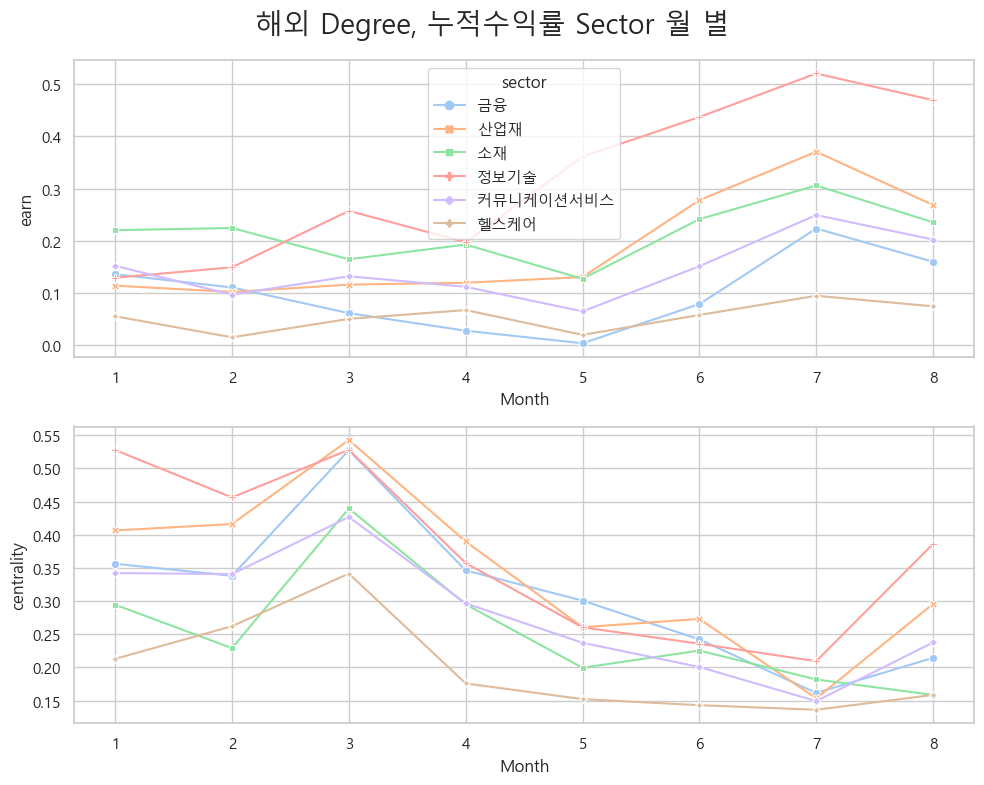

In [98]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('해외 Degree, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=degree_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

## 누적수익률, Closenese Sector 월별 시각화

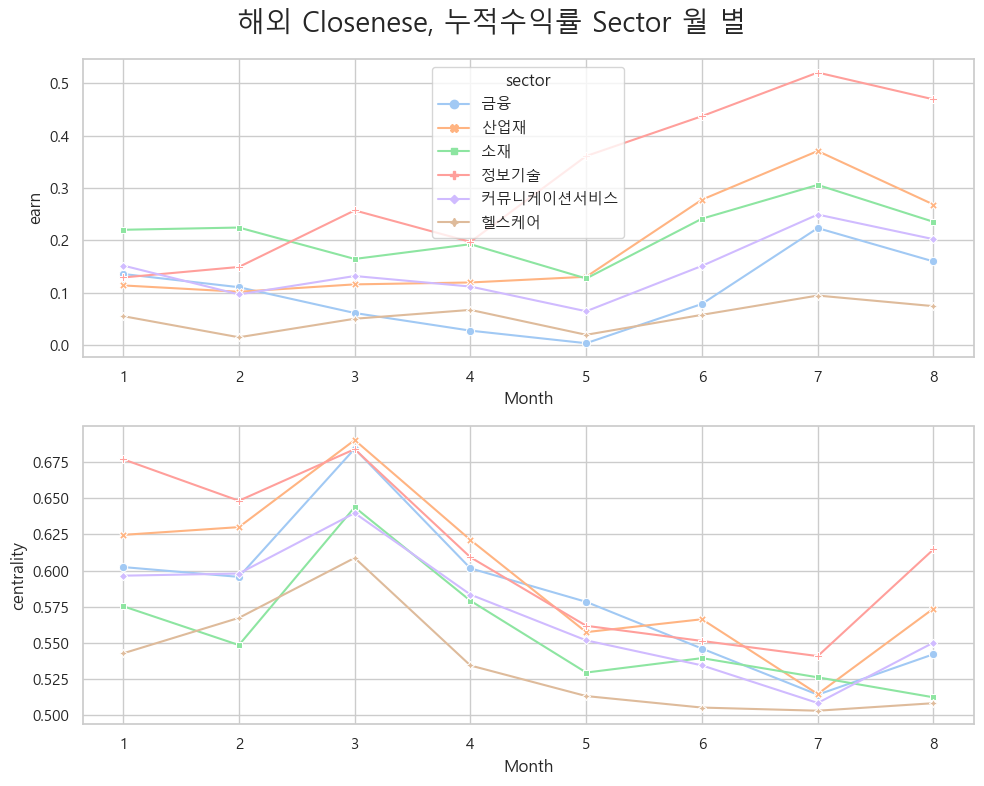

In [99]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('해외 Closenese, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=close_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

## 누적수익률, Beetweennese Sector 월별 시각화

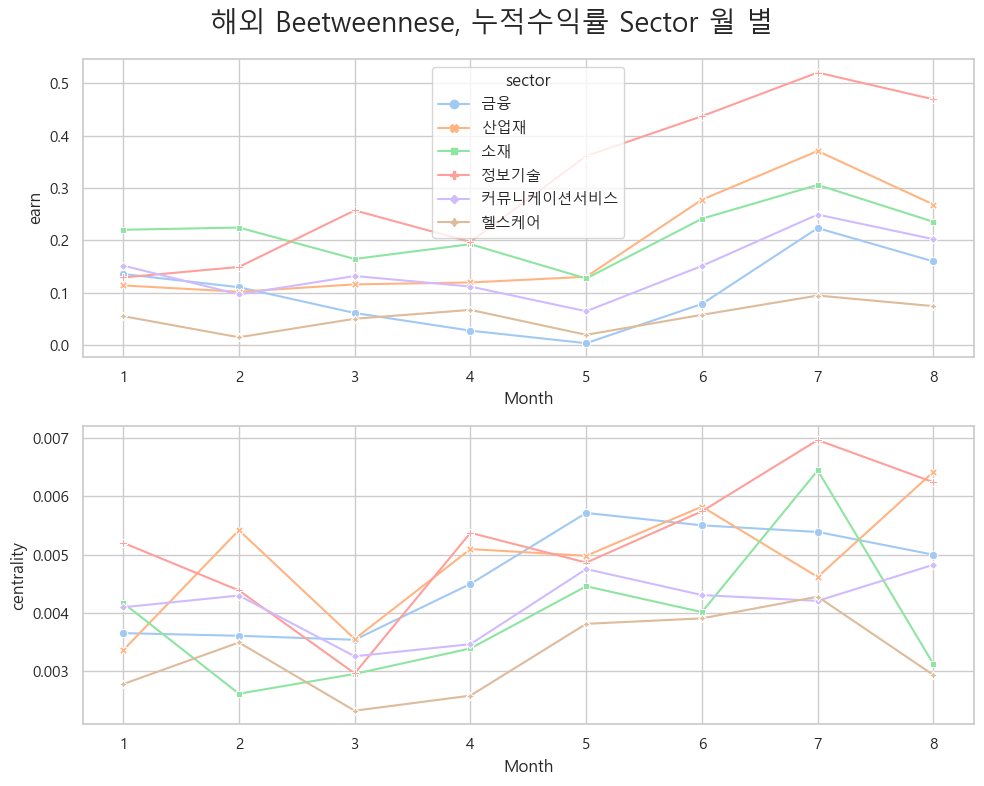

In [100]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('해외 Beetweennese, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=beet_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

## 누적수익률, Eigenvector Sector 월별 시각화

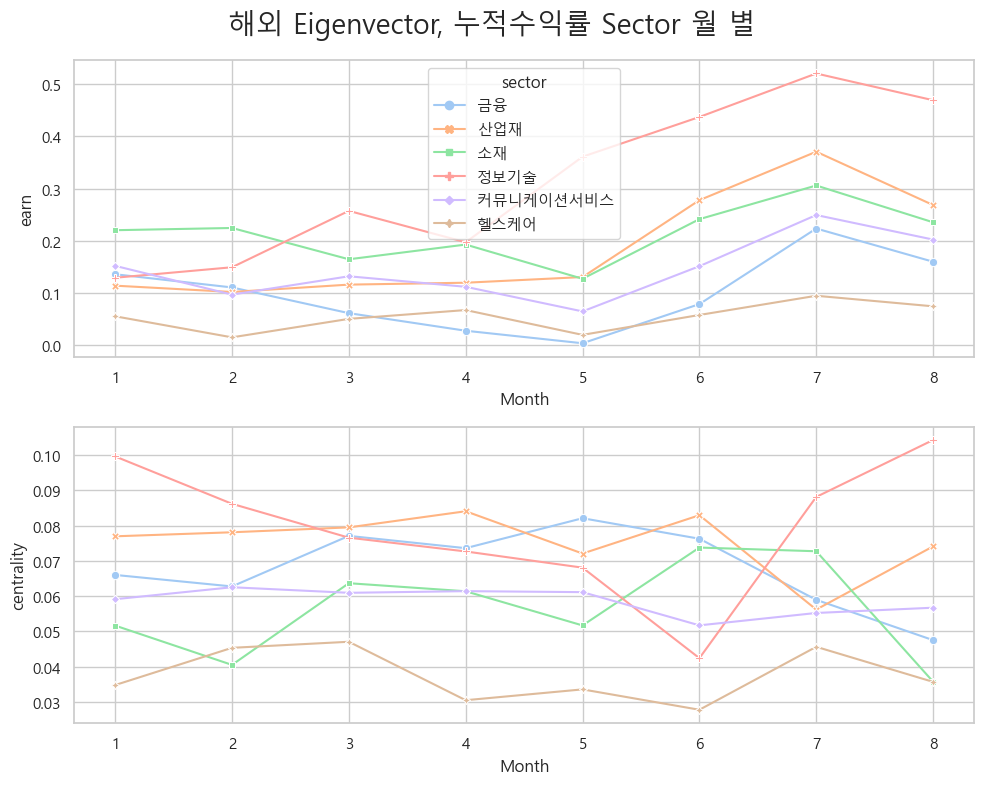

In [101]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('해외 Eigenvector, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=eigen_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

## 누적수익률, Pagerank Sector 월별 시각화

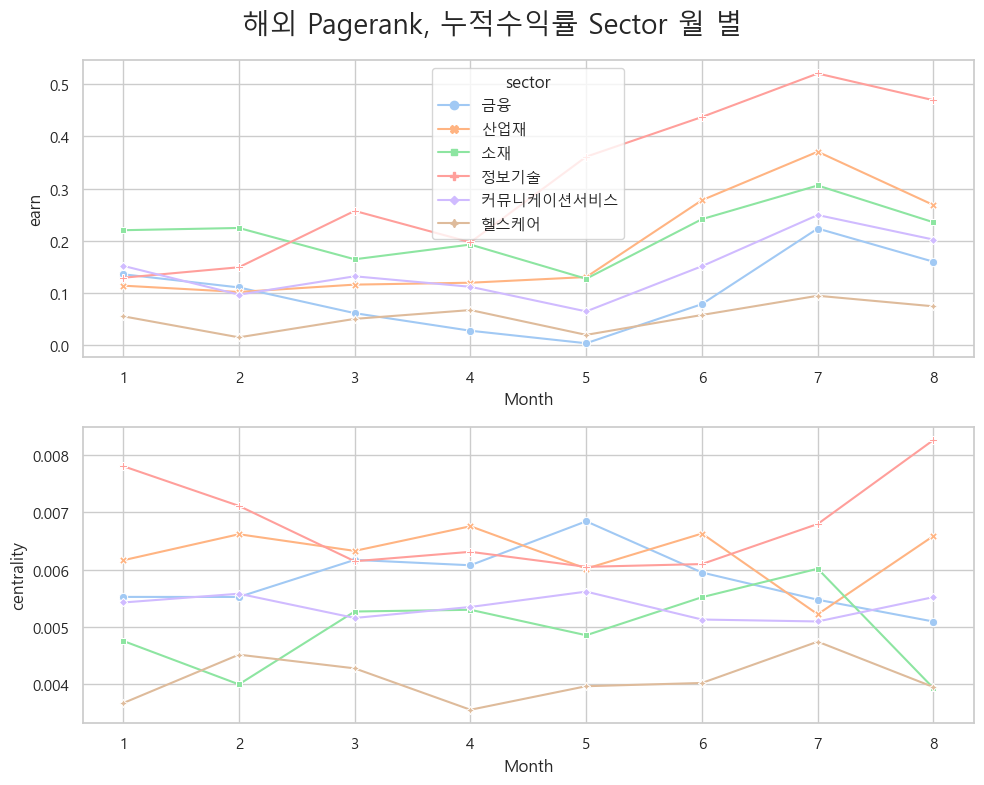

In [102]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


fig, axes= plt.subplots(nrows = 2, ncols=1, figsize=(10, 8))
fig.suptitle('해외 Pagerank, 누적수익률 Sector 월 별', size = 20)

sns.lineplot(data=rate_mean, x='Month', y='earn', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[0])


sns.lineplot(data=pagerank_mean, x='Month', y='centrality', 
             hue='sector', alpha=1, palette="pastel", 
             markers=True, style="sector", marker = True, dashes = False, 
             ax = axes[1], legend = False)

plt.tight_layout()

**국내, 해외 모두 누적 수익률과 직관적으로 어떠한 관계인지 살펴보기는 어려움**

**순서의 경우 어느정도 수익률과 관계가 있는 것처럼 보이기도 하나 시계열 모델 등을 활용하면 관계 파악 가능할 것으로 판단**


# 월 별 누적 수익률 변화 파악

- 1월 1일을 기준으로 월말 누적 수익률을 산출하여 월 별 변화 파악
- 산업 별로 움직이는지 산업 간 영향은 어떠한지 시각적으로 파악할 수 있을 것

## 국내

In [103]:
kr_earn = kr_earn.iloc[:,[0] + list(range(9,17))]

### 국내 월별 누적수익률 분류 리스트 생성

In [104]:
#Jan
kr_earn_Jan = kr_earn.loc[:,['종목','Jan_earning']]

Jan_kr_High = kr_earn_Jan[kr_earn_Jan['Jan_earning']=='High']['종목'].to_list()
Jan_kr_Middle = kr_earn_Jan[kr_earn_Jan['Jan_earning']=='middle']['종목'].to_list()
Jan_kr_Low = kr_earn_Jan[kr_earn_Jan['Jan_earning']=='Low']['종목'].to_list()

#Feb
kr_earn_Feb = kr_earn.loc[:,['종목','Feb_earning']]

Feb_kr_High = kr_earn_Feb[kr_earn_Feb['Feb_earning']=='High']['종목'].to_list()
Feb_kr_Middle = kr_earn_Feb[kr_earn_Feb['Feb_earning']=='middle']['종목'].to_list()
Feb_kr_Low = kr_earn_Feb[kr_earn_Feb['Feb_earning']=='Low']['종목'].to_list()

#Mar
kr_earn_Mar = kr_earn.loc[:,['종목','Mar_earning']]

Mar_kr_High = kr_earn_Mar[kr_earn_Mar['Mar_earning']=='High']['종목'].to_list()
Mar_kr_Middle = kr_earn_Mar[kr_earn_Mar['Mar_earning']=='middle']['종목'].to_list()
Mar_kr_Low = kr_earn_Mar[kr_earn_Mar['Mar_earning']=='Low']['종목'].to_list()

#Apr
kr_earn_Apr = kr_earn.loc[:,['종목','Apr_earning']]

Apr_kr_High = kr_earn_Apr[kr_earn_Apr['Apr_earning']=='High']['종목'].to_list()
Apr_kr_Middle = kr_earn_Apr[kr_earn_Apr['Apr_earning']=='middle']['종목'].to_list()
Apr_kr_Low = kr_earn_Apr[kr_earn_Apr['Apr_earning']=='Low']['종목'].to_list()

#May
kr_earn_May = kr_earn.loc[:,['종목','May_earning']]

May_kr_High = kr_earn_May[kr_earn_May['May_earning']=='High']['종목'].to_list()
May_kr_Middle = kr_earn_May[kr_earn_May['May_earning']=='middle']['종목'].to_list()
May_kr_Low = kr_earn_May[kr_earn_May['May_earning']=='Low']['종목'].to_list()

#Jun
kr_earn_Jun = kr_earn.loc[:,['종목','Jun_earning']]

Jun_kr_High = kr_earn_Jun[kr_earn_Jun['Jun_earning']=='High']['종목'].to_list()
Jun_kr_Middle = kr_earn_Jun[kr_earn_Jun['Jun_earning']=='middle']['종목'].to_list()
Jun_kr_Low = kr_earn_Jun[kr_earn_Jun['Jun_earning']=='Low']['종목'].to_list()

#Jul
kr_earn_Jul = kr_earn.loc[:,['종목','Jul_earning']]

Jul_kr_High = kr_earn_Jul[kr_earn_Jul['Jul_earning']=='High']['종목'].to_list()
Jul_kr_Middle = kr_earn_Jul[kr_earn_Jul['Jul_earning']=='middle']['종목'].to_list()
Jul_kr_Low = kr_earn_Jul[kr_earn_Jul['Jul_earning']=='Low']['종목'].to_list()

#Aug
kr_earn_Aug = kr_earn.loc[:,['종목','Aug_earning']]

Aug_kr_High = kr_earn_Aug[kr_earn_Aug['Aug_earning']=='High']['종목'].to_list()
Aug_kr_Middle = kr_earn_Aug[kr_earn_Aug['Aug_earning']=='middle']['종목'].to_list()
Aug_kr_Low = kr_earn_Aug[kr_earn_Aug['Aug_earning']=='Low']['종목'].to_list()

In [105]:
Gx = generate_network(kr_price)

15273 edges removed


In [106]:
#노드 사이즈 지정
degree_dict = dict(nx.degree(Gx))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx.add_node(stock_list[i], size = nsize[i]*1.1)

## 1월

In [107]:
Gx.add_nodes_from(Jan_kr_High, color = 'blue')
Gx.add_nodes_from(Jan_kr_Middle, color = 'white')
Gx.add_nodes_from(Jan_kr_Low, color = 'red')


net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Jan_kr.html')

All_Sector_MonthlyRate_Jan_kr.html


## 2월

In [108]:
Gx.add_nodes_from(Feb_kr_High, color = 'blue')
Gx.add_nodes_from(Feb_kr_Middle, color = 'white')
Gx.add_nodes_from(Feb_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Feb_kr.html')

All_Sector_MonthlyRate_Feb_kr.html


## 3월

In [109]:
Gx.add_nodes_from(Mar_kr_High, color = 'blue')
Gx.add_nodes_from(Mar_kr_Middle, color = 'white')
Gx.add_nodes_from(Mar_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Mar_kr.html')

All_Sector_MonthlyRate_Mar_kr.html


## 4월

In [110]:
Gx.add_nodes_from(Apr_kr_High, color = 'blue')
Gx.add_nodes_from(Apr_kr_Middle, color = 'white')
Gx.add_nodes_from(Apr_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Apr_kr.html')

All_Sector_MonthlyRate_Apr_kr.html


## 5월

In [111]:
Gx.add_nodes_from(May_kr_High, color = 'blue')
Gx.add_nodes_from(May_kr_Middle, color = 'white')
Gx.add_nodes_from(May_kr_Low, color = 'red')


net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_May_kr.html')

All_Sector_MonthlyRate_May_kr.html


## 6월

In [112]:
Gx.add_nodes_from(Jun_kr_High, color = 'blue')
Gx.add_nodes_from(Jun_kr_Middle, color = 'white')
Gx.add_nodes_from(Jun_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Jun_kr.html')

All_Sector_MonthlyRate_Jun_kr.html


## 7월

In [113]:
Gx.add_nodes_from(Jul_kr_High, color = 'blue')
Gx.add_nodes_from(Jul_kr_Middle, color = 'white')
Gx.add_nodes_from(Jul_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Jul_kr.html')

All_Sector_MonthlyRate_Jul_kr.html


## 8월

In [114]:
Gx.add_nodes_from(Aug_kr_High, color = 'blue')
Gx.add_nodes_from(Aug_kr_Middle, color = 'white')
Gx.add_nodes_from(Aug_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Aug_kr.html')

All_Sector_MonthlyRate_Aug_kr.html


## 해외

In [115]:
ov_earn = ov_earn.iloc[:,[0] + list(range(9,17))]

### 해외 월별 누적수익률 분류 리스트 생성

In [116]:
#Jan
ov_earn_Jan = ov_earn.loc[:,['종목','Jan_earning']]

Jan_ov_High = ov_earn_Jan[ov_earn_Jan['Jan_earning']=='High']['종목'].to_list()
Jan_ov_Middle = ov_earn_Jan[ov_earn_Jan['Jan_earning']=='middle']['종목'].to_list()
Jan_ov_Low = ov_earn_Jan[ov_earn_Jan['Jan_earning']=='Low']['종목'].to_list()

#Feb
ov_earn_Feb = ov_earn.loc[:,['종목','Feb_earning']]

Feb_ov_High = ov_earn_Feb[ov_earn_Feb['Feb_earning']=='High']['종목'].to_list()
Feb_ov_Middle = ov_earn_Feb[ov_earn_Feb['Feb_earning']=='middle']['종목'].to_list()
Feb_ov_Low = ov_earn_Feb[ov_earn_Feb['Feb_earning']=='Low']['종목'].to_list()

#Mar
ov_earn_Mar = ov_earn.loc[:,['종목','Mar_earning']]

Mar_ov_High = ov_earn_Mar[ov_earn_Mar['Mar_earning']=='High']['종목'].to_list()
Mar_ov_Middle = ov_earn_Mar[ov_earn_Mar['Mar_earning']=='middle']['종목'].to_list()
Mar_ov_Low = ov_earn_Mar[ov_earn_Mar['Mar_earning']=='Low']['종목'].to_list()

#Apr
ov_earn_Apr = ov_earn.loc[:,['종목','Apr_earning']]

Apr_ov_High = ov_earn_Apr[ov_earn_Apr['Apr_earning']=='High']['종목'].to_list()
Apr_ov_Middle = ov_earn_Apr[ov_earn_Apr['Apr_earning']=='middle']['종목'].to_list()
Apr_ov_Low = ov_earn_Apr[ov_earn_Apr['Apr_earning']=='Low']['종목'].to_list()

#May
ov_earn_May = ov_earn.loc[:,['종목','May_earning']]

May_ov_High = ov_earn_May[ov_earn_May['May_earning']=='High']['종목'].to_list()
May_ov_Middle = ov_earn_May[ov_earn_May['May_earning']=='middle']['종목'].to_list()
May_ov_Low = ov_earn_May[ov_earn_May['May_earning']=='Low']['종목'].to_list()

#Jun
ov_earn_Jun = ov_earn.loc[:,['종목','Jun_earning']]

Jun_ov_High = ov_earn_Jun[ov_earn_Jun['Jun_earning']=='High']['종목'].to_list()
Jun_ov_Middle = ov_earn_Jun[ov_earn_Jun['Jun_earning']=='middle']['종목'].to_list()
Jun_ov_Low = ov_earn_Jun[ov_earn_Jun['Jun_earning']=='Low']['종목'].to_list()

#Jul
ov_earn_Jul = ov_earn.loc[:,['종목','Jul_earning']]

Jul_ov_High = ov_earn_Jul[ov_earn_Jul['Jul_earning']=='High']['종목'].to_list()
Jul_ov_Middle = ov_earn_Jul[ov_earn_Jul['Jul_earning']=='middle']['종목'].to_list()
Jul_ov_Low = ov_earn_Jul[ov_earn_Jul['Jul_earning']=='Low']['종목'].to_list()

#Aug
ov_earn_Aug = ov_earn.loc[:,['종목','Aug_earning']]

Aug_ov_High = ov_earn_Aug[ov_earn_Aug['Aug_earning']=='High']['종목'].to_list()
Aug_ov_Middle = ov_earn_Aug[ov_earn_Aug['Aug_earning']=='middle']['종목'].to_list()
Aug_ov_Low = ov_earn_Aug[ov_earn_Aug['Aug_earning']=='Low']['종목'].to_list()

In [117]:
Gx = generate_network(ov_price)

14431 edges removed


In [118]:
#노드 사이즈 지정
degree_dict = dict(nx.degree(Gx))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx.add_node(stock_list[i], size = nsize[i]*0.2)

## 1월

In [119]:
Gx.add_nodes_from(Jan_ov_High, color = 'blue')
Gx.add_nodes_from(Jan_ov_Middle, color = 'white')
Gx.add_nodes_from(Jan_ov_Low, color = 'red')


net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Jan_ov.html')

All_Sector_MonthlyRate_Jan_ov.html


## 2월

In [120]:
Gx.add_nodes_from(Feb_ov_High, color = 'blue')
Gx.add_nodes_from(Feb_ov_Middle, color = 'white')
Gx.add_nodes_from(Feb_ov_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Feb_ov.html')

All_Sector_MonthlyRate_Feb_ov.html


## 3월

In [121]:
Gx.add_nodes_from(Mar_ov_High, color = 'blue')
Gx.add_nodes_from(Mar_ov_Middle, color = 'white')
Gx.add_nodes_from(Mar_ov_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Mar_ov.html')

All_Sector_MonthlyRate_Mar_ov.html


## 4월

In [122]:
Gx.add_nodes_from(Apr_ov_High, color = 'blue')
Gx.add_nodes_from(Apr_ov_Middle, color = 'white')
Gx.add_nodes_from(Apr_ov_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Apr_ov.html')

All_Sector_MonthlyRate_Apr_ov.html


## 5월

In [123]:
Gx.add_nodes_from(May_ov_High, color = 'blue')
Gx.add_nodes_from(May_ov_Middle, color = 'white')
Gx.add_nodes_from(May_ov_Low, color = 'red')


net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_May_ov.html')

All_Sector_MonthlyRate_May_ov.html


## 6월

In [124]:
Gx.add_nodes_from(Jun_ov_High, color = 'blue')
Gx.add_nodes_from(Jun_ov_Middle, color = 'white')
Gx.add_nodes_from(Jun_ov_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Jun_ov.html')

All_Sector_MonthlyRate_Jun_ov.html


## 7월

In [125]:
Gx.add_nodes_from(Jul_ov_High, color = 'blue')
Gx.add_nodes_from(Jul_ov_Middle, color = 'white')
Gx.add_nodes_from(Jul_ov_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Jul_ov.html')

All_Sector_MonthlyRate_Jul_ov.html


## 8월

In [126]:
Gx.add_nodes_from(Aug_ov_High, color = 'blue')
Gx.add_nodes_from(Aug_ov_Middle, color = 'white')
Gx.add_nodes_from(Aug_ov_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Aug_ov.html')

All_Sector_MonthlyRate_Aug_ov.html


**산업별로 주가 등락이 움직임을 알 수 있음**

**전체적으로 상승세임을 알 수 있음 => 시장 동향 파악**

**시계열적으로 확인할 시 산업 사이클 파악할 수 있을 것으로 예상**

# 국내, 해외 구분하여 Sector 별 중요 종목 선정

In [127]:
Gx_kr_소재 = generate_network(kr_price_소재)
Gx_kr_정보 = generate_network(kr_price_정보)
Gx_kr_커뮤 = generate_network(kr_price_커뮤)
Gx_kr_금융 = generate_network(kr_price_금융)
Gx_kr_산업 = generate_network(kr_price_산업)
Gx_kr_헬스 = generate_network(kr_price_헬스)

Gx_ov_소재 = generate_network(ov_price_소재)
Gx_ov_정보 = generate_network(ov_price_정보)
Gx_ov_커뮤 = generate_network(ov_price_커뮤)
Gx_ov_금융 = generate_network(ov_price_금융)
Gx_ov_산업 = generate_network(ov_price_산업)
Gx_ov_헬스 = generate_network(ov_price_헬스)

398 edges removed
357 edges removed
391 edges removed
373 edges removed
405 edges removed
361 edges removed
385 edges removed
153 edges removed
379 edges removed
331 edges removed
284 edges removed
421 edges removed


## 중요도 별 상위 종목 추출 함수

**Sector 별로 진행하기 때문에 함수 재생성**

**각 중요도 상위 5개 종목 추출**

**각 중요도에서 3번 이상 선정된 종목 추출**

In [132]:
def generate_top_5(Gx):
    # degree
    degree_dict = nx.degree_centrality(Gx)
    degree = pd.DataFrame.from_dict(degree_dict, orient = 'index', columns = ['centrality'])
    degree.reset_index(inplace=True)
    degree.columns = ['종목','centrality']

    degree = pd.merge(degree, kr_sec, how = 'left', on = '종목')

    degree_5 = degree.sort_values(by='centrality', ascending = False).head(5)
    degree_5['centrality'] = 'Degree'

    # closeness
    close_dict = nx.closeness_centrality(Gx)
    close = pd.DataFrame.from_dict(close_dict, orient = 'index', columns = ['centrality'])
    close.reset_index(inplace=True)
    close.columns = ['종목','centrality']

    close = pd.merge(close, kr_sec, how = 'left', on = '종목')

    close_5 = close.sort_values(by='centrality', ascending = False).head(5)
    close_5['centrality'] = 'close'

    # beetness
    beet_dict = nx.betweenness_centrality(Gx, normalized=True, endpoints=False, weight = 'weight')
    beet = pd.DataFrame.from_dict(beet_dict, orient = 'index', columns = ['centrality'])
    beet.reset_index(inplace=True)
    beet.columns = ['종목','centrality']

    beet = pd.merge(beet, kr_sec, how = 'left', on = '종목')

    beet_5 = beet.sort_values(by='centrality', ascending = False).head(5)
    beet_5['centrality'] = 'beet'

    # eigenness
    eigen_dict = nx.eigenvector_centrality(Gx, weight = 'weight', max_iter=5000)
    eigen = pd.DataFrame.from_dict(eigen_dict, orient = 'index', columns = ['centrality'])
    eigen.reset_index(inplace=True)
    eigen.columns = ['종목','centrality']

    eigen = pd.merge(eigen, kr_sec, how = 'left', on = '종목')

    eigen_5 = eigen.sort_values(by='centrality', ascending = False).head(5)
    eigen_5['centrality'] = 'eigen'

    # pagerankness
    pagerank_dict = nx.pagerank(Gx, alpha = .9, max_iter = 1000, weight = 'weight')
    pagerank = pd.DataFrame.from_dict(pagerank_dict, orient = 'index', columns = ['centrality'])
    pagerank.reset_index(inplace=True)
    pagerank.columns = ['종목','centrality']

    pagerank = pd.merge(pagerank, kr_sec, how = 'left', on = '종목')

    pagerank_5 = pagerank.sort_values(by='centrality', ascending = False).head(5)
    pagerank_5['centrality'] = 'pagerank'


    #중요도 데이터 Merge
    centrality_5 = pd.merge(degree_5, close_5, how='outer', on = ['종목','centrality', 'sector'])
    centrality_5 = pd.merge(centrality_5, beet_5, how='outer', on = ['종목','centrality', 'sector'])
    centrality_5 = pd.merge(centrality_5, eigen_5, how='outer', on = ['종목','centrality', 'sector'])
    centrality_5 = pd.merge(centrality_5, pagerank_5, how='outer', on = ['종목','centrality', 'sector'])

    condition = centrality_5['종목'].value_counts() >= 3
    value_num = centrality_5['종목'].value_counts()

    top_stocks = value_num[condition].index.to_list()

    return top_stocks

In [133]:
top_stocks_kr_소재 = generate_top_5(Gx_kr_소재)
top_stocks_kr_정보 = generate_top_5(Gx_kr_정보)
top_stocks_kr_커뮤 = generate_top_5(Gx_kr_커뮤)
top_stocks_kr_금융 = generate_top_5(Gx_kr_금융)
top_stocks_kr_산업 = generate_top_5(Gx_kr_산업)
top_stocks_kr_헬스 = generate_top_5(Gx_kr_헬스)

top_stocks_ov_소재 = generate_top_5(Gx_ov_소재)
top_stocks_ov_정보 = generate_top_5(Gx_ov_정보)
top_stocks_ov_커뮤 = generate_top_5(Gx_ov_커뮤)
top_stocks_ov_금융 = generate_top_5(Gx_ov_금융)
top_stocks_ov_산업 = generate_top_5(Gx_ov_산업)
top_stocks_ov_헬스 = generate_top_5(Gx_ov_헬스)

In [134]:
print(f'국내 소재산업 중요 종목 : {top_stocks_kr_소재}\n\n국내 정보산업 중요 종목 : {top_stocks_kr_정보}\n\n국내 커뮤산업 중요 종목 : {top_stocks_kr_커뮤}\n\n국내 금융산업 중요 종목 : {top_stocks_kr_금융}\n\n국내 산업산업 중요 종목 : {top_stocks_kr_산업}\n\n국내 헬스산업 중요 종목 : {top_stocks_kr_헬스}')

국내 소재산업 중요 종목 : ['나노신소재', '동화기업', '코스모신소재', '효성티앤씨', '금호석유']

국내 정보산업 중요 종목 : ['대덕전자', '삼성전자', '심텍', 'LG이노텍', 'ISC']

국내 커뮤산업 중요 종목 : ['컴투스', '다날', 'SK텔레콤', '한국정보통신']

국내 금융산업 중요 종목 : ['삼성증권', '기업은행', '미래에셋증권', '삼성생명', '삼성카드']

국내 산업산업 중요 종목 : ['NAVER', '크래프톤', '카카오', '현대차']

국내 헬스산업 중요 종목 : ['녹십자', '에이비엘바이오', '차바이오텍', '신풍제약', '씨젠']


In [135]:
print(f'해외 소재산업 중요 종목 : {top_stocks_ov_소재}\n\n해외 정보산업 중요 종목 : {top_stocks_ov_정보}\n\n해외 커뮤산업 중요 종목 : {top_stocks_ov_커뮤}\n\n해외 금융산업 중요 종목 : {top_stocks_ov_금융}\n\n해외 산업산업 중요 종목 : {top_stocks_ov_산업}\n\n해외 헬스산업 중요 종목 : {top_stocks_ov_헬스}')

해외 소재산업 중요 종목 : ['CENX', 'UFPI', 'KALU', 'ZEUS']

해외 정보산업 중요 종목 : ['NXPI', 'AMAT', 'ADBE', 'WDAY', 'ASML']

해외 커뮤산업 중요 종목 : ['WBD', 'LBRDK', 'CHTR', 'NWSA']

해외 금융산업 중요 종목 : ['SEIC', 'PFG', 'HBAN', 'FITB', 'TROW']

해외 산업산업 중요 종목 : ['LECO', 'MIDD', 'PAYX', 'FAST', 'POOL']

해외 헬스산업 중요 종목 : ['GILD', 'IDXX', 'ISRG', 'ALNY']


# 국내 시각화

### 소재

In [136]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_소재))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_소재.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_소재.add_nodes_from(col_소재_kr, shape = 'dot')

Gx_kr_소재.add_nodes_from(top_stocks_kr_소재, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_소재)
net.show('Sector_Importance_kr_소재.html')

Sector_Importance_kr_소재.html


### 정보

In [137]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_정보))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_정보.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_정보.add_nodes_from(col_정보_kr, shape = 'dot')

Gx_kr_정보.add_nodes_from(top_stocks_kr_정보, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_정보)
net.show('Sector_Importance_kr_정보.html')

Sector_Importance_kr_정보.html


### 커뮤

In [138]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_커뮤))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_커뮤.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_커뮤.add_nodes_from(col_커뮤_kr, shape = 'dot')

Gx_kr_커뮤.add_nodes_from(top_stocks_kr_커뮤, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_커뮤)
net.show('Sector_Importance_kr_커뮤.html')

Sector_Importance_kr_커뮤.html


### 금융

In [139]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_금융))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_금융.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_금융.add_nodes_from(col_금융_kr, shape = 'dot')

Gx_kr_금융.add_nodes_from(top_stocks_kr_금융, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_금융)
net.show('Sector_Importance_kr_금융.html')

Sector_Importance_kr_금융.html


### 산업

In [140]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_산업))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_산업.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_산업.add_nodes_from(col_산업_kr, shape = 'dot')

Gx_kr_산업.add_nodes_from(top_stocks_kr_산업, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_산업)
net.show('Sector_Importance_kr_산업.html')

Sector_Importance_kr_산업.html


### 헬스 산업

In [141]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_헬스))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_헬스.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_헬스.add_nodes_from(col_헬스_kr, shape = 'dot')

Gx_kr_헬스.add_nodes_from(top_stocks_kr_헬스, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_헬스)
net.show('Sector_Importance_kr_헬스.html')

Sector_Importance_kr_헬스.html


# 해외

### 소재

In [142]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_소재))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_소재.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_소재.add_nodes_from(col_소재_ov, shape = 'dot')

Gx_ov_소재.add_nodes_from(top_stocks_ov_소재, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_소재)
net.show('Sector_Importance_ov_소재.html')

Sector_Importance_ov_소재.html


### 정보

In [143]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_정보))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_정보.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_정보.add_nodes_from(col_정보_ov, shape = 'dot')

Gx_ov_정보.add_nodes_from(top_stocks_ov_정보, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_정보)
net.show('Sector_Importance_ov_정보.html')

Sector_Importance_ov_정보.html


### 커뮤

In [144]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_커뮤))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_커뮤.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_커뮤.add_nodes_from(col_커뮤_ov, shape = 'dot')

Gx_ov_커뮤.add_nodes_from(top_stocks_ov_커뮤, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_커뮤)
net.show('Sector_Importance_ov_커뮤.html')

Sector_Importance_ov_커뮤.html


### 금융

In [145]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_금융))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_금융.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_금융.add_nodes_from(col_금융_ov, shape = 'dot')

Gx_ov_금융.add_nodes_from(top_stocks_ov_금융, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_금융)
net.show('Sector_Importance_ov_금융.html')

Sector_Importance_ov_금융.html


### 산업

In [146]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_산업))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_산업.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_산업.add_nodes_from(col_산업_ov, shape = 'dot')

Gx_ov_산업.add_nodes_from(top_stocks_ov_산업, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_산업)
net.show('Sector_Importance_ov_산업.html')

Sector_Importance_ov_산업.html


### 헬스

In [147]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_헬스))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_헬스.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_헬스.add_nodes_from(col_헬스_ov, shape = 'dot')

Gx_ov_헬스.add_nodes_from(top_stocks_ov_헬스, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_헬스)
net.show('Sector_Importance_ov_헬스.html')

Sector_Importance_ov_헬스.html


**해당 종목이 네트워크의 중심이 됨을 확인할 수 있음**

**이는 해당 산업을 대표하거나 안정성있는 종목으로 파악가능함**

**중요도와 수익률의 관계파악을 추가로 진행하여 활용 시 수익성 종목 추출 가능할 것으로 판단**